In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
fpl_df = pd.read_csv('fpl1.csv')

In [3]:
fpl_df.head()

Chips Id Chips Name  Chips Number  Chips Start Event  Chips Stop Event  \
0         1   wildcard             1                  2                19   
1         2   wildcard             1                 20                38   
2         3    freehit             1                  2                38   
3         4     bboost             1                  1                38   
4         5        3xc             1                  1                38   

  Chips Chip Type  Chips Overrides Element Types  \
0        transfer                            NaN   
1        transfer                            NaN   
2        transfer                            NaN   
3            team                            NaN   
4            team                            NaN   

   Chips Overrides Pick Multiplier  Chips Overrides Rules Squad Squadsize  \
0                              NaN                                    NaN   
1                              NaN                                    NaN   
2                              NaN                                    NaN   
3                              NaN                                    NaN   
4                              NaN                                    NaN   

   Chips Overrides Element Types Id Chips Overrides Element Types Plural Name  \
0                               NaN                                       NaN   
1                               NaN                                       NaN   
2                               NaN                                       NaN   
3                               NaN                                       NaN   
4                               NaN                                       NaN   

  Chips Overrides Element Types Plural Name Short  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  Chips Overrides Element Types Singular Name  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

  Chips Overrides Element Types Singular Name Short  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   Chips Overrides Element Types Squad Select  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Chips Overrides Element Types Squad Min Select  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

   Chips Overrides Element Types Squad Max Select  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

   Chips Overrides Element Types Squad Min Play  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   Chips Overrides Element Types Squad Max Play  \
0                                        

In [4]:
#This dataset is up to February 8 2025
#fpl25_df = pd.read_csv('fpl25.csv')
#fpl_teamnames_df = pd.read_csv('fpl25_team_names.csv')

In [5]:
#fpl25_df.head()

In [6]:
#fpl25_fixtures_df = pd.read_csv('fpl25_fixtures.csv')

In [7]:
#print(fpl25_fixtures_df.shape)
#fpl25_fixtures_df.head()


The dataset is not extensive by anymeans but will be used to build a predictive model with the goal of predicting the raw score for a fantasy player. 

First step
1. Data understanding
2. Data wrangling 

# Data Wrangling

In [8]:
print(fpl_df.info())
print(f'\nThe dataframe has {fpl_df.shape[0]} rows and {fpl_df.shape[1]} features.\nThe dataframe consists of just over 256k data points.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Columns: 333 entries, Chips Id to Elements Clean Sheets Per 90
dtypes: bool(7), float64(153), int64(128), object(45)
memory usage: 1.9+ MB
None

The dataframe has 770 rows and 333 features.
The dataframe consists of just over 256k data points.


In [9]:
#Summary Statistics Numeric Features
fpl_df.describe(include =np.number)

Chips Id  Chips Number  Chips Start Event  Chips Stop Event  \
count  770.000000         770.0         770.000000        770.000000   
mean     5.980519           1.0          23.877922         37.975325   
std      0.266724           0.0           1.624954          0.684712   
min      1.000000           1.0           1.000000         19.000000   
25%      6.000000           1.0          24.000000         38.000000   
50%      6.000000           1.0          24.000000         38.000000   
75%      6.000000           1.0          24.000000         38.000000   
max      6.000000           1.0          24.000000         38.000000   

       Chips Overrides Element Types  Chips Overrides Pick Multiplier  \
count                            0.0                              0.0   
mean                             NaN                              NaN   
std                              NaN                              NaN   
min                              NaN                              NaN   
25%                              NaN                              NaN   
50%                              NaN                              NaN   
75%                              NaN                              NaN   
max                              NaN                              NaN   

       Chips Overrides Rules Squad Squadsize  \
count                                  765.0   
mean                                    16.0   
std                                      0.0   
min                                     16.0   
25%                                     16.0   
50%                                     16.0   
75%                                     16.0   
max                                     16.0   

       Chips Overrides Element Types Id  \
count                             765.0   
mean                                5.0   
std                                 0.0   
min                                 5.0   
25%                                 5.0   
50%                                 5.0   
75%                                 5.0   
max                                 5.0   

       Chips Overrides Element Types Squad Select  \
count                                       765.0   
mean                                          1.0   
std                                           0.0   
min                                           1.0   
25%                                           1.0   
50%                                           1.0   
75%                                           1.0   
max                                           1.0   

       Chips Overrides Element Types Squad Min Select  \
count                                             0.0   
mean                                              NaN   
std                                               NaN   
min                                               NaN   
25%                                               NaN   
50%                                               NaN   
75%                                               NaN   
max                                               NaN   

       Chips Overrides Element Types Squad Max Select  \
count                                             0.0   
mean                                              NaN   
std                                               NaN   
min                                               NaN   
25%                                               NaN   
50%                                               NaN   
75%                                               NaN   
max                                               NaN   

       Chips Overrides Element Types Squad Min Play  \
count                                           0.0   
mean                                            NaN   
std                                             NaN   
min                                             NaN   
25%                                             NaN   
50%                                          

In [10]:
#Summary Statistics Non-numeric Features
fpl_df.describe(include =[object])

Chips Name Chips Chip Type Chips Overrides Element Types Plural Name  \
count         770             770                                       765   
unique          5               2                                         1   
top       manager        transfer                                  Managers   
freq          765             768                                       765   

       Chips Overrides Element Types Plural Name Short  \
count                                              765   
unique                                               1   
top                                                MNG   
freq                                               765   

       Chips Overrides Element Types Singular Name  \
count                                          765   
unique                                           1   
top                                        Manager   
freq                                           765   

       Chips Overrides Element Types Singular Name Short  \
count                                                765   
unique                                                 1   
top                                                  MNG   
freq                                                 765   

       Chips Overrides Element Types Ui Shirt Specific  Events Name  \
count                                              765          770   
unique                                               1           38   
top                                               True  Gameweek 38   
freq                                               765          733   

        Events Deadline Time Events Is Previous Events Is Current  \
count                    770                748               747   
unique                    38                  1                 1   
top     2025-05-25T13:30:00Z               True              True   
freq                     733                748               747   

       Events Is Next Events Cup Leagues Created  \
count             746                        769   
unique              1                          1   
top              True                       True   
freq              746                        769   

       Events H2h Ko Matches Created Events Can Enter Events Can Manage  \
count                            769              746               746   
unique                             1                1                 1   
top                             True             True              True   
freq                             769              746               746   

       Events Chip Plays Chip Name Game Settings League Prefix Public  \
count                          770                                770   
unique                           5                                  1   
top                        manager                             League   
freq                           743                                770   

                           Game Settings Percentile Ranks  \
count                                                 770   
unique                                                  1   
top     1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,...   
freq                                                  770   

       Game Settings League H2h Tiebreak Stats Game Settings Timezone  \
count                                      770                    770   
unique                                       1                      1   
top              +goals_scored,-goals_conceded                    UTC   
freq                                       770                    770   

       Game Config Settings Timezone Game Config Rules League Prefix Public  \
count                            770                                    770   
unique                             1                                      1   
top                              UTC                                 League   
freq                             770                   

To help with better undestanding the data, it will be broken out into similar major categories. This should help to identify datapoints that may not be needed for further analysis.

In [11]:
def col_filter(dataframe):
    ''' Filters columns based on topic headings and returns a dictionary with lists of columns.'''

    # Define category filters
    filters = ['Chips', 'Events', 'Game Settings', 'Game Config', 'Phases', 
               'Teams', 'Elements', 'Elements Expected', 'Elements Stats']

    # Create a dictionary to store filtered columns
    filtered_cols = {category: [] for category in filters}

    # Loop through each column and categorize it
    for col in dataframe.columns:
        for category in filters:
            if category in col:
                filtered_cols[category].append(col)

    return filtered_cols  # Returns a dictionary with category as key and list of columns as value

In [12]:
filtered_cols = col_filter(fpl_df)

In [13]:
#create separate dataframes for diff categories if the data
df_chips = fpl_df[filtered_cols['Chips']]
df_events = fpl_df[filtered_cols['Events']]
df_game_set = fpl_df[filtered_cols['Game Settings']]
df_game_con = fpl_df[filtered_cols['Game Config']]
df_phases = fpl_df[filtered_cols['Phases']]
df_teams = fpl_df[filtered_cols['Teams']]
#df_elem_typ = fpl_df[filtered_cols['Element Types']]
df_elem = fpl_df[filtered_cols['Elements']]
df_elem_exp = fpl_df[filtered_cols['Elements Expected']]
#df_elem_stat = fpl_df[filtered_cols['Elements Stats']]

# Chips EDA

In [14]:
print(f'{df_chips.shape[0]} rows, {df_chips.shape[1]} features')
df_chips.head(3)


770 rows, 22 features


Chips Id Chips Name  Chips Number  Chips Start Event  Chips Stop Event  \
0         1   wildcard             1                  2                19   
1         2   wildcard             1                 20                38   
2         3    freehit             1                  2                38   

  Chips Chip Type  Chips Overrides Element Types  \
0        transfer                            NaN   
1        transfer                            NaN   
2        transfer                            NaN   

   Chips Overrides Pick Multiplier  Chips Overrides Rules Squad Squadsize  \
0                              NaN                                    NaN   
1                              NaN                                    NaN   
2                              NaN                                    NaN   

   Chips Overrides Element Types Id Chips Overrides Element Types Plural Name  \
0                               NaN                                       NaN   
1                               NaN                                       NaN   
2                               NaN                                       NaN   

  Chips Overrides Element Types Plural Name Short  \
0                                             NaN   
1                                             NaN   
2                                             NaN   

  Chips Overrides Element Types Singular Name  \
0                                         NaN   
1                                         NaN   
2                                         NaN   

  Chips Overrides Element Types Singular Name Short  \
0                                               NaN   
1                                               NaN   
2                                               NaN   

   Chips Overrides Element Types Squad Select  \
0                                         NaN   
1                                         NaN   
2                                         NaN   

   Chips Overrides Element Types Squad Min Select  \
0                                             NaN   
1                                             NaN   
2                                             NaN   

   Chips Overrides Element Types Squad Max Select  \
0                                             NaN   
1                                             NaN   
2                                             NaN   

   Chips Overrides Element Types Squad Min Play  \
0                                           NaN   
1                                           NaN   
2                                           NaN   

   Chips Overrides Element Types Squad Max Play  \
0                                           NaN   
1                                           NaN   
2                                           NaN   

  Chips Overrides Element Types Ui Shirt Specific  \
0                                             NaN   
1                                             NaN   
2                                             NaN   

   Chips Overrides Element Types Sub Positions Locked  \
0                                                NaN    
1                                                NaN    
2                                                NaN    

   Chips Overrides Element Types Element Count  
0                                          NaN  
1                                          NaN  
2                                          NaN

In [15]:
df_chips.describe(include = [object]) 

Chips Name Chips Chip Type Chips Overrides Element Types Plural Name  \
count         770             770                                       765   
unique          5               2                                         1   
top       manager        transfer                                  Managers   
freq          765             768                                       765   

       Chips Overrides Element Types Plural Name Short  \
count                                              765   
unique                                               1   
top                                                MNG   
freq                                               765   

       Chips Overrides Element Types Singular Name  \
count                                          765   
unique                                           1   
top                                        Manager   
freq                                           765   

       Chips Overrides Element Types Singular Name Short  \
count                                                765   
unique                                                 1   
top                                                  MNG   
freq                                                 765   

       Chips Overrides Element Types Ui Shirt Specific  
count                                              765  
unique                                               1  
top                                               True  
freq                                               765

In [16]:
df_chips.describe(include = np.number)

Chips Id  Chips Number  Chips Start Event  Chips Stop Event  \
count  770.000000         770.0         770.000000        770.000000   
mean     5.980519           1.0          23.877922         37.975325   
std      0.266724           0.0           1.624954          0.684712   
min      1.000000           1.0           1.000000         19.000000   
25%      6.000000           1.0          24.000000         38.000000   
50%      6.000000           1.0          24.000000         38.000000   
75%      6.000000           1.0          24.000000         38.000000   
max      6.000000           1.0          24.000000         38.000000   

       Chips Overrides Element Types  Chips Overrides Pick Multiplier  \
count                            0.0                              0.0   
mean                             NaN                              NaN   
std                              NaN                              NaN   
min                              NaN                              NaN   
25%                              NaN                              NaN   
50%                              NaN                              NaN   
75%                              NaN                              NaN   
max                              NaN                              NaN   

       Chips Overrides Rules Squad Squadsize  \
count                                  765.0   
mean                                    16.0   
std                                      0.0   
min                                     16.0   
25%                                     16.0   
50%                                     16.0   
75%                                     16.0   
max                                     16.0   

       Chips Overrides Element Types Id  \
count                             765.0   
mean                                5.0   
std                                 0.0   
min                                 5.0   
25%                                 5.0   
50%                                 5.0   
75%                                 5.0   
max                                 5.0   

       Chips Overrides Element Types Squad Select  \
count                                       765.0   
mean                                          1.0   
std                                           0.0   
min                                           1.0   
25%                                           1.0   
50%                                           1.0   
75%                                           1.0   
max                                           1.0   

       Chips Overrides Element Types Squad Min Select  \
count                                             0.0   
mean                                              NaN   
std                                               NaN   
min                                               NaN   
25%                                               NaN   
50%                                               NaN   
75%                                               NaN   
max                                               NaN   

       Chips Overrides Element Types Squad Max Select  \
count                                             0.0   
mean                                              NaN   
std                                               NaN   
min                                               NaN   
25%                                               NaN   
50%                                               NaN   
75%                                               NaN   
max                                               NaN   

       Chips Overrides Element Types Squad Min Play  \
count                                           0.0   
mean                                            NaN   
std                                             NaN   
min                                             NaN   
25%                                             NaN   
50%                                          

In [17]:
print('Percentage missing values in df_chips\n',
      '\n',
      round(df_chips.isna().mean() *100,2))

Percentage missing values in df_chips
 
 Chips Id                                                0.00
Chips Name                                              0.00
Chips Number                                            0.00
Chips Start Event                                       0.00
Chips Stop Event                                        0.00
Chips Chip Type                                         0.00
Chips Overrides Element Types                         100.00
Chips Overrides Pick Multiplier                       100.00
Chips Overrides Rules Squad Squadsize                   0.65
Chips Overrides Element Types Id                        0.65
Chips Overrides Element Types Plural Name               0.65
Chips Overrides Element Types Plural Name Short         0.65
Chips Overrides Element Types Singular Name             0.65
Chips Overrides Element Types Singular Name Short       0.65
Chips Overrides Element Types Squad Select              0.65
Chips Overrides Element Types Squad Min Sele

# Events

Events dataframe looks at the aggreagate values for the fanatsy premier league ; capturing data per game week
this is a type of high level data

In [18]:
print(f'{df_events.shape[0]} rows, {df_events.shape[1]} features')
df_events.head()

770 rows, 34 features


Events Id Events Name  Events Deadline Time  Events Release Time  \
0          1  Gameweek 1  2024-08-16T17:30:00Z                  NaN   
1          2  Gameweek 2  2024-08-24T10:00:00Z                  NaN   
2          3  Gameweek 3  2024-08-31T10:00:00Z                  NaN   
3          4  Gameweek 4  2024-09-14T10:00:00Z                  NaN   
4          5  Gameweek 5  2024-09-21T10:00:00Z                  NaN   

   Events Average Entry Score  Events Finished  Events Data Checked  \
0                          57             True                 True   
1                          69             True                 True   
2                          64             True                 True   
3                          51             True                 True   
4                          58             True                 True   

   Events Highest Scoring Entry  Events Deadline Time Epoch  \
0                       3546234                  1723829400   
1                       9442126                  1724493600   
2                        430195                  1725098400   
3                       3560750                  1726308000   
4                       1773336                  1726912800   

   Events Deadline Time Game Offset  Events Highest Score Events Is Previous  \
0                               NaN                   127                NaN   
1                               NaN                   154                NaN   
2                               NaN                   130                NaN   
3                               NaN                   120                NaN   
4                               NaN                   131                NaN   

  Events Is Current Events Is Next Events Cup Leagues Created  \
0               NaN            NaN                        NaN   
1               NaN            NaN                       True   
2               NaN            NaN                       True   
3               NaN            NaN                       True   
4               NaN            NaN                       True   

  Events H2h Ko Matches Created Events Can Enter Events Can Manage  \
0                           NaN              NaN               NaN   
1                          True              NaN               NaN   
2                          True              NaN               NaN   
3                          True              NaN               NaN   
4                          True              NaN               NaN   

   Events Released  Events Ranked Count  Events Overrides Element Types  \
0             True              8597356                             NaN   
1             True              9543353                             NaN   
2             True              9912161                             NaN   
3             True             10178753                             NaN   
4             True             10279610                             NaN   

   Events Overrides Pick Multiplier Events Chip Plays Chip Name  \
0                               NaN                      bboost   
1                               NaN                      bboost   
2                               NaN                      bboost   
3                               NaN                      bboost   
4                               NaN                      bboost   

   Events Chip Plays Num Played  Events Most Selected  \
0                        144974                   401   
1                        118782                   401   
2                         87334                   351   
3                         83637                   351   
4                         66447                   351   

   Events Most Transferred In  Events Top Element  Events Top Element Info Id  \
0                          27                 328                         328   
1                         594                 177                         177   
2                         177        

In [19]:
#Summary Statistics for non numeric columns
df_events.describe(include = [object]) 

Events Name  Events Deadline Time Events Is Previous  \
count           770                   770                748   
unique           38                    38                  1   
top     Gameweek 38  2025-05-25T13:30:00Z               True   
freq            733                   733                748   

       Events Is Current Events Is Next Events Cup Leagues Created  \
count                747            746                        769   
unique                 1              1                          1   
top                 True           True                       True   
freq                 747            746                        769   

       Events H2h Ko Matches Created Events Can Enter Events Can Manage  \
count                            769              746               746   
unique                             1                1                 1   
top                             True             True              True   
freq                             769              746               746   

       Events Chip Plays Chip Name  
count                          770  
unique                           5  
top                        manager  
freq                           743

In [20]:
#Summary Statistics for numerio columns
df_events.describe(include = np.number)

Events Id  Events Release Time  Events Average Entry Score  \
count  770.000000                  0.0                  770.000000   
mean    37.087013                  NaN                   64.661039   
std      4.692518                  NaN                    2.375791   
min      1.000000                  NaN                   36.000000   
25%     38.000000                  NaN                   65.000000   
50%     38.000000                  NaN                   65.000000   
75%     38.000000                  NaN                   65.000000   
max     38.000000                  NaN                   69.000000   

       Events Highest Scoring Entry  Events Deadline Time Epoch  \
count                  7.700000e+02                7.700000e+02   
mean                   6.448413e+06                1.747590e+09   
std                    6.675167e+05                3.028034e+06   
min                    4.301950e+05                1.723829e+09   
25%                    6.515835e+06                1.748180e+09   
50%                    6.515835e+06                1.748180e+09   
75%                    6.515835e+06                1.748180e+09   
max                    1.100766e+07                1.748180e+09   

       Events Deadline Time Game Offset  Events Highest Score  \
count                               0.0            770.000000   
mean                                NaN            145.522078   
std                                 NaN              3.546482   
min                                 NaN             98.000000   
25%                                 NaN            146.000000   
50%                                 NaN            146.000000   
75%                                 NaN            146.000000   
max                                 NaN            154.000000   

       Events Ranked Count  Events Overrides Element Types  \
count         7.700000e+02                             0.0   
mean          1.119813e+07                             NaN   
std           1.476075e+05                             NaN   
min           8.597356e+06                             NaN   
25%           1.121709e+07                             NaN   
50%           1.121709e+07                             NaN   
75%           1.121709e+07                             NaN   
max           1.121709e+07                             NaN   

       Events Overrides Pick Multiplier  Events Chip Plays Num Played  \
count                               0.0                  7.700000e+02   
mean                                NaN                  1.140769e+06   
std                                 NaN                  1.976134e+05   
min                                 NaN                  4.611100e+04   
25%                                 NaN                  1.177726e+06   
50%                                 NaN                  1.177726e+06   
75%                                 NaN                  1.177726e+06   
max                                 NaN                  1.177726e+06   

       Events Most Selected  Events Most Transferred In  Events Top Element  \
count            770.000000                  770.000000          770.000000   
mean             327.919481                  320.066234          441.538961   
std               10.192619                   30.888777           40.619317   
min              182.000000                   17.000000           71.000000   
25%              328.000000                  321.000000          447.000000   
50%              328.000000                  321.000000          447.000000   
75%              328.000000                  321.000000          447.000000   
max              401.000000                  594.000000          585.000000   

       Events Top Element Info Id  Events Top Element Info Points  \
count                  770.000000                      770.000000   
mean                   441.538961                       17.025974   
std                     40.619317                  

# Elements EDA

Element dataframe provides player specific data ,including but not limited to player name, player form etc
Dataframe has roughly 79,000 data points

In [21]:
print(f'{df_elem.shape[0]} rows, {df_elem.shape[1]} features')
df_elem.head()

770 rows, 102 features


Elements Can Transact Elements Can Select  \
0                   True                 NaN   
1                   True                True   
2                   True                True   
3                   True                True   
4                   True                True   

   Elements Chance Of Playing Next Round  \
0                                    NaN   
1                                    NaN   
2                                  100.0   
3                                  100.0   
4                                  100.0   

   Elements Chance Of Playing This Round  Elements Code  \
0                                    NaN         438098   
1                                    NaN         205651   
2                                  100.0         226597   
3                                  100.0         219847   
4                                  100.0         463748   

   Elements Cost Change Event  Elements Cost Change Event Fall  \
0                         NaN                              NaN   
1                         NaN                              NaN   
2                        -1.0                              1.0   
3                        -1.0                              1.0   
4                        -1.0                              1.0   

   Elements Cost Change Start  Elements Cost Change Start Fall  \
0                          -1                                1   
1                          -4                                4   
2                           3                               -3   
3                          -2                                2   
4                          -2                                2   

   Elements Dreamteam Count  Elements Element Type  Elements Ep Next  \
0                       NaN                      3               0.0   
1                       2.0                      4               0.0   
2                       2.0                      2               3.3   
3                       1.0                      4               6.0   
4                       1.0                      1               0.0   

   Elements Ep This  Elements Event Points Elements First Name  Elements Form  \
0               0.0                    NaN               Fábio            0.0   
1               0.0                    NaN             Gabriel            0.0   
2               2.8                    2.0             Gabriel            2.8   
3               5.5                   12.0                 Kai            5.5   
4               0.0                   12.0                Karl            0.0   

   Elements Id Elements In Dreamteam  \
0            1                   NaN   
1            2                   NaN   
2            3                  True   
3            4                  True   
4            5                  True   

                                       Elements News  \
0  Has joined Portuguese side FC Porto on loan fo...   
1                  Knee injury - Unknown return date   
2                  Knee injury - Unknown return date   
3                  Knee injury - Unknown return date   
4                          Loaned to Real Valladolid   

           Elements News Added  Elements Now Cost Elements Photo  \
0  2024-08-29T11:06:25.241953Z                 54     438098.jpg   
1  2025-01-12T22:00:07.802845Z                 66     205651.jpg   
2  2024-11-27T10:30:06.325759Z                 63     226597.jpg   
3  2025-01-02T08:00:08.350130Z                 78     219847.jpg   
4  2024-08-14T08:31:46.556082Z                 40     463748.jpg   

   Elements Points Per Game  Elements Removed  Elements Second Name  \
0                       0.0               NaN       Ferreira Vieira   
1                       2.5               NaN     Fernando de Jesus   
2                       4.3               NaN  dos Santos Magalhães   
3                       4.6               NaN               Havertz   
4                       0.0           

In [22]:
#Summary Statistics for non numeric values
df_elem.describe(include =[object])

Elements Can Select Elements First Name Elements In Dreamteam  \
count                  769                 770                   768   
unique                   1                 523                     1   
top                   True               James                  True   
freq                   769                  10                   768   

                            Elements News          Elements News Added  \
count                                 770                          770   
unique                                188                          548   
top     Knee injury - Unknown return date  2025-01-24T10:47:24.891848Z   
freq                                   30                            9   

       Elements Photo Elements Second Name Elements Status Elements Web Name  \
count             770                  770             770               770   
unique            770                  735               5               744   
top        438098.jpg                 King               a              King   
freq                1                    3             509                 3   

       Elements Team Join Date Elements Opta Code  
count                      769                770  
unique                     391                770  
top                 2024-07-01            p438098  
freq                        27                  1

In [23]:
#Summary Statistics for numeric values
df_elem.describe(include = np.number)

Elements Chance Of Playing Next Round  \
count                             768.000000   
mean                               94.270833   
std                                15.885085   
min                                25.000000   
25%                               100.000000   
50%                               100.000000   
75%                               100.000000   
max                               100.000000   

       Elements Chance Of Playing This Round  Elements Code  \
count                             768.000000   7.700000e+02   
mean                               97.233073   2.919171e+06   
std                                12.231219   1.587161e+07   
min                                25.000000   1.515700e+04   
25%                               100.000000   1.837492e+05   
50%                               100.000000   2.462830e+05   
75%                               100.000000   4.997232e+05   
max                               100.000000   1.000539e+08   

       Elements Cost Change Event  Elements Cost Change Event Fall  \
count                  768.000000                       768.000000   
mean                    -0.825521                         0.825521   
std                      0.564739                         0.564739   
min                     -1.000000                        -1.000000   
25%                     -1.000000                         1.000000   
50%                     -1.000000                         1.000000   
75%                     -1.000000                         1.000000   
max                      1.000000                         1.000000   

       Elements Cost Change Start  Elements Cost Change Start Fall  \
count                  770.000000                       770.000000   
mean                    -1.700000                         1.700000   
std                      2.142425                         2.142425   
min                     -8.000000                       -12.000000   
25%                     -3.000000                         1.000000   
50%                     -2.000000                         2.000000   
75%                     -1.000000                         3.000000   
max                     12.000000                         8.000000   

       Elements Dreamteam Count  Elements Element Type  Elements Ep Next  \
count                769.000000             770.000000        770.000000   
mean                   1.594278               2.616883          1.183247   
std                    0.989143               0.900787          1.925921   
min                    1.000000               1.000000         -1.000000   
25%                    1.000000               2.000000          0.000000   
50%                    1.000000               3.000000          0.200000   
75%                    2.000000               3.000000          2.000000   
max                    9.000000               5.000000         12.200000   

       Elements Ep This  Elements Event Points  Elements Form  Elements Id  \
count        770.000000             768.000000     770.000000   770.000000   
mean           1.328442               3.173177       1.204805   385.500000   
std            2.247596               3.493329       1.847633   222.424144   
min           -1.000000              -3.000000      -0.200000     1.000000   
25%            0.000000               1.000000       0.000000   193.250000   
50%            0.250000               2.000000       0.200000   385.500000   
75%            2.000000               4.000000       2.000000   577.750000   
max           19.600000              20.000000      11.200000   770.000000   

       Elements Now Cost  Elements Points Per Game  Elements Removed  \
count         770.000000                770.000000               0.0   
mean           47.654545                  1.545844               NaN   
std            11.959843                  1.511341               NaN   
min             5.000000                  0.000000               NaN

# Elements Expected

Seems this was filtered as a separate dataframe but it should have formed part of elements
Will redo and pause EDA here

In [24]:
print(f'{df_elem_exp.shape[0]} rows, {df_elem_exp.shape[1]} features')
df_elem_exp.head()

770 rows, 8 features


Elements Expected Goals  Elements Expected Assists  \
0                     0.00                       0.00   
1                     3.05                       0.52   
2                     2.56                       1.03   
3                     9.39                       1.63   
4                     0.00                       0.00   

   Elements Expected Goal Involvements  Elements Expected Goals Conceded  \
0                                 0.00                              0.00   
1                                 3.57                              5.82   
2                                 3.59                             19.52   
3                                11.02                             19.00   
4                                 0.00                              0.00   

   Elements Expected Goals Per 90  Elements Expected Assists Per 90  \
0                             NaN                               NaN   
1                            0.46                              0.08   
2                            0.12                              0.05   
3                            0.46                              0.08   
4                            0.46                              0.08   

   Elements Expected Goal Involvements Per 90  \
0                                         NaN   
1                                        0.54   
2                                        0.17   
3                                        0.54   
4                                        0.54   

   Elements Expected Goals Conceded Per 90  
0                                      NaN  
1                                     0.87  
2                                     0.93  
3                                     0.93  
4                                     0.93

In [25]:
df_elem_exp.describe(include=np.number)

Elements Expected Goals  Elements Expected Assists  \
count               770.000000                 770.000000   
mean                  0.926182                   0.601935   
std                   2.012524                   1.068020   
min                   0.000000                   0.000000   
25%                   0.000000                   0.000000   
50%                   0.055000                   0.060000   
75%                   0.870000                   0.717500   
max                  18.130000                   6.840000   

       Elements Expected Goal Involvements  Elements Expected Goals Conceded  \
count                           770.000000                        770.000000   
mean                              1.528026                         10.076753   
std                               2.781174                         11.828596   
min                               0.000000                          0.000000   
25%                               0.000000                          0.000000   
50%                               0.155000                          4.405000   
75%                               1.880000                         18.582500   
max                              23.340000                         54.210000   

       Elements Expected Goals Per 90  Elements Expected Assists Per 90  \
count                      769.000000                        769.000000   
mean                         0.181925                          0.147464   
std                          0.288451                          0.507841   
min                          0.010000                          0.010000   
25%                          0.040000                          0.030000   
50%                          0.100000                          0.070000   
75%                          0.240000                          0.130000   
max                          4.110000                          5.300000   

       Elements Expected Goal Involvements Per 90  \
count                                  769.000000   
mean                                     0.305397   
std                                      0.571857   
min                                      0.010000   
25%                                      0.080000   
50%                                      0.170000   
75%                                      0.360000   
max                                      5.300000   

       Elements Expected Goals Conceded Per 90  
count                               769.000000  
mean                                  1.722848  
std                                   2.260123  
min                                   0.060000  
25%                                   1.210000  
50%                                   1.520000  
75%                                   1.870000  
max                                  60.300000

# Element Stats

In [26]:
#print(f'{df_elem_stat.shape[0]} rows, {df_elem_stat.shape[1]} features')
#df_elem_stat.head()

In [27]:
for val in list(fpl_df.columns):
    if 'Elements S' in val:
        print(val)

#no feature with text Elements Stats; remove this df

Elements Second Name
Elements Selected By Percent
Elements Special
Elements Squad Number
Elements Status
Elements Saves
Elements Starts
Elements Saves Per 90
Elements Selected Rank
Elements Selected Rank Type
Elements Starts Per 90


# Game Settings

This contains data related to fanatsy leagues public or private. This does not have data points which speak to premier league player fantasy performance.


In [28]:
print(f'{df_game_set.shape[0]} rows, {df_game_set.shape[1]} features')
df_game_set.head()

770 rows, 35 features


Game Settings League Join Private Max  \
0                                     30   
1                                     30   
2                                     30   
3                                     30   
4                                     30   

   Game Settings League Join Public Max  \
0                                     5   
1                                     5   
2                                     5   
3                                     5   
4                                     5   

   Game Settings League Max Size Public Classic  \
0                                            20   
1                                            20   
2                                            20   
3                                            20   
4                                            20   

   Game Settings League Max Size Public H2h  \
0                                        16   
1                                        16   
2                                        16   
3                                        16   
4                                        16   

   Game Settings League Max Size Private H2h  \
0                                         16   
1                                         16   
2                                         16   
3                                         16   
4                                         16   

   Game Settings League Max Ko Rounds Private H2h  \
0                                               3   
1                                               3   
2                                               3   
3                                               3   
4                                               3   

  Game Settings League Prefix Public  Game Settings League Points H2h Win  \
0                             League                                    3   
1                             League                                    3   
2                             League                                    3   
3                             League                                    3   
4                             League                                    3   

   Game Settings League Points H2h Lose  Game Settings League Points H2h Draw  \
0                                   NaN                                     1   
1                                   NaN                                     1   
2                                   NaN                                     1   
3                                   NaN                                     1   
4                                   NaN                                     1   

   Game Settings League Ko First Instead Of Random  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   Game Settings Cup Start Event Id  Game Settings Cup Stop Event Id  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Game Settings Cup Qualifying Method  Game Settings Cup Type  \
0                                  NaN                     NaN   
1                                  NaN                     NaN   
2                                  NaN                     NaN   
3                                  NaN                     NaN   
4                                  NaN                     NaN   

   Game Settings Featured Entries  \
0                             NaN   
1                             NaN   
2                             NaN   
3                           

In [29]:
df_game_set.describe(include=np.number)

Game Settings League Join Private Max  \
count                                  770.0   
mean                                    30.0   
std                                      0.0   
min                                     30.0   
25%                                     30.0   
50%                                     30.0   
75%                                     30.0   
max                                     30.0   

       Game Settings League Join Public Max  \
count                                 770.0   
mean                                    5.0   
std                                     0.0   
min                                     5.0   
25%                                     5.0   
50%                                     5.0   
75%                                     5.0   
max                                     5.0   

       Game Settings League Max Size Public Classic  \
count                                         770.0   
mean                                           20.0   
std                                             0.0   
min                                            20.0   
25%                                            20.0   
50%                                            20.0   
75%                                            20.0   
max                                            20.0   

       Game Settings League Max Size Public H2h  \
count                                     770.0   
mean                                       16.0   
std                                         0.0   
min                                        16.0   
25%                                        16.0   
50%                                        16.0   
75%                                        16.0   
max                                        16.0   

       Game Settings League Max Size Private H2h  \
count                                      770.0   
mean                                        16.0   
std                                          0.0   
min                                         16.0   
25%                                         16.0   
50%                                         16.0   
75%                                         16.0   
max                                         16.0   

       Game Settings League Max Ko Rounds Private H2h  \
count                                           770.0   
mean                                              3.0   
std                                               0.0   
min                                               3.0   
25%                                               3.0   
50%                                               3.0   
75%                                               3.0   
max                                               3.0   

       Game Settings League Points H2h Win  \
count                                770.0   
mean                                   3.0   
std                                    0.0   
min                                    3.0   
25%                                    3.0   
50%                                    3.0   
75%                                    3.0   
max                                    3.0   

       Game Settings League Points H2h Lose  \
count                                   0.0   
mean                                    NaN   
std                                     NaN   
min                                     NaN   
25%                                     NaN   
50%                                     NaN   
75%                                     NaN   
max                                     NaN   

       Game Settings League Points H2h Draw  \
count                                 770.0   
mean                                    1.0   
std                                     0.0   
min                                     1.0   
25%                                     1.0   
50%                                     1.0   
75%                                     1.0

In [30]:
#df_elem_exp.describe(include=[object])
df_game_set.dtypes

Game Settings League Join Private Max                int64
Game Settings League Join Public Max                 int64
Game Settings League Max Size Public Classic         int64
Game Settings League Max Size Public H2h             int64
Game Settings League Max Size Private H2h            int64
Game Settings League Max Ko Rounds Private H2h       int64
Game Settings League Prefix Public                  object
Game Settings League Points H2h Win                  int64
Game Settings League Points H2h Lose               float64
Game Settings League Points H2h Draw                 int64
Game Settings League Ko First Instead Of Random    float64
Game Settings Cup Start Event Id                   float64
Game Settings Cup Stop Event Id                    float64
Game Settings Cup Qualifying Method                float64
Game Settings Cup Type                             float64
Game Settings Featured Entries                     float64
Game Settings Element Sell At Purchase Price       float

# Game Configuration

Data points in this dataframe are related to configuration settings for fanatasy leagues , like maximun number of managers per league type, is vice caption enabled etc.

In [31]:
print(f'{df_game_con.shape[0]} rows, {df_game_con.shape[1]} features')
df_game_con.head()

770 rows, 98 features


Game Config Settings Entry Per Event Game Config Settings Timezone  \
0                                   NaN                           UTC   
1                                   NaN                           UTC   
2                                   NaN                           UTC   
3                                   NaN                           UTC   
4                                   NaN                           UTC   

   Game Config Rules League Join Private Max  \
0                                         30   
1                                         30   
2                                         30   
3                                         30   
4                                         30   

   Game Config Rules League Join Public Max  \
0                                         5   
1                                         5   
2                                         5   
3                                         5   
4                                         5   

   Game Config Rules League Max Size Public Classic  \
0                                                20   
1                                                20   
2                                                20   
3                                                20   
4                                                20   

   Game Config Rules League Max Size Public H2h  \
0                                            16   
1                                            16   
2                                            16   
3                                            16   
4                                            16   

   Game Config Rules League Max Size Private H2h  \
0                                             16   
1                                             16   
2                                             16   
3                                             16   
4                                             16   

   Game Config Rules League Max Ko Rounds Private H2h  \
0                                                  3    
1                                                  3    
2                                                  3    
3                                                  3    
4                                                  3    

  Game Config Rules League Prefix Public  \
0                                 League   
1                                 League   
2                                 League   
3                                 League   
4                                 League   

   Game Config Rules League Points H2h Win  \
0                                        3   
1                                        3   
2                                        3   
3                                        3   
4                                        3   

   Game Config Rules League Points H2h Lose  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Game Config Rules League Points H2h Draw  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   Game Config Rules League Ko First Instead Of Random  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Game Config Rules Cup Start Event Id  Game Config Rules Cup Stop Event Id  \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2

# Phases

This breaks down the fantasy season into months, noting the highest score accumulated for each phase and the events that occured in each phase. 
ps. events represent gameweeks; there are 38 gameweeks in a premier league season

In [32]:
print(f'{df_phases.shape[0]} rows, {df_phases.shape[1]} features')
df_phases.head()

770 rows, 5 features


Phases Id Phases Name  Phases Start Event  Phases Stop Event  \
0          1     Overall                   1                 38   
1          2      August                   1                  3   
2          3   September                   4                  6   
3          4     October                   7                  9   
4          5    November                  10                 13   

   Phases Highest Score  
0                  1775  
1                   309  
2                   301  
3                   267  
4                   362

In [33]:
df_phases.tail()

Phases Id Phases Name  Phases Start Event  Phases Stop Event  \
765         11         May                  35                 38   
766         11         May                  35                 38   
767         11         May                  35                 38   
768         11         May                  35                 38   
769         11         May                  35                 38   

     Phases Highest Score  
765                   146  
766                   146  
767                   146  
768                   146  
769                   146

In [34]:
#confirm the premier league season this dataset represents

#2024/25

# Team

In [35]:
print(f'{df_teams.shape[0]} rows, {df_teams.shape[1]} features')
df_teams.head()

770 rows, 21 features


Teams Code  Teams Draw  Teams Form  Teams Id  Teams Loss   Teams Name  \
0           3         NaN         NaN         1         NaN      Arsenal   
1           7         NaN         NaN         2         NaN  Aston Villa   
2          91         NaN         NaN         3         NaN  Bournemouth   
3          94         NaN         NaN         4         NaN    Brentford   
4          36         NaN         NaN         5         NaN     Brighton   

   Teams Played  Teams Points  Teams Position Teams Short Name  \
0           NaN           NaN               2              ARS   
1           NaN           NaN               8              AVL   
2           NaN           NaN               7              BOU   
3           NaN           NaN              11              BRE   
4           NaN           NaN              10              BHA   

   Teams Strength  Teams Team Division  Teams Unavailable  Teams Win  \
0               4                  NaN                NaN        NaN   
1               3                  NaN                NaN        NaN   
2               4                  NaN                NaN        NaN   
3               3                  NaN                NaN        NaN   
4               3                  NaN                NaN        NaN   

   Teams Strength Overall Home  Teams Strength Overall Away  \
0                         1235                         1335   
1                         1110                         1215   
2                         1195                         1215   
3                         1100                         1195   
4                         1140                         1150   

   Teams Strength Attack Home  Teams Strength Attack Away  \
0                        1220                        1370   
1                        1080                        1160   
2                        1130                        1170   
3                        1080                        1080   
4                        1120                        1140   

   Teams Strength Defence Home  Teams Strength Defence Away  Teams Pulse Id  
0                         1250                         1300               1  
1                         1140                         1270               2  
2                         1260                         1260             127  
3                         1120                         1310             130  
4                         1160                         1160             131

In [36]:
df_teams.describe(include= [object])

Teams Name Teams Short Name
count         770              770
unique         20               20
top        Wolves              WOL
freq          751              751

In [37]:
df_teams.describe(include= np.number)

Teams Code  Teams Draw  Teams Form    Teams Id  Teams Loss  \
count  770.000000         0.0         0.0  770.000000         0.0   
mean    38.705195         NaN         NaN   19.753247         NaN   
std      4.599723         NaN         NaN    1.775105         NaN   
min      1.000000         NaN         NaN    1.000000         NaN   
25%     39.000000         NaN         NaN   20.000000         NaN   
50%     39.000000         NaN         NaN   20.000000         NaN   
75%     39.000000         NaN         NaN   20.000000         NaN   
max     94.000000         NaN         NaN   20.000000         NaN   

       Teams Played  Teams Points  Teams Position  Teams Strength  \
count           0.0           0.0      770.000000      770.000000   
mean            NaN           NaN       16.831169        3.009091   
std             NaN           NaN        1.391060        0.119254   
min             NaN           NaN        1.000000        2.000000   
25%             NaN           NaN       17.000000        3.000000   
50%             NaN           NaN       17.000000        3.000000   
75%             NaN           NaN       17.000000        3.000000   
max             NaN           NaN       20.000000        5.000000   

       Teams Team Division  Teams Unavailable  Teams Win  \
count                  0.0                0.0        0.0   
mean                   NaN                NaN        NaN   
std                    NaN                NaN        NaN   
min                    NaN                NaN        NaN   
25%                    NaN                NaN        NaN   
50%                    NaN                NaN        NaN   
75%                    NaN                NaN        NaN   
max                    NaN                NaN        NaN   

       Teams Strength Overall Home  Teams Strength Overall Away  \
count                   770.000000                   770.000000   
mean                   1096.454545                  1097.142857   
std                      14.620065                    18.350875   
min                    1055.000000                  1065.000000   
25%                    1095.000000                  1095.000000   
50%                    1095.000000                  1095.000000   
75%                    1095.000000                  1095.000000   
max                    1355.000000                  1360.000000   

       Teams Strength Attack Home  Teams Strength Attack Away  \
count                  770.000000                  770.000000   
mean                  1071.506494                 1072.025974   
std                     14.033791                   18.374782   
min                   1050.000000                 1050.000000   
25%                   1070.000000                 1070.000000   
50%                   1070.000000                 1070.000000   
75%                   1070.000000                 1070.000000   
max                   1340.000000                 1370.000000   

       Teams Strength Defence Home  Teams Strength Defence Away  \
count                   770.000000                   770.000000   
mean                   1121.415584                  1122.246753   
std                      16.726866                    20.828519   
min                    1060.000000                  1080.000000   
25%                    1120.000000                  1120.000000   
50%                    1120.000000                  1120.000000   
75%                    1120.000000                  1120.000000   
max                    1370.000000                  1370.000000   

       Teams Pulse Id  
count      770.000000  
mean        37.858442  
std          6.804876  
min          1.000000  
25%         38.000000  
50%         38.000000  
75%         38.000000  
max        131.000000

In [38]:
#df_chips.columns.tolist()

### From a cursory view  the following features will be removed

1. All features associated with df_chips, df_phases, df_game_con, df_game_set

In [39]:
def remove_cols(dataframe, col):
    '''Function to remove columsn from a dataframe'''
    return dataframe.drop(columns = col, inplace = True)

In [40]:
cols_removed = [*df_chips.columns.tolist(), *df_phases.columns.tolist(), *df_game_con.columns.tolist(), *df_game_set.columns.tolist()]
print(f'The number of features to be removed is {len(cols_removed)}.')

The number of features to be removed is 160.


In [41]:
remove_cols(fpl_df,cols_removed)
print(f'Rows left{fpl_df.shape[1]}')

Rows left173


# Notes

1. This dataset is for the current fpl season and it has up to week 19; january 4, 2025
2. Everything after row 19 can be considered removed for now - To be revisited
3. the features associated with events do not align with project goals, will remove with the exception events name,events deadline time 
4. Will keep non empty features associated with df_team for now
5. Elements Mng Win, Elements Mng Draw, Elements Mng Loss, Elements Mng Underdog Win, Elements Mng Underdog Draw, Elements Mng Clean Sheets , Elements Mng Goals Scored are apart of a new FPL feature called Assistant Manager which awards points based on Manager performances (Win: +6 points, Draw: +3 points, Clean Sheet: +2,points, Each Goal Scored: +1 point). For purpose of this exercise will remove these columns. 

In [42]:
#df_fpl = fpl_df.iloc[:19] #new dataframe with first 19 gameweeks of fpl
#df_fpl.shape

In [43]:
#df_events.columns

In [44]:
#create list of columns from events category to be removed from master df
columns=[col for col in df_events.columns if 'events' in col.lower() 
         and 'element' not in col.lower() 
         and 'name' not in col.lower() 
         and 'deadline time' not in col.lower()]

In [45]:
remove_cols(fpl_df,columns)
fpl_df.shape

(770, 149)

In [46]:
df_teams.isna().sum()

Teams Code                       0
Teams Draw                     770
Teams Form                     770
Teams Id                         0
Teams Loss                     770
Teams Name                       0
Teams Played                   770
Teams Points                   770
Teams Position                   0
Teams Short Name                 0
Teams Strength                   0
Teams Team Division            770
Teams Unavailable              770
Teams Win                      770
Teams Strength Overall Home      0
Teams Strength Overall Away      0
Teams Strength Attack Home       0
Teams Strength Attack Away       0
Teams Strength Defence Home      0
Teams Strength Defence Away      0
Teams Pulse Id                   0
dtype: int64

In [47]:
#remove columns from teams catgeory that have all data points missing
columns=[col for col in df_teams.columns if df_teams[col].isna().sum() != 0]
columns

['Teams Draw',
 'Teams Form',
 'Teams Loss',
 'Teams Played',
 'Teams Points',
 'Teams Team Division',
 'Teams Unavailable',
 'Teams Win']

In [48]:
df_elem.isna().sum()

Elements Can Transact                              0
Elements Can Select                                1
Elements Chance Of Playing Next Round              2
Elements Chance Of Playing This Round              2
Elements Code                                      0
Elements Cost Change Event                         2
Elements Cost Change Event Fall                    2
Elements Cost Change Start                         0
Elements Cost Change Start Fall                    0
Elements Dreamteam Count                           1
Elements Element Type                              0
Elements Ep Next                                   0
Elements Ep This                                   0
Elements Event Points                              2
Elements First Name                                0
Elements Form                                      0
Elements Id                                        0
Elements In Dreamteam                              2
Elements News                                 

In [49]:
columns1 = [col for col in df_elem.columns if df_elem[col].isna().sum() == 770]
columns1 

['Elements Removed',
 'Elements Special',
 'Elements Squad Number',
 'Elements Has Temporary Code',
 'Elements Corners And Indirect Freekicks Text',
 'Elements Direct Freekicks Text',
 'Elements Penalties Text']

In [50]:
remov_cols = [*columns,*columns1]
remove_cols(fpl_df,remov_cols)
print(fpl_df.shape)

(770, 134)


In [51]:
fpl_df['Events Chip Plays Chip Name'].value_counts()

Events Chip Plays Chip Name
manager     743
bboost       24
freehit       1
wildcard      1
3xc           1
Name: count, dtype: int64

In [52]:
fpl_df.isna().sum()

Events Name                                        0
Events Deadline Time                               0
Events Deadline Time Epoch                         0
Events Deadline Time Game Offset                 770
Events Overrides Element Types                   770
Events Chip Plays Chip Name                        0
Events Top Element                                 0
Events Top Element Info Id                         0
Events Top Element Info Points                     0
Events Top Element Info                          770
Teams Code                                         0
Teams Id                                           0
Teams Name                                         0
Teams Position                                     0
Teams Short Name                                   0
Teams Strength                                     0
Teams Strength Overall Home                        0
Teams Strength Overall Away                        0
Teams Strength Attack Home                    

In [53]:
fpl_df['Elements Mng Underdog Draw'].value_counts()

Elements Mng Underdog Draw
1.0    46
Name: count, dtype: int64

In [54]:
fpl_df['Elements Mng Loss'].value_counts()

Elements Mng Loss
1.0    611
2.0     83
Name: count, dtype: int64

In [55]:
fpl_df[['Elements Form Rank','Elements Form Rank Type']].loc[55:65]

Elements Form Rank  Elements Form Rank Type
55                 124                       32
56                 360                      106
57                 583                       76
58                 527                      204
59                  65                       25
60                 172                       70
61                 460                       52
62                 483                      170
63                  93                       41
64                  28                        6
65                 371                      117

In [56]:
columns = ['Elements Mng Win', 'Elements Mng Draw', 'Elements Mng Loss', 'Elements Mng Underdog Win', 
           'Elements Mng Underdog Draw', 'Elements Mng Clean Sheets' , 'Elements Mng Goals Scored']
remove_cols(fpl_df, columns)
fpl_df.shape

(770, 127)

In [57]:
#fpl_df.select_dtypes(include='object').columns
#fpl_df.select_dtypes(include=np.number).columns.tolist()

In [58]:
cols=['Events Name', 'Events Deadline Time','Teams Name',
      'Teams Short Name', 'Element Stats Label', 'Element Stats Name',
      'Element Types Plural Name', 'Element Types Plural Name Short',
      'Element Types Singular Name', 'Element Types Singular Name Short',
      'Elements Can Select', 'Elements First Name', 'Elements In Dreamteam',
      'Elements News', 'Elements News Added', 'Elements Photo',
      'Elements Second Name', 'Elements Status', 'Elements Web Name',
      'Elements Team Join Date','Events Chip Plays Chip Name', 'Element Types Ui Shirt Specific',
      'Elements Can Transact','Events Deadline Time Epoch','Elements Opta Code'
      
      ]

In [59]:
fpl_df[fpl_df['Element Types Singular Name'] != 'Manager']
fpl_df.drop(columns = cols, inplace= True)



In [60]:
fpl_df.isna().sum()

Events Deadline Time Game Offset                 770
Events Overrides Element Types                   770
Events Top Element                                 0
Events Top Element Info Id                         0
Events Top Element Info Points                     0
Events Top Element Info                          770
Teams Code                                         0
Teams Id                                           0
Teams Position                                     0
Teams Strength                                     0
Teams Strength Overall Home                        0
Teams Strength Overall Away                        0
Teams Strength Attack Home                         0
Teams Strength Attack Away                         0
Teams Strength Defence Home                        0
Teams Strength Defence Away                        0
Teams Pulse Id                                     0
Total Players                                      0
Element Types Id                              

In [61]:
#remove features with all mising values

columns = [col for col in fpl_df.columns if fpl_df[col].isna().sum() == 770]
remove_cols(fpl_df, columns)
print(f'Rows left {fpl_df.shape[1]}')

Rows left 97


In [62]:
fpl_df.isna().sum()

Events Top Element                                 0
Events Top Element Info Id                         0
Events Top Element Info Points                     0
Teams Code                                         0
Teams Id                                           0
Teams Position                                     0
Teams Strength                                     0
Teams Strength Overall Home                        0
Teams Strength Overall Away                        0
Teams Strength Attack Home                         0
Teams Strength Attack Away                         0
Teams Strength Defence Home                        0
Teams Strength Defence Away                        0
Teams Pulse Id                                     0
Total Players                                      0
Element Types Id                                   0
Element Types Squad Select                         0
Element Types Squad Min Play                       0
Element Types Squad Max Play                  

In [63]:
fpl_df['Elements Corners And Indirect Freekicks Order'].isna()

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [64]:
# the remaining NaN values are related to match statistics; thus some players based on involvement position will have NaN
#which really means 0 in this instance. will replace all nan with 0.

fpl_df.fillna(0, inplace= True)

In [65]:
fpl_df.isna().mean()

Events Top Element                               0.0
Events Top Element Info Id                       0.0
Events Top Element Info Points                   0.0
Teams Code                                       0.0
Teams Id                                         0.0
Teams Position                                   0.0
Teams Strength                                   0.0
Teams Strength Overall Home                      0.0
Teams Strength Overall Away                      0.0
Teams Strength Attack Home                       0.0
Teams Strength Attack Away                       0.0
Teams Strength Defence Home                      0.0
Teams Strength Defence Away                      0.0
Teams Pulse Id                                   0.0
Total Players                                    0.0
Element Types Id                                 0.0
Element Types Squad Select                       0.0
Element Types Squad Min Play                     0.0
Element Types Squad Max Play                  

In [66]:
fpl_df.dtypes

Events Top Element                                 int64
Events Top Element Info Id                         int64
Events Top Element Info Points                     int64
Teams Code                                         int64
Teams Id                                           int64
Teams Position                                     int64
Teams Strength                                     int64
Teams Strength Overall Home                        int64
Teams Strength Overall Away                        int64
Teams Strength Attack Home                         int64
Teams Strength Attack Away                         int64
Teams Strength Defence Home                        int64
Teams Strength Defence Away                        int64
Teams Pulse Id                                     int64
Total Players                                      int64
Element Types Id                                   int64
Element Types Squad Select                         int64
Element Types Squad Min Play   

There are still alot of features to handle. will apply Recursive feature elmination using random forest regression

In [67]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

In [68]:
#Hot encode player opta code


# Create encoder
#encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids dummy variable trap

# Transform categorical column
#encoded_array = encoder.fit_transform(fpl_df[['Elements Opta Code']])

# Convert to DataFrame
#encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Elements Opta Code']))

# Merge with original DataFrame (excluding original column)
#pl_df = fpl_df.drop(columns=['Elements Opta Code']).join(encoded_df)

#print(fpl_df.columns.tolist())

In [69]:
#standardized the data

In [70]:
def ideal_feature_no(X,y):
    '''Fucntion creates a dictionary of RFE returning best features from 3-30'''
    models = dict()
    for i in range(3,15,3):

        # Initialize RFE with an actual model instance
        rfe = RFE(estimator=RandomForestRegressor(random_state = 42), n_features_to_select=i)

        # Define model
        model = RandomForestRegressor(random_state= 42)

        # Create a pipeline
        pipeline = Pipeline(steps =[('rfe',rfe), ('model',model)])

        # Evaluate R² score
        #r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
        #r2_mean = np.mean(r2_scores)
        
        # Evaluate MAE
        #mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
        #mae_mean = -np.mean(mae_scores)  # MAE is returned as negative, so negate it

        # Fit the RFE model to get selected features
        pipeline.fit(X, y)

        # Extract selected features
        selected_features = X.columns[pipeline.named_steps['rfe'].support_].tolist()

        #selected_features = X.columns[rfe.support_].tolist()  # Get selected feature names

        # Store model
        #models[str(i)] = {'r2': r2_mean, 'mae': mae_mean, 'features': selected_features}
        models[str(i)] = {'features': selected_features}

    return models

In [71]:
X = fpl_df.drop(columns = ['Elements Event Points'])
y = fpl_df['Elements Event Points']

In [72]:
#standardized data
#scaler = StandardScaler()

#X_scaled = scaler.fit_transform(X)

In [73]:
models = ideal_feature_no(X, y)

# Display results
#for name, result in models.items():
 #   print(f"Features: {result} ")

In [74]:
# Display results
for name, result in models.items():
    print(f"{name}: {result} ")

3: {'features': ['Elements Id', 'Elements Team', 'Elements Form Rank']} 
6: {'features': ['Elements Id', 'Elements Team', 'Elements Total Points', 'Elements Transfers In Event', 'Elements Expected Goals Conceded Per 90', 'Elements Form Rank']} 
9: {'features': ['Elements Ep This', 'Elements Id', 'Elements Team', 'Elements Total Points', 'Elements Transfers In Event', 'Elements Saves', 'Elements Expected Goals Conceded Per 90', 'Elements Form Rank', 'Elements Clean Sheets Per 90']} 
12: {'features': ['Elements Ep This', 'Elements Id', 'Elements Team', 'Elements Total Points', 'Elements Transfers In Event', 'Elements Transfers Out Event', 'Elements Saves', 'Elements Saves Per 90', 'Elements Expected Assists Per 90', 'Elements Expected Goals Conceded Per 90', 'Elements Form Rank', 'Elements Clean Sheets Per 90']} 


# Visualizations

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
#num_col = [col for col in fpl_df.columns if fpl_df[col].dtype == 'int64' or fpl_df[col].dtype == 'float' ]
fpl_df.columns.tolist()

['Events Top Element',
 'Events Top Element Info Id',
 'Events Top Element Info Points',
 'Teams Code',
 'Teams Id',
 'Teams Position',
 'Teams Strength',
 'Teams Strength Overall Home',
 'Teams Strength Overall Away',
 'Teams Strength Attack Home',
 'Teams Strength Attack Away',
 'Teams Strength Defence Home',
 'Teams Strength Defence Away',
 'Teams Pulse Id',
 'Total Players',
 'Element Types Id',
 'Element Types Squad Select',
 'Element Types Squad Min Play',
 'Element Types Squad Max Play',
 'Element Types Sub Positions Locked',
 'Element Types Element Count',
 'Elements Chance Of Playing Next Round',
 'Elements Chance Of Playing This Round',
 'Elements Code',
 'Elements Cost Change Event',
 'Elements Cost Change Event Fall',
 'Elements Cost Change Start',
 'Elements Cost Change Start Fall',
 'Elements Dreamteam Count',
 'Elements Element Type',
 'Elements Ep Next',
 'Elements Ep This',
 'Elements Event Points',
 'Elements Form',
 'Elements Id',
 'Elements Now Cost',
 'Elements Poi

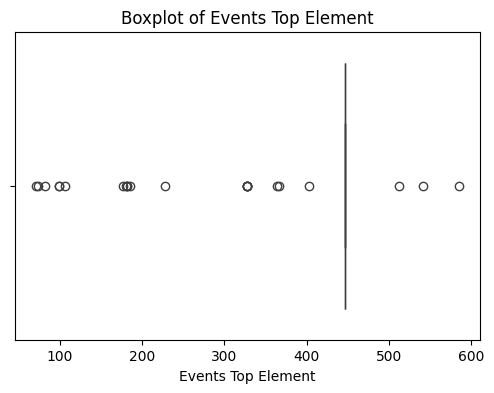

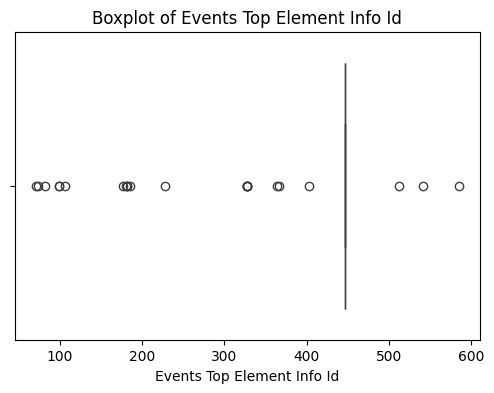

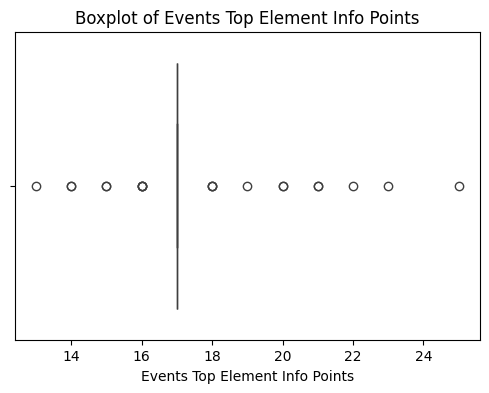

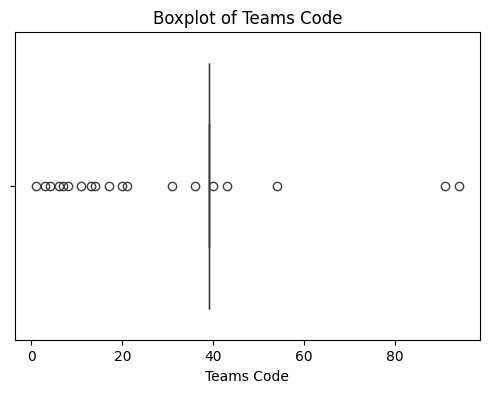

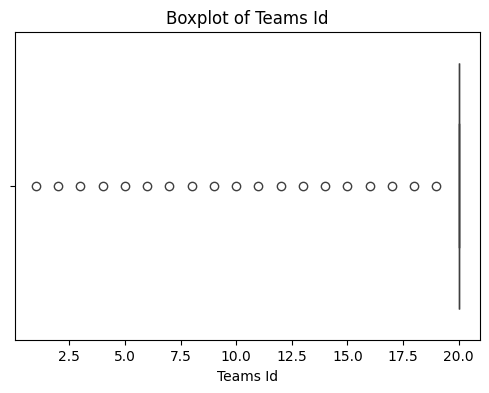

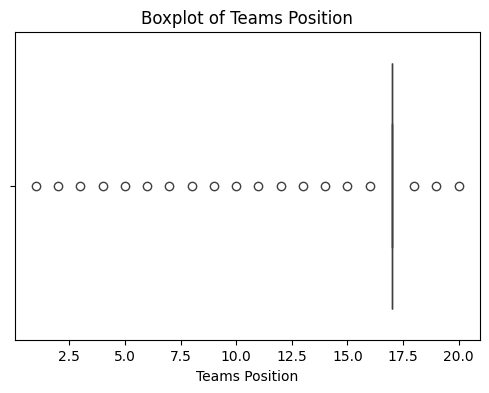

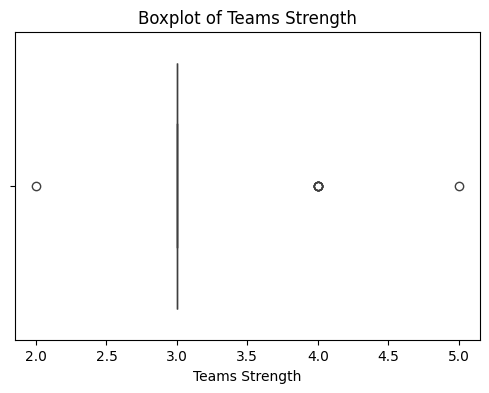

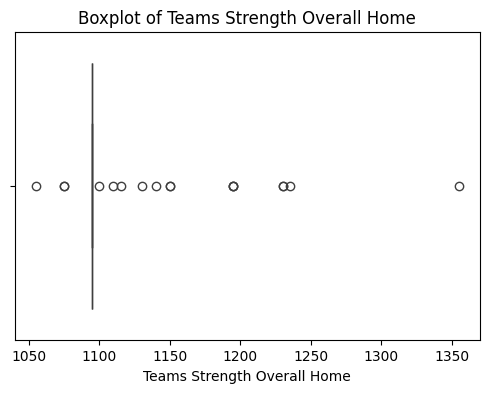

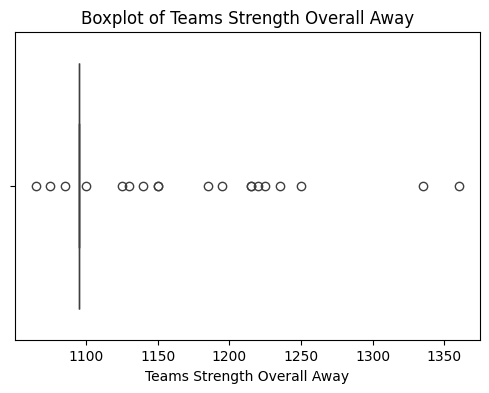

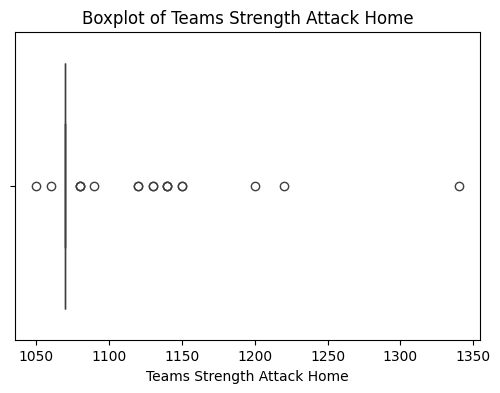

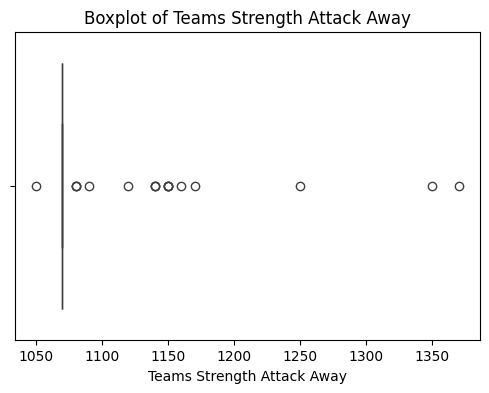

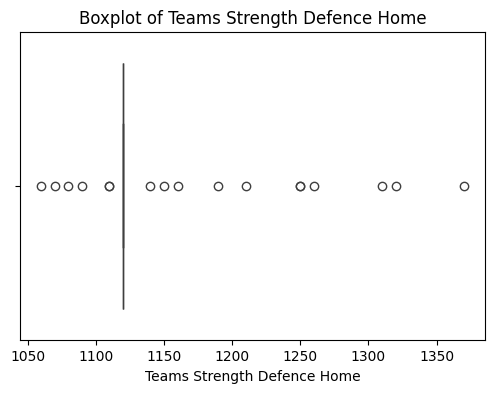

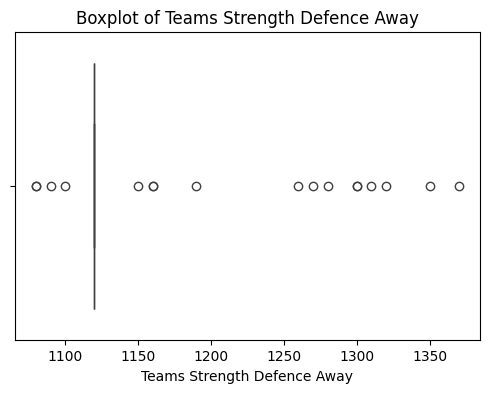

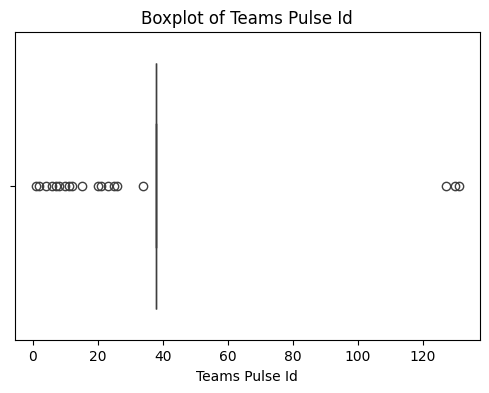

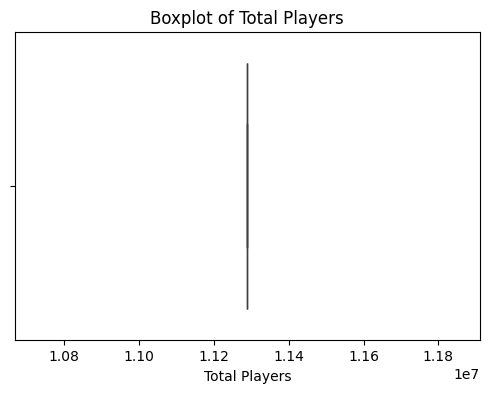

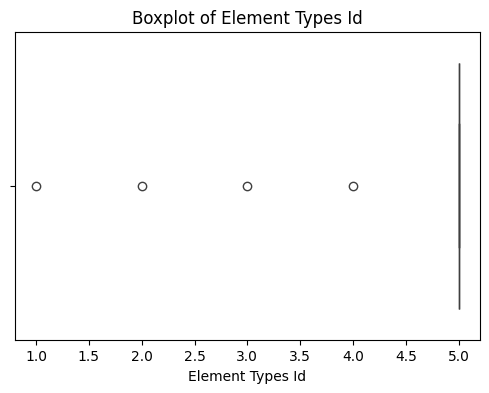

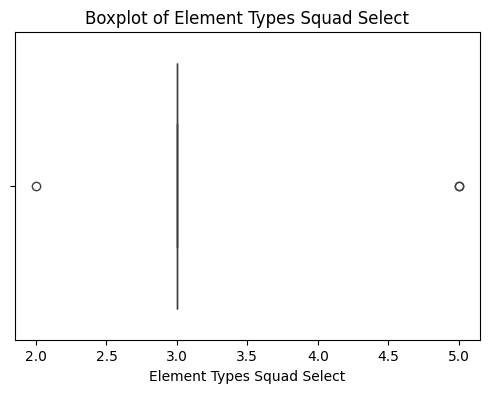

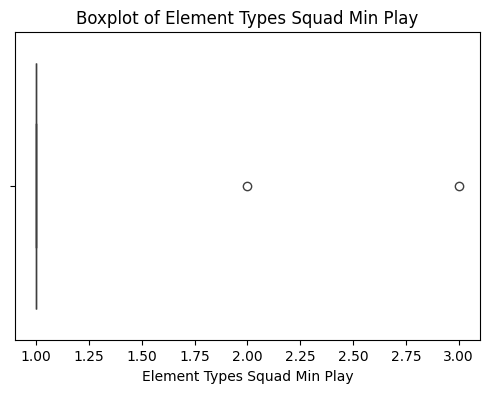

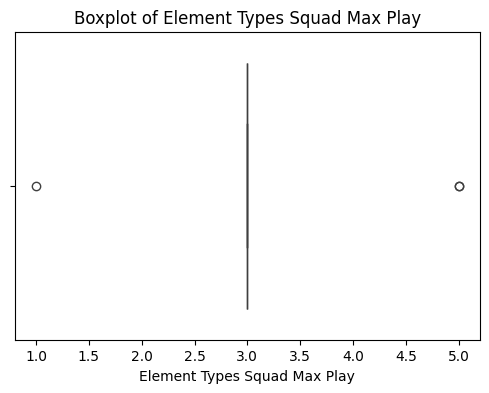

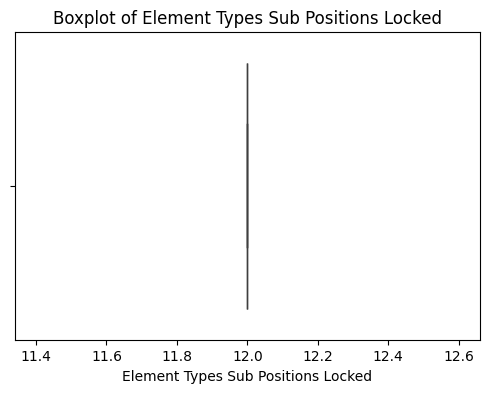

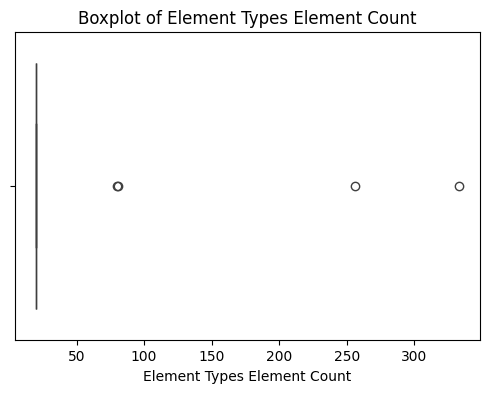

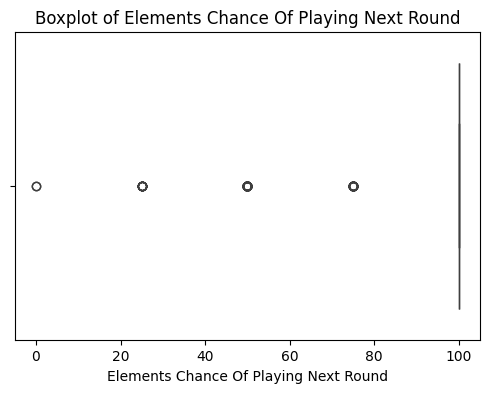

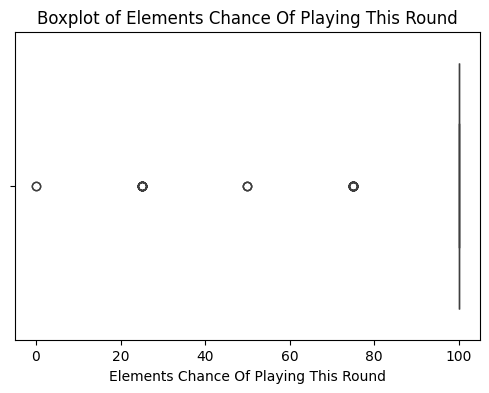

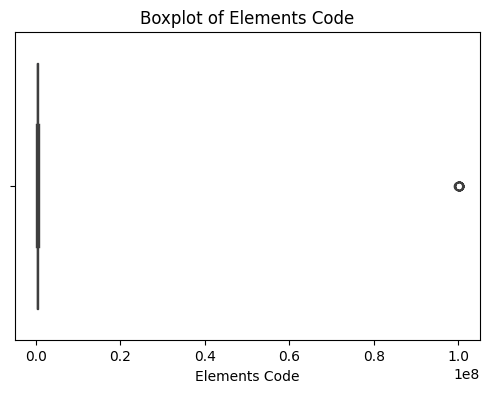

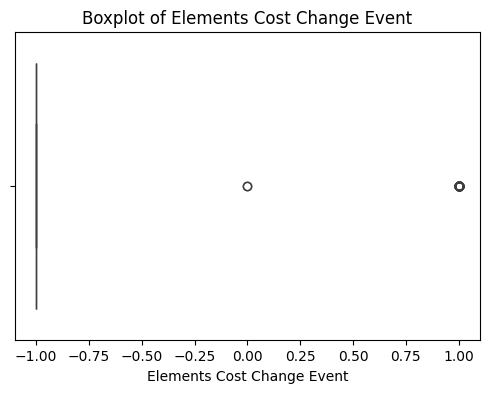

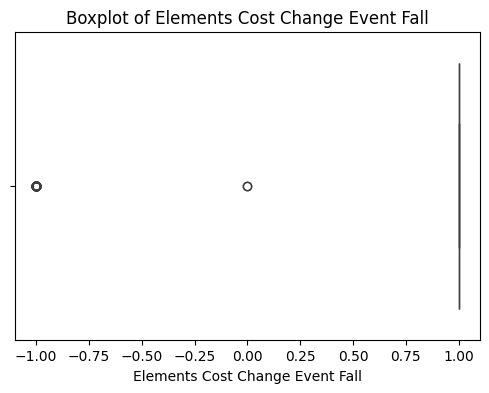

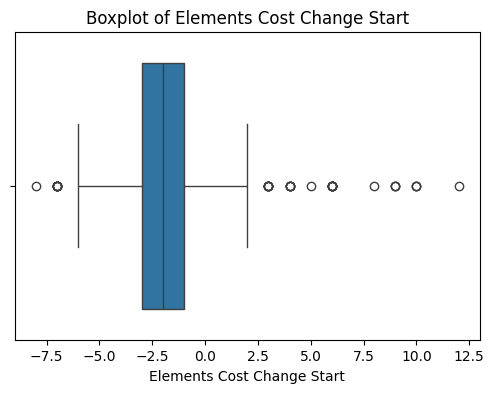

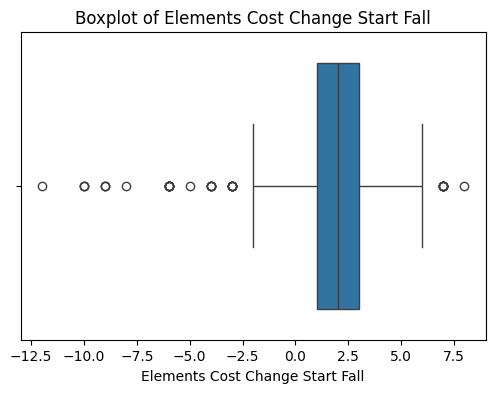

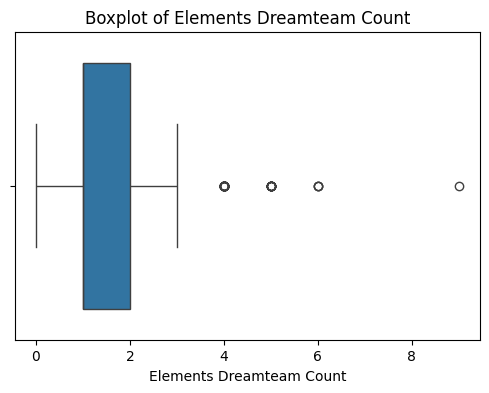

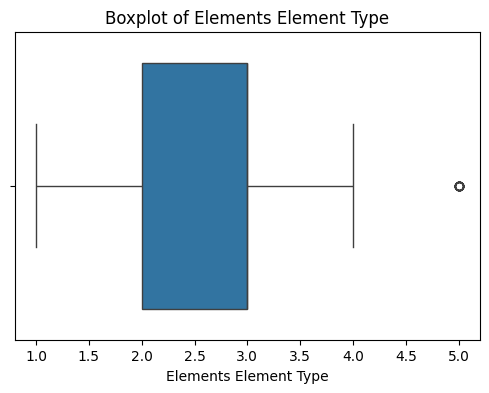

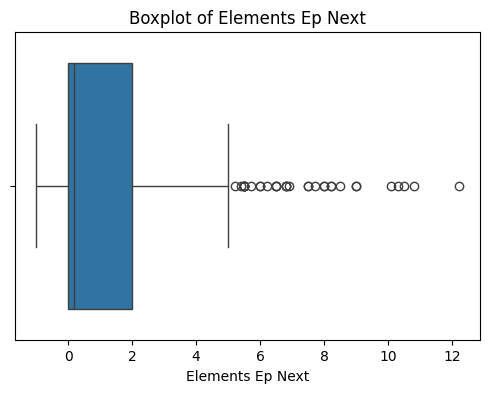

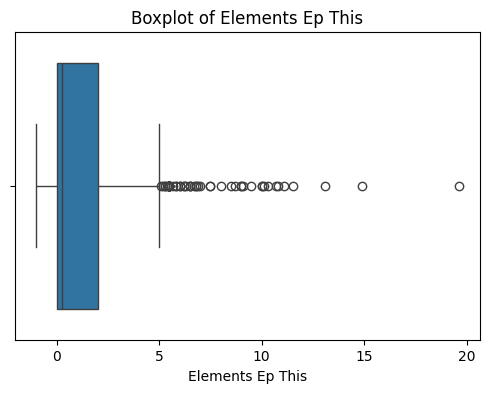

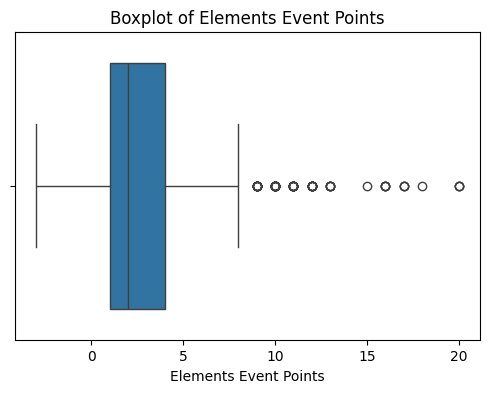

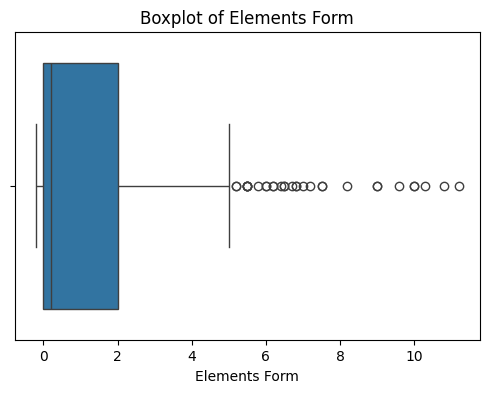

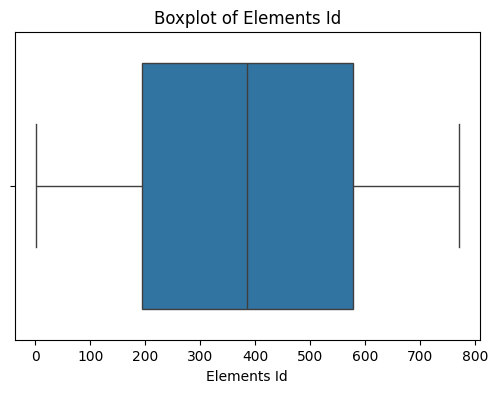

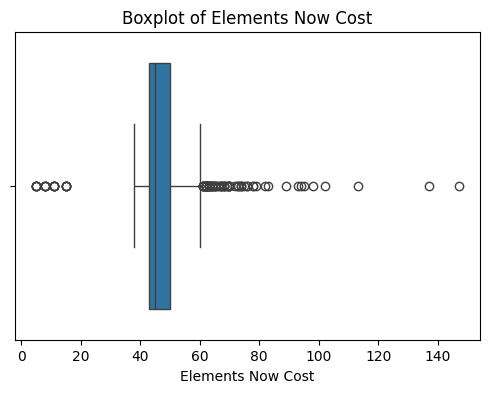

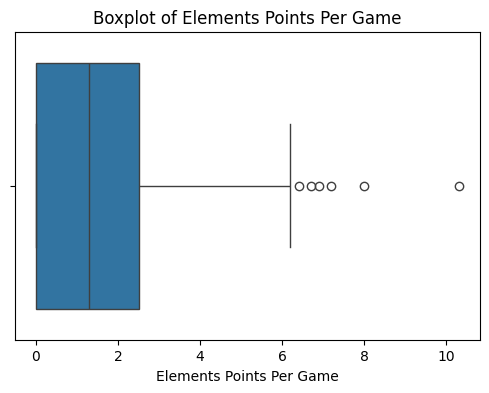

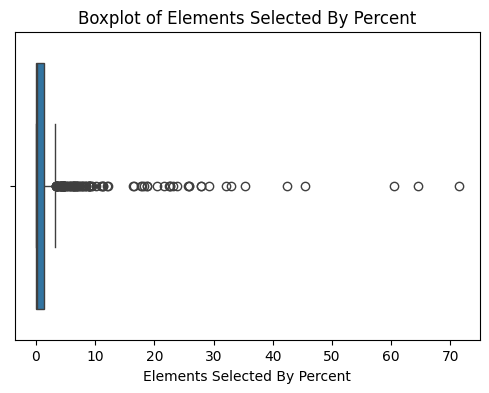

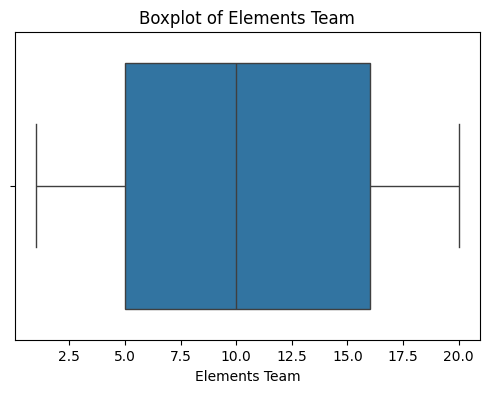

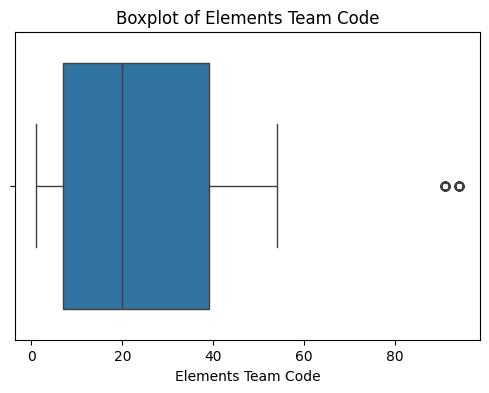

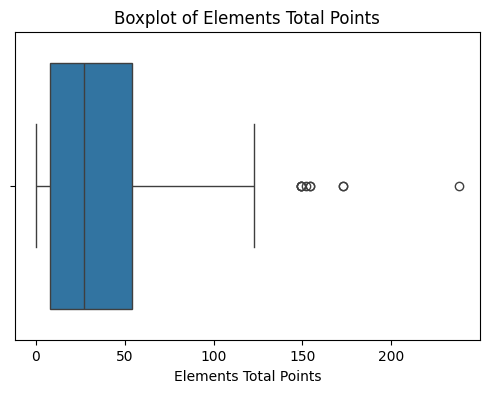

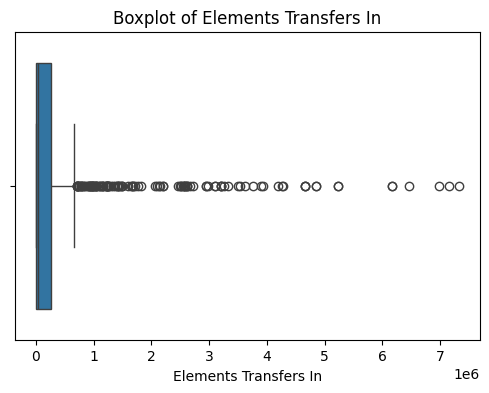

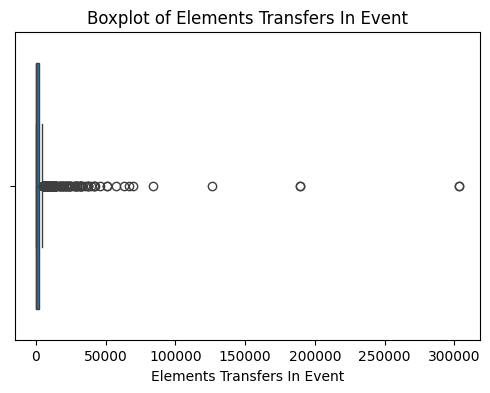

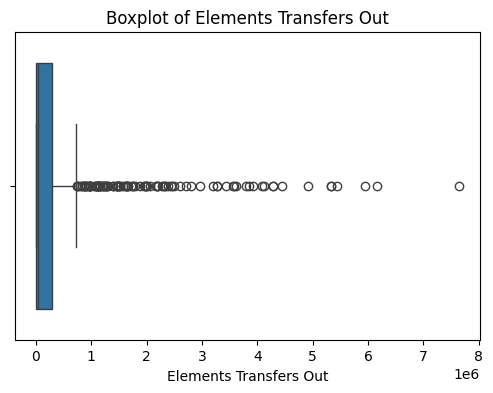

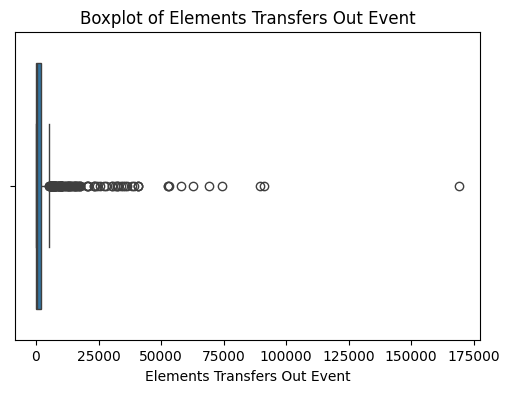

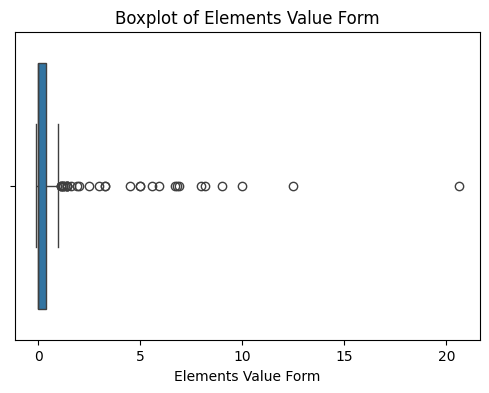

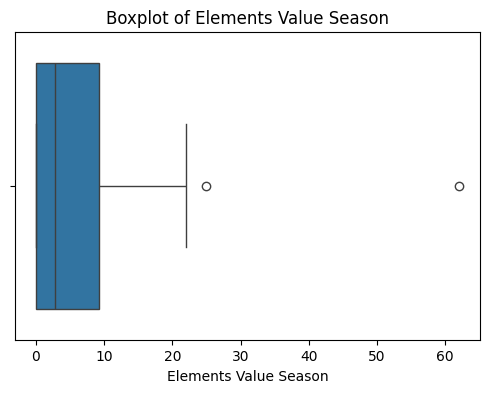

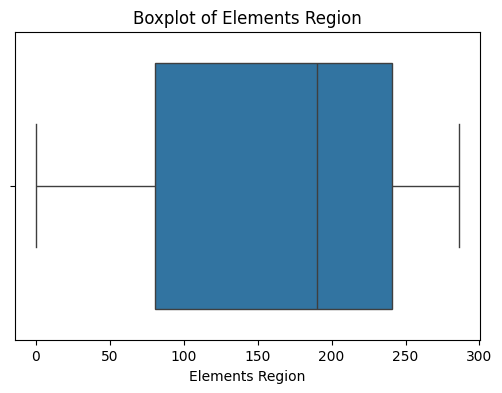

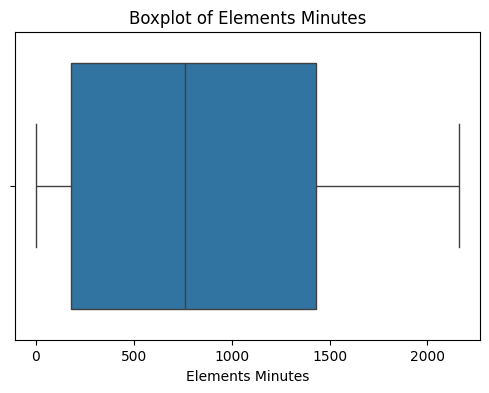

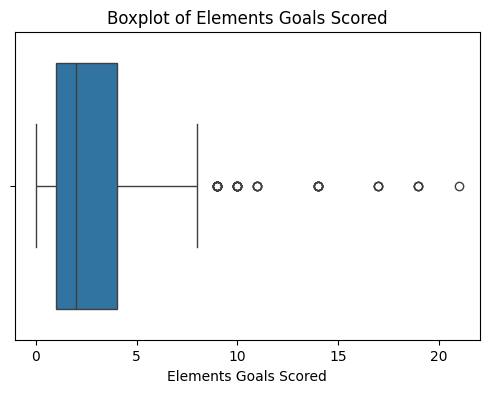

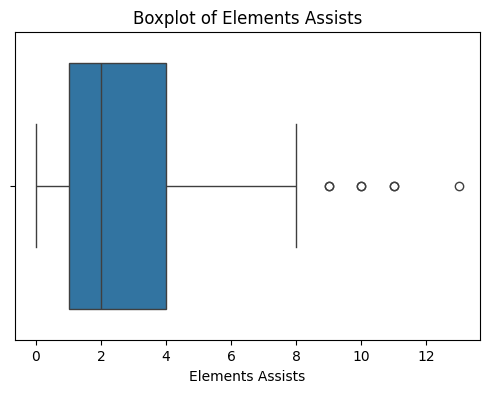

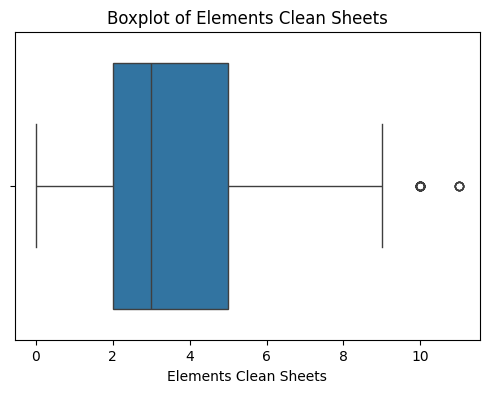

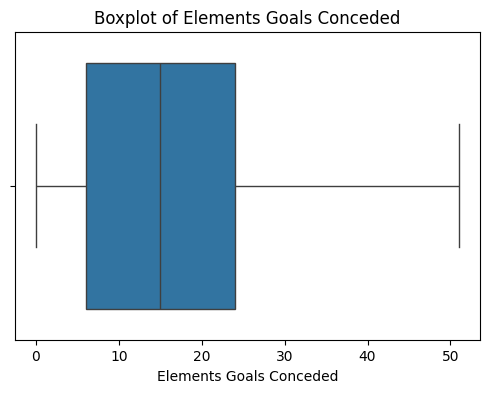

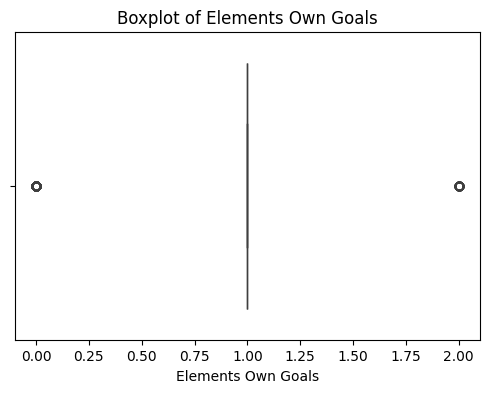

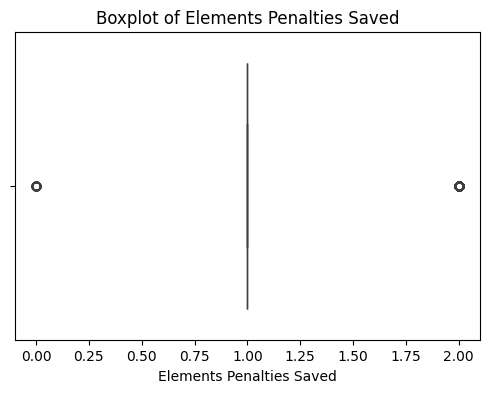

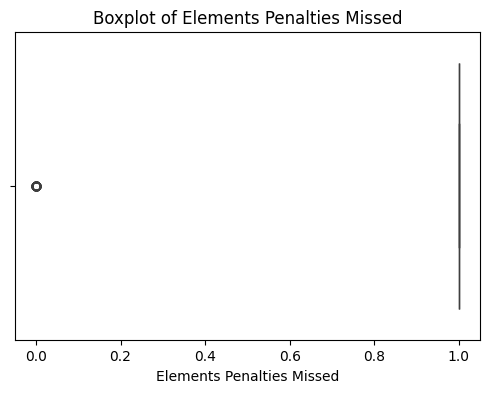

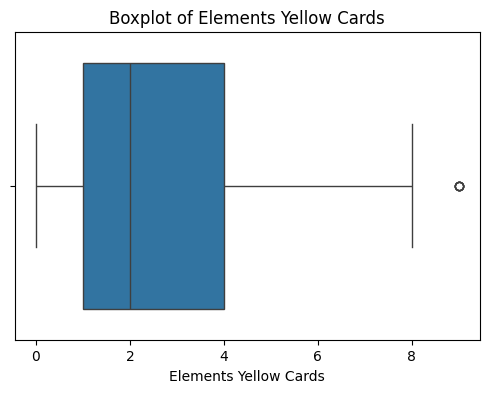

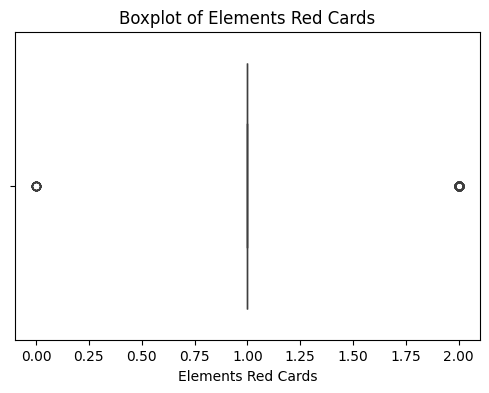

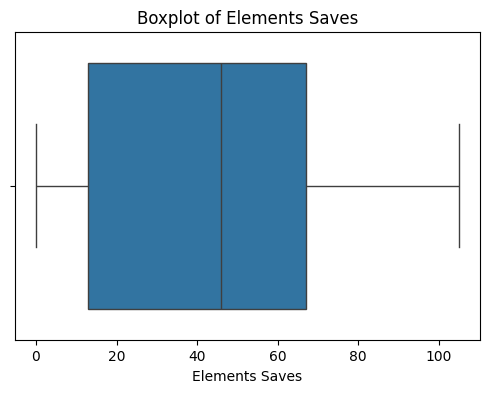

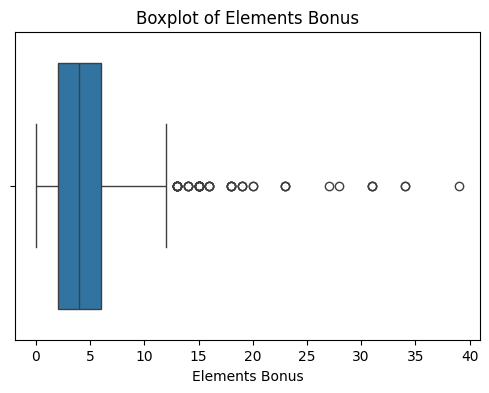

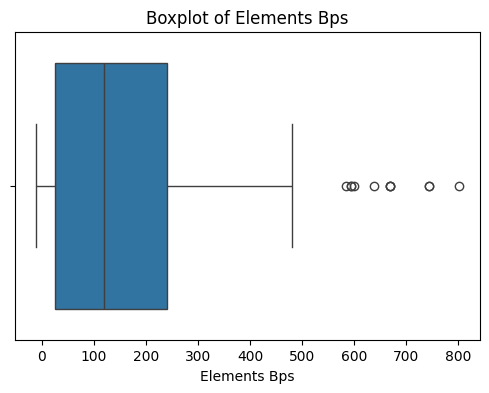

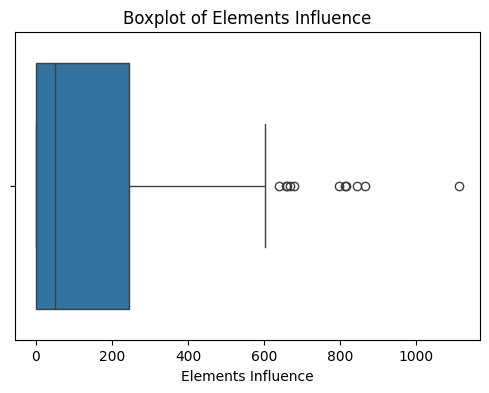

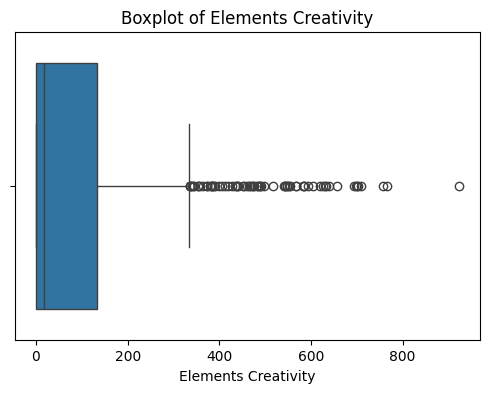

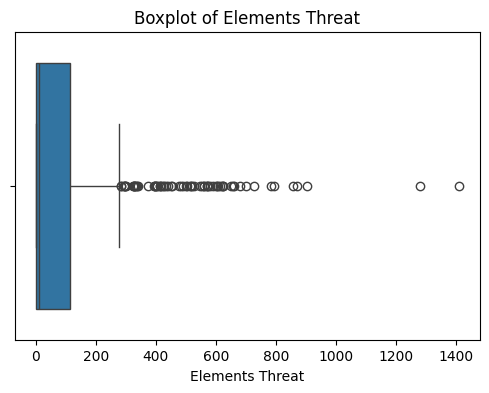

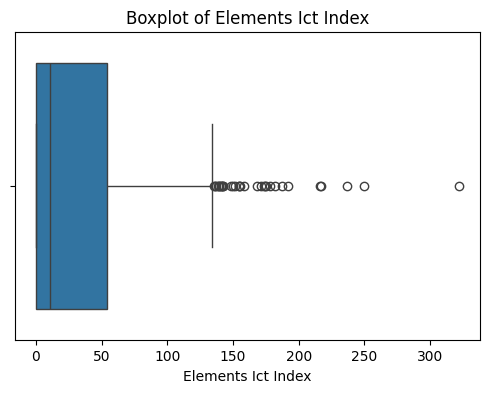

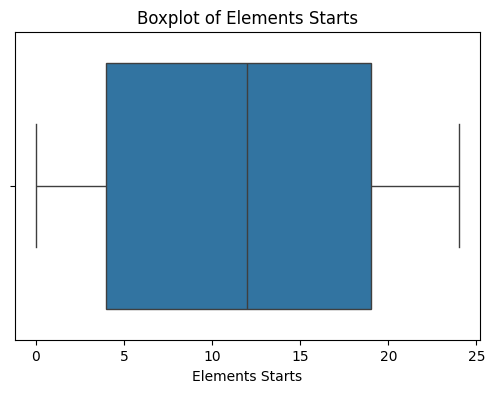

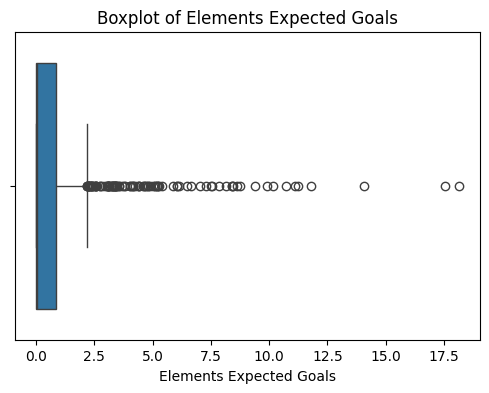

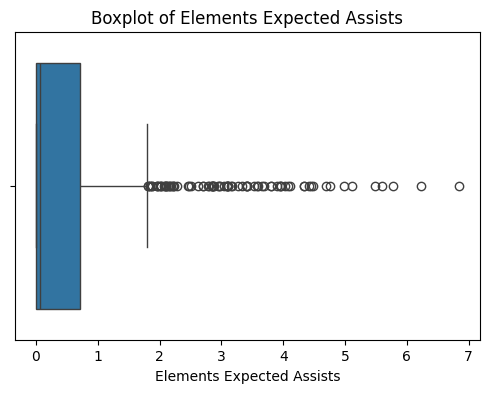

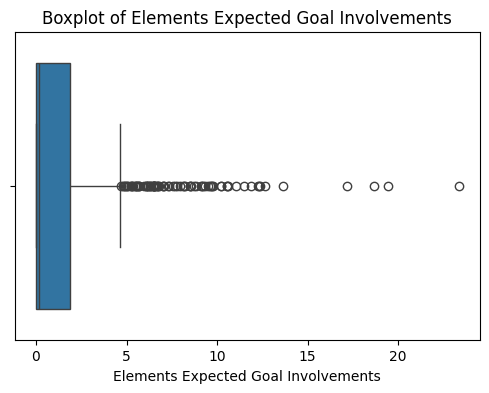

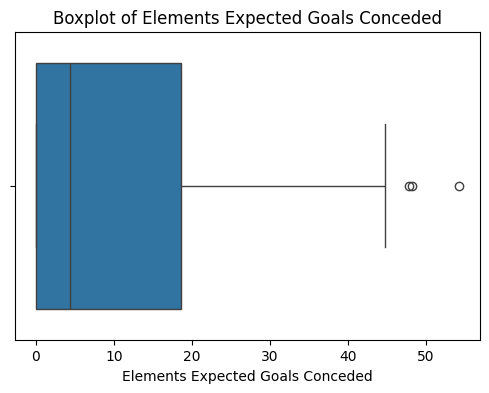

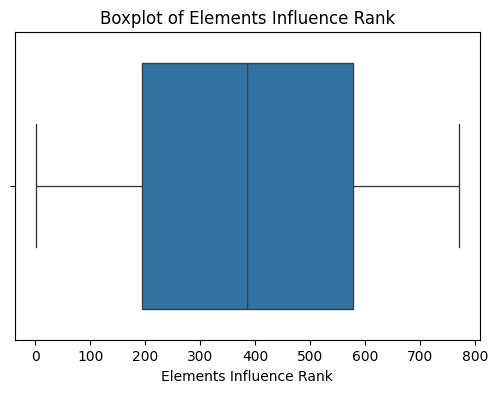

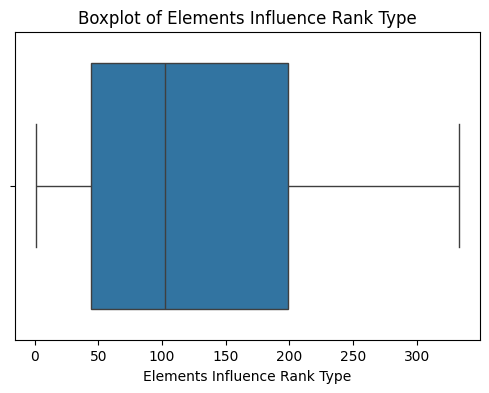

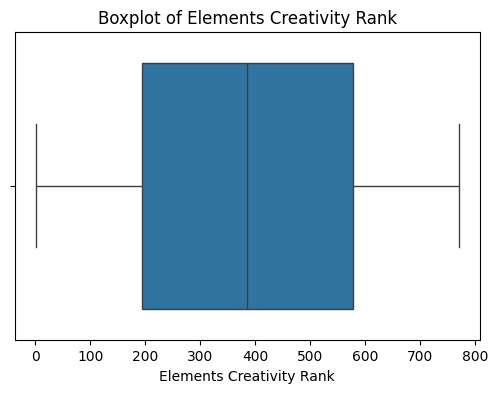

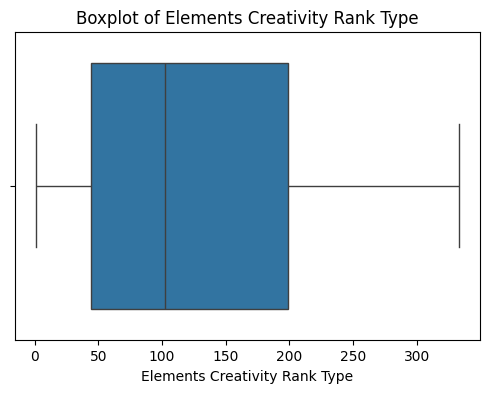

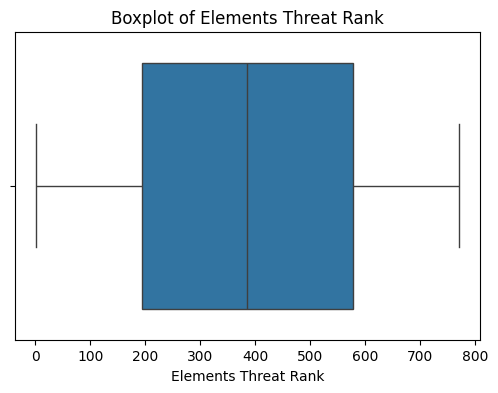

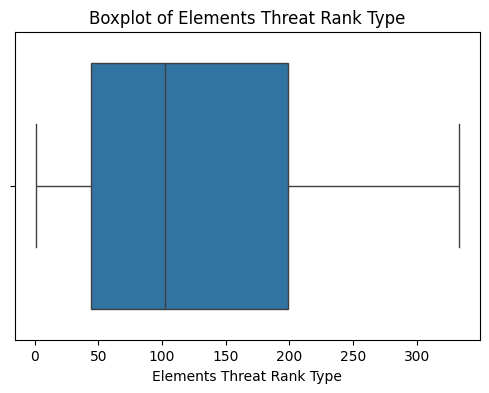

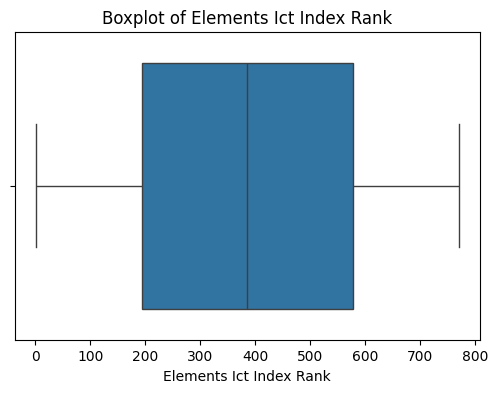

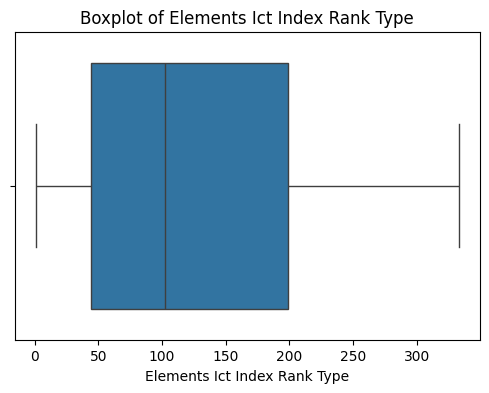

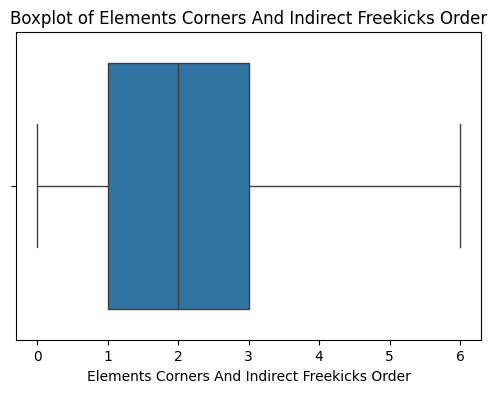

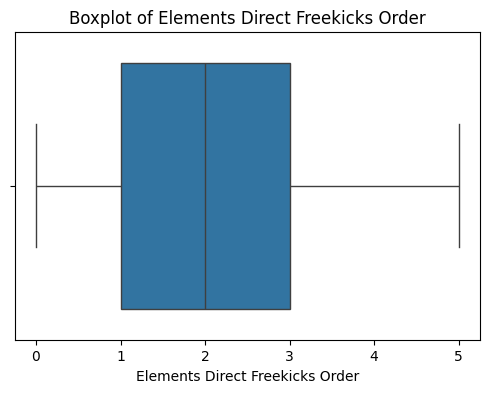

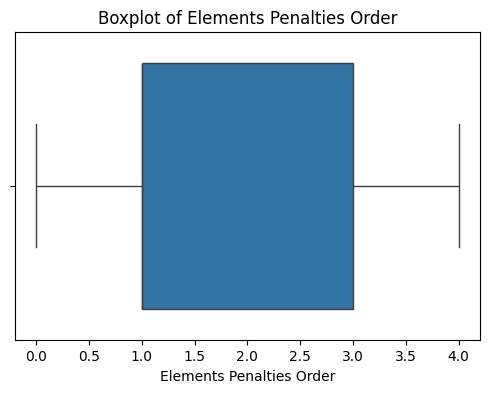

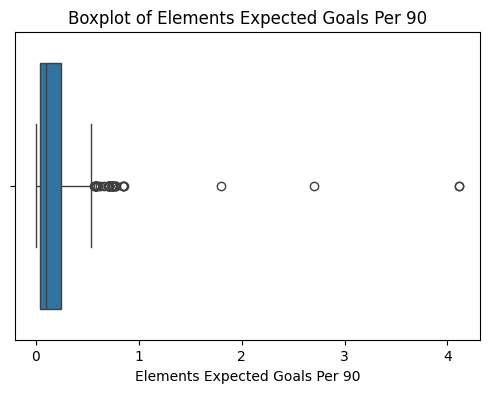

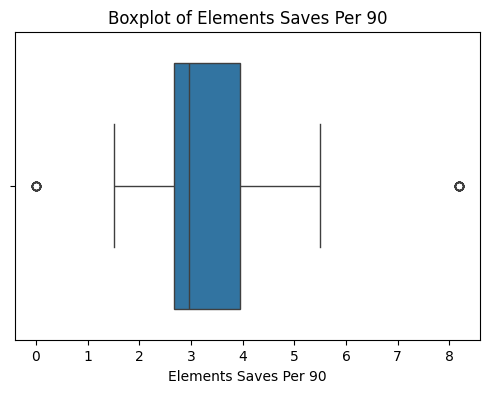

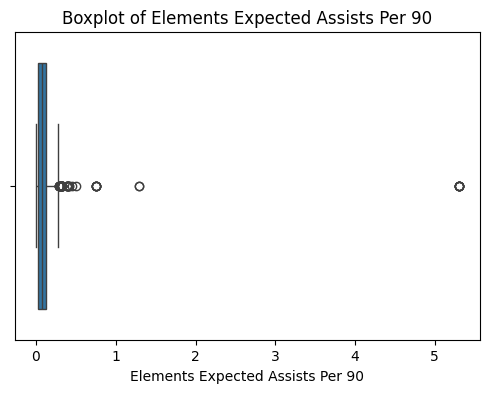

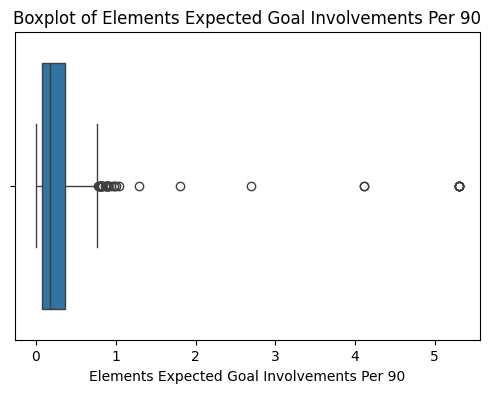

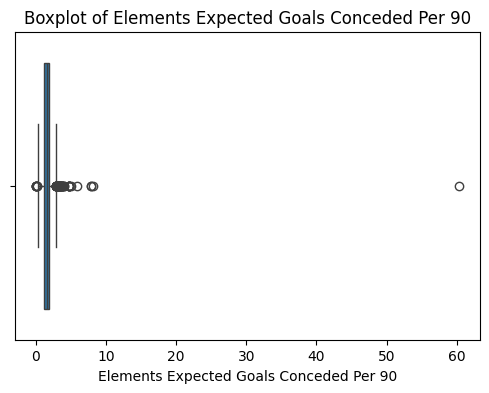

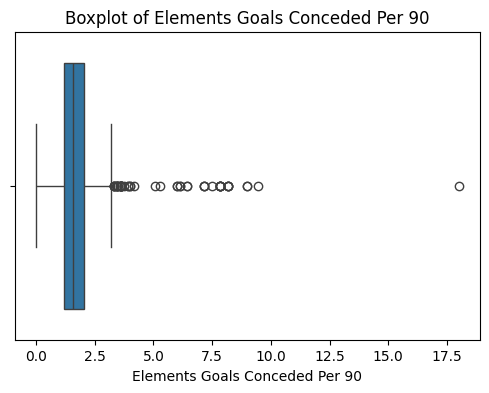

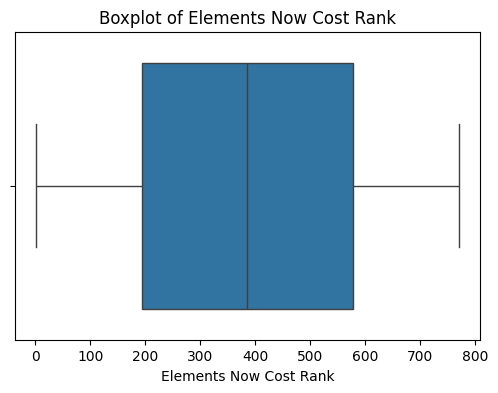

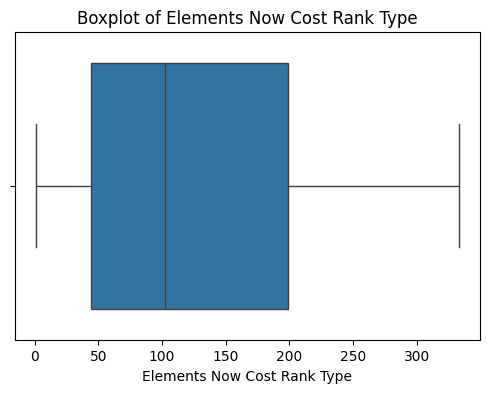

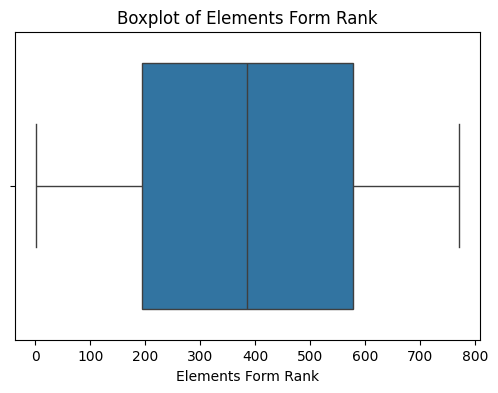

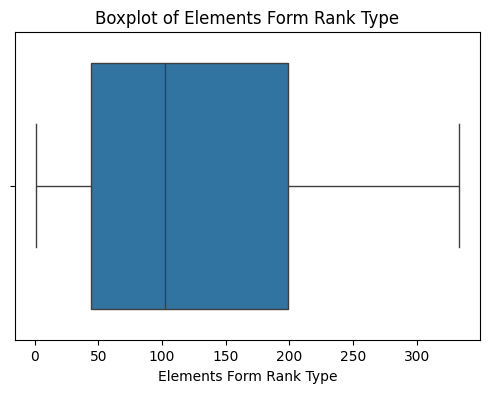

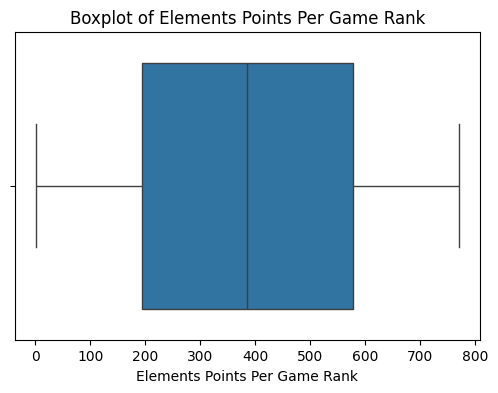

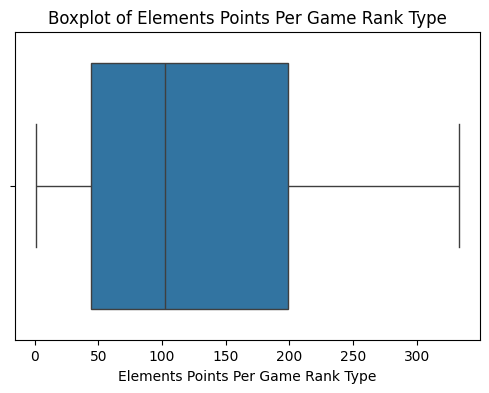

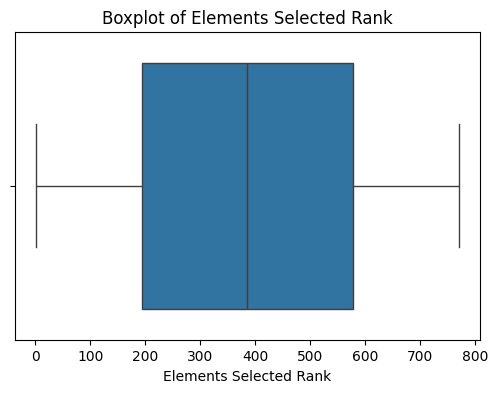

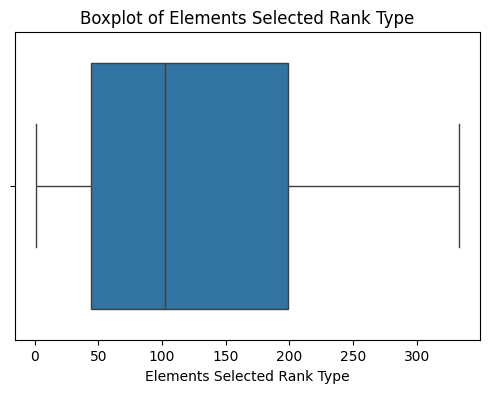

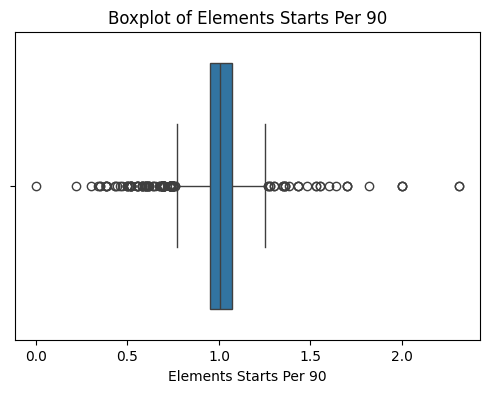

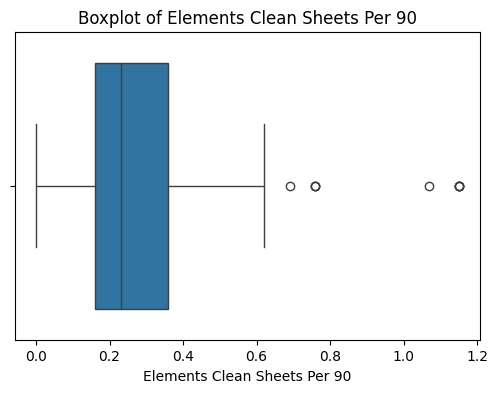

In [77]:
for col in fpl_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x = fpl_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Assessment of the box plots

1. Several boxplots displayed a low IQR for the respective features. These features are:
['Events Top Element','Events Top Element Info Id','Events Top Element Info Points',
 'Teams Code','Teams Id','Teams Position','Teams Strength', 'Teams Strength Overall Home',
 'Teams Strength Overall Away','Teams Strength Attack Home','Teams Strength Attack Away',
 'Teams Strength Defence Home', 'Teams Strength Defence Away', 'Teams Pulse Id',
 'Total Players','Element Types Id','Element Types Squad Select',
 'Element Types Squad Min Play','Element Types Squad Max Play','Element Types Sub Positions Locked',
 'Element Types Element Count','Elements Chance Of Playing Next Round','Elements Chance Of Playing This Round',
 'Elements Code','Elements Cost Change Event',
 'Elements Cost Change Event Fall','Elements Own Goals', 'Elements Penalties Saved', 'Elements Penalties Missed',
 'Elements Red Cards'
 ]

1.a. The low IQR range is a potential indicator that the features have very little spread and values are close to the median. Another possibility is that the features have constant or near constant values, suggestive of features being redundant with little predictive power due to the low variance.

2. Assessing the summary statistics we can observe the low variance exhibited by these features

3. The histgram plots also confirms what was observed in boxplots and summary Statistics; the low varicance features display generally a singly column with a sharp kde curve over it. These suggest that the data points vary little and are close to the mean of the dataset. The features can be dropped as they will provide little information to the model to aid in prediction.




In [78]:
fpl_df.describe(include = np.number)

Events Top Element  Events Top Element Info Id  \
count          770.000000                  770.000000   
mean           441.538961                  441.538961   
std             40.619317                   40.619317   
min             71.000000                   71.000000   
25%            447.000000                  447.000000   
50%            447.000000                  447.000000   
75%            447.000000                  447.000000   
max            585.000000                  585.000000   

       Events Top Element Info Points  Teams Code    Teams Id  Teams Position  \
count                      770.000000  770.000000  770.000000      770.000000   
mean                        17.025974   38.705195   19.753247       16.831169   
std                          0.543887    4.599723    1.775105        1.391060   
min                         13.000000    1.000000    1.000000        1.000000   
25%                         17.000000   39.000000   20.000000       17.000000   
50%                         17.000000   39.000000   20.000000       17.000000   
75%                         17.000000   39.000000   20.000000       17.000000   
max                         25.000000   94.000000   20.000000       20.000000   

       Teams Strength  Teams Strength Overall Home  \
count      770.000000                   770.000000   
mean         3.009091                  1096.454545   
std          0.119254                    14.620065   
min          2.000000                  1055.000000   
25%          3.000000                  1095.000000   
50%          3.000000                  1095.000000   
75%          3.000000                  1095.000000   
max          5.000000                  1355.000000   

       Teams Strength Overall Away  Teams Strength Attack Home  \
count                   770.000000                  770.000000   
mean                   1097.142857                 1071.506494   
std                      18.350875                   14.033791   
min                    1065.000000                 1050.000000   
25%                    1095.000000                 1070.000000   
50%                    1095.000000                 1070.000000   
75%                    1095.000000                 1070.000000   
max                    1360.000000                 1340.000000   

       Teams Strength Attack Away  Teams Strength Defence Home  \
count                  770.000000                   770.000000   
mean                  1072.025974                  1121.415584   
std                     18.374782                    16.726866   
min                   1050.000000                  1060.000000   
25%                   1070.000000                  1120.000000   
50%                   1070.000000                  1120.000000   
75%                   1070.000000                  1120.000000   
max                   1370.000000                  1370.000000   

       Teams Strength Defence Away  Teams Pulse Id  Total Players  \
count                   770.000000      770.000000          770.0   
mean                   1122.246753       37.858442     11289716.0   
std                      20.828519        6.804876            0.0   
min                    1080.000000        1.000000     11289716.0   
25%                    1120.000000       38.000000     11289716.0   
50%                    1120.000000       38.000000     11289716.0   
75%                    1120.000000       38.000000     11289716.0   
max                    1370.000000      131.000000     11289716.0   

       Element Types Id  Element Types Squad Select  \
count        770.000000                  770.000000   
mean           4.987013                    3.003896   
std            0.197086                    0.108112   
min            1.000000                    2.000000   
25%            5.000000                    3.000000   
50%            5.000000                    3.000000   
75%            5.000000                    3.000000   
max            5.000000 

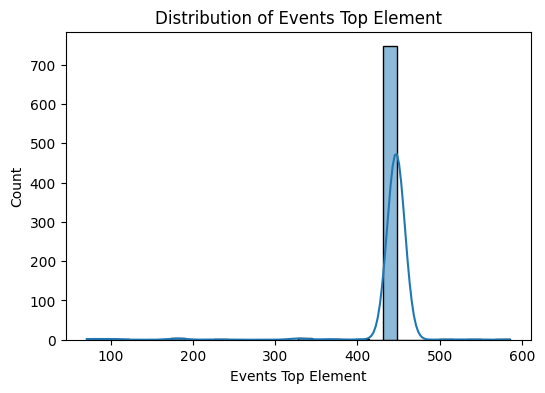

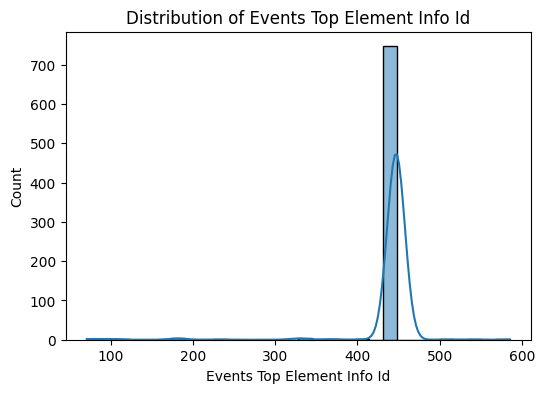

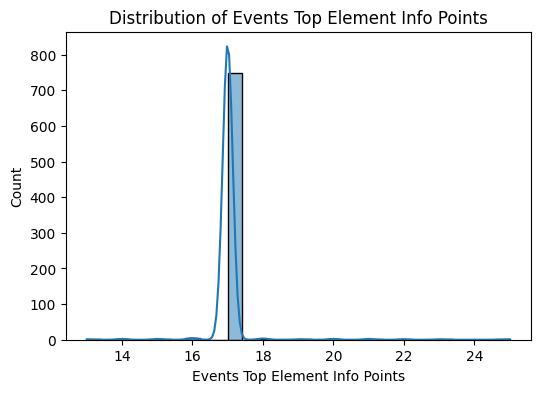

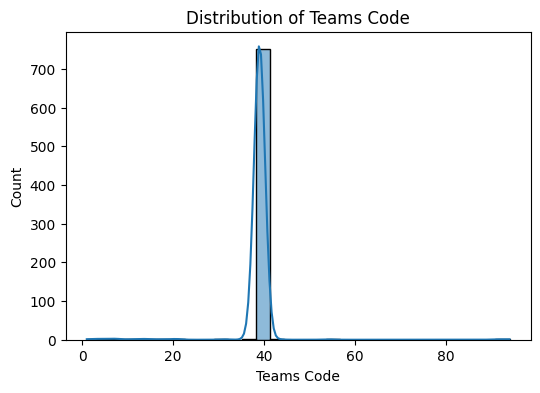

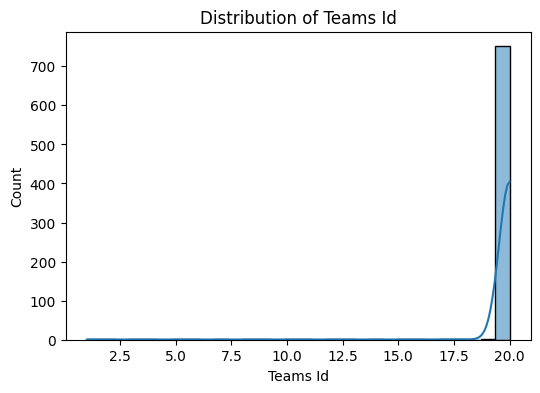

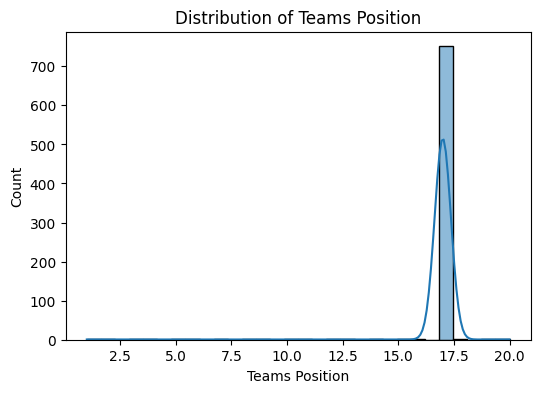

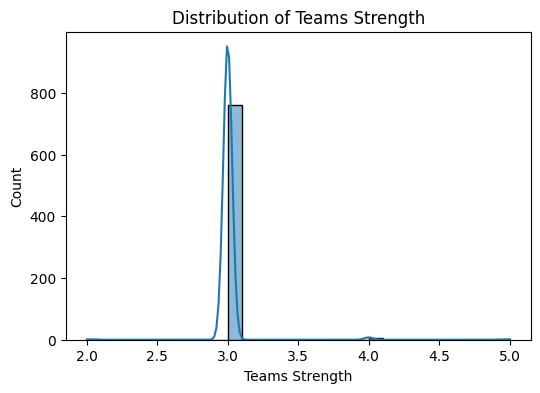

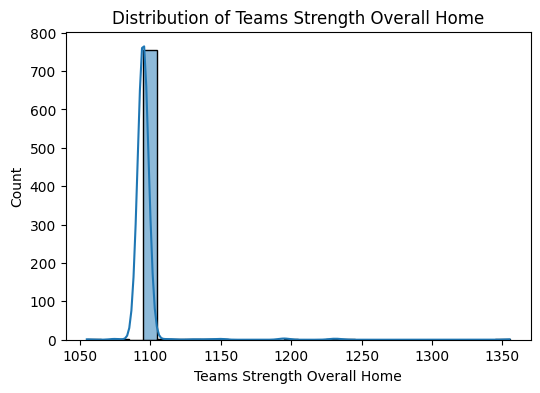

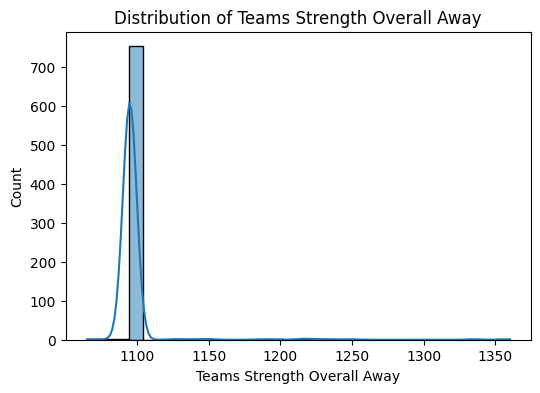

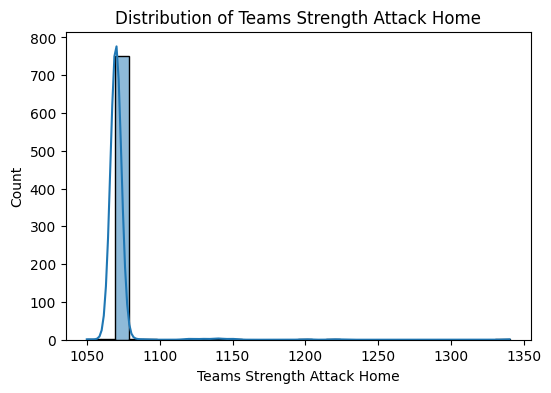

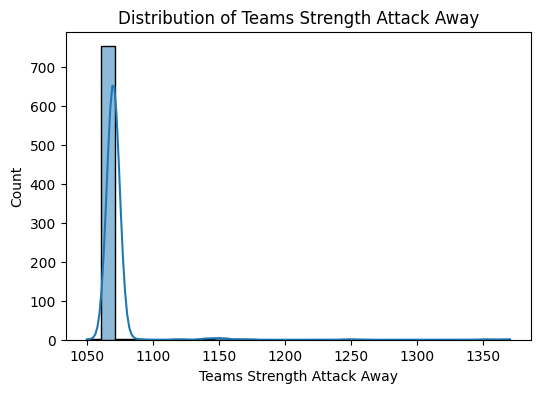

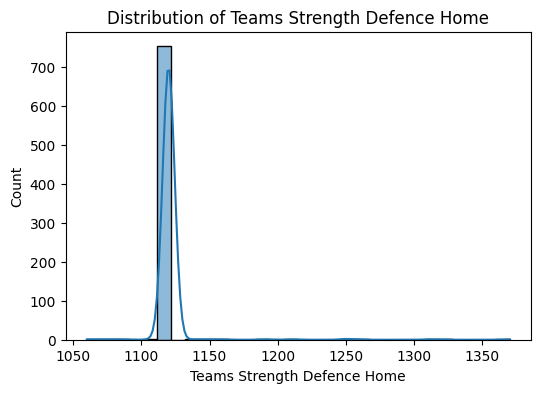

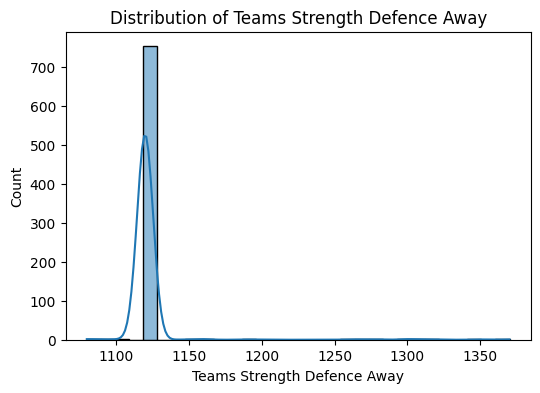

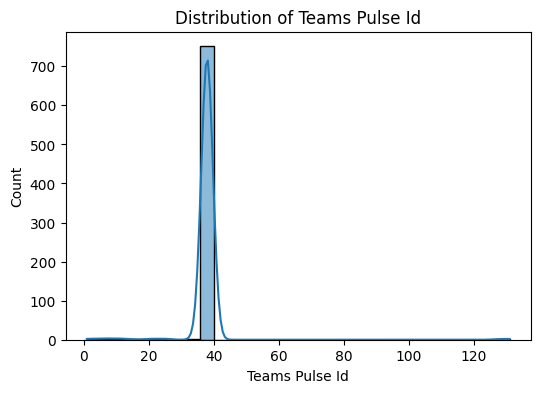

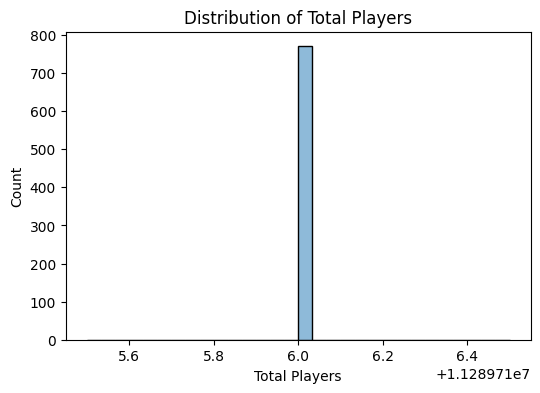

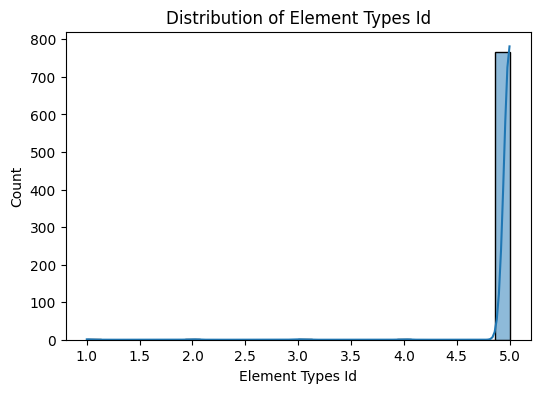

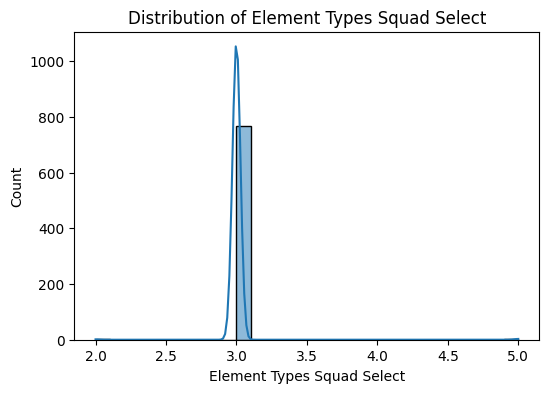

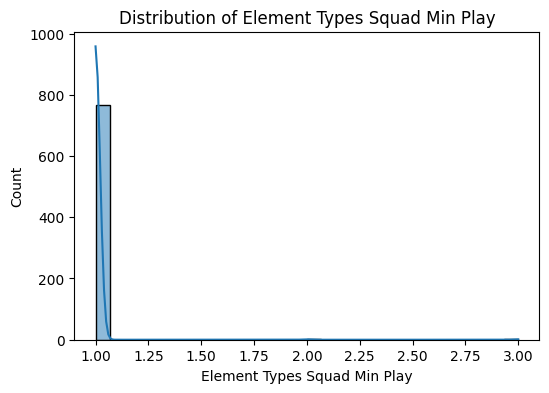

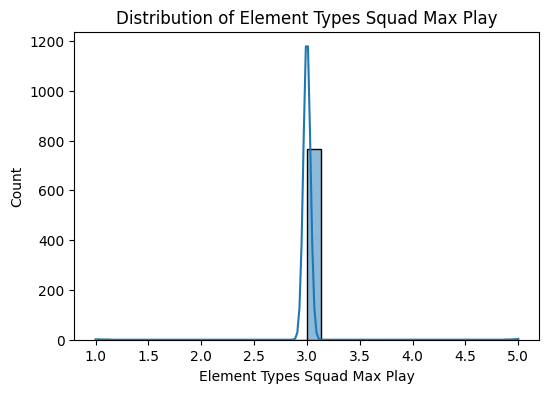

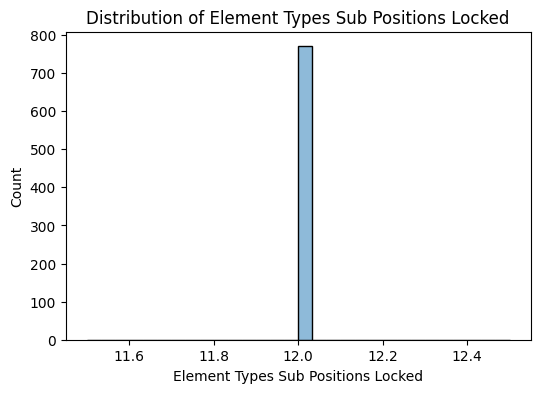

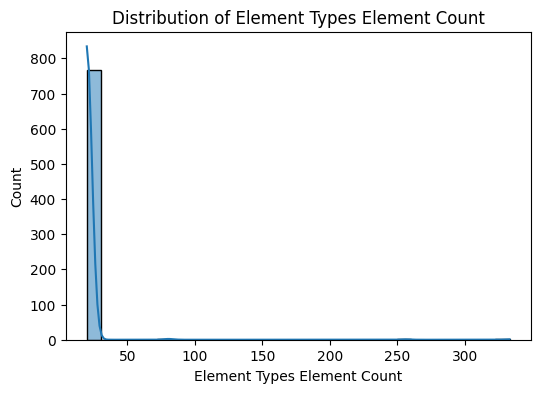

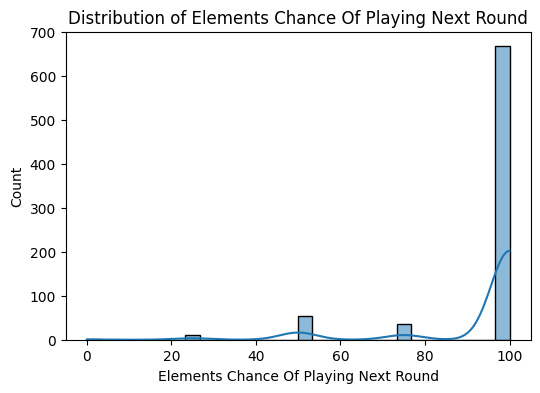

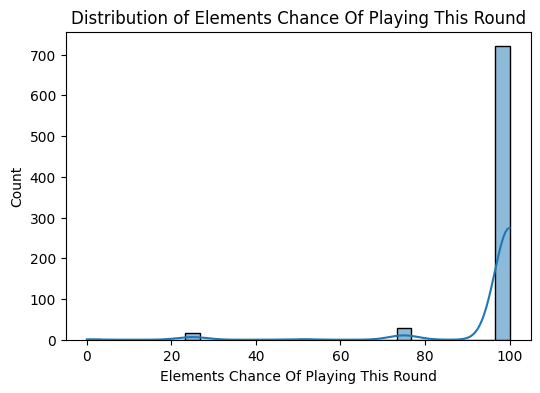

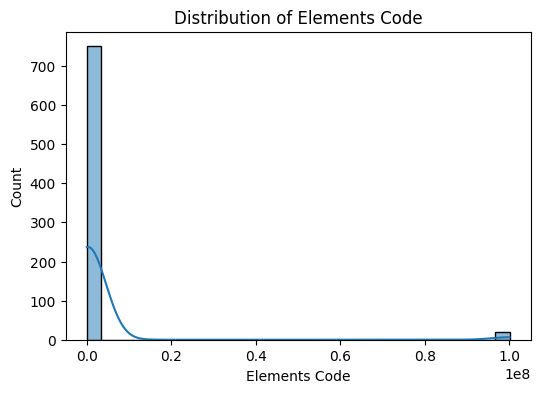

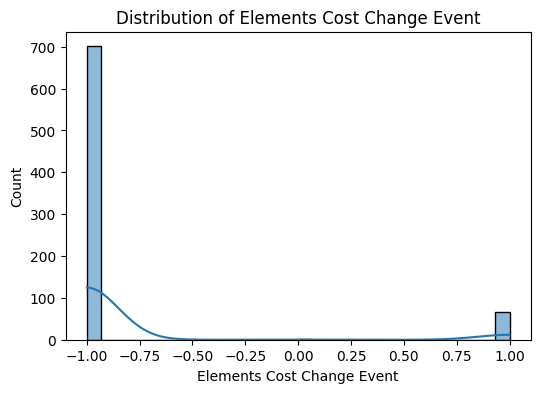

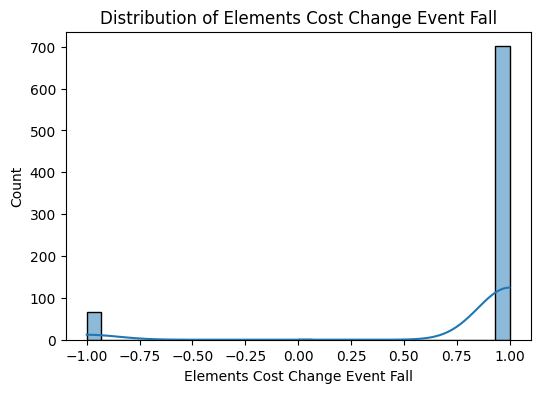

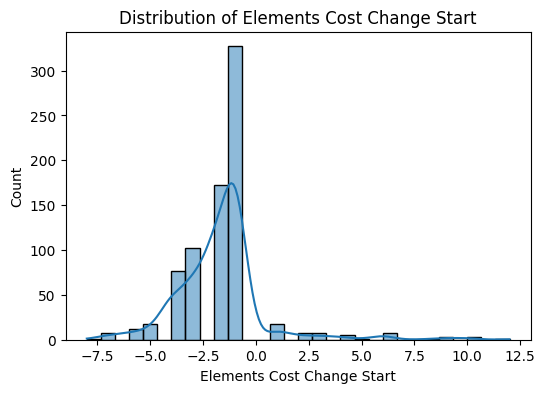

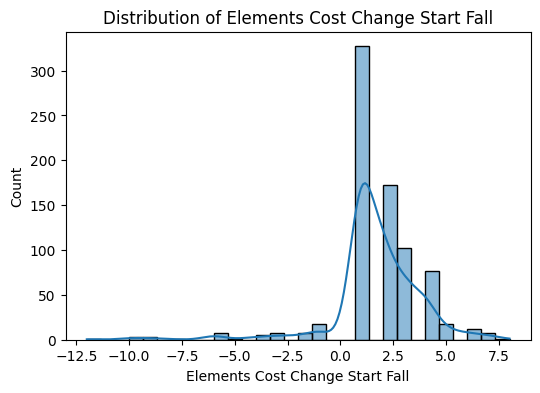

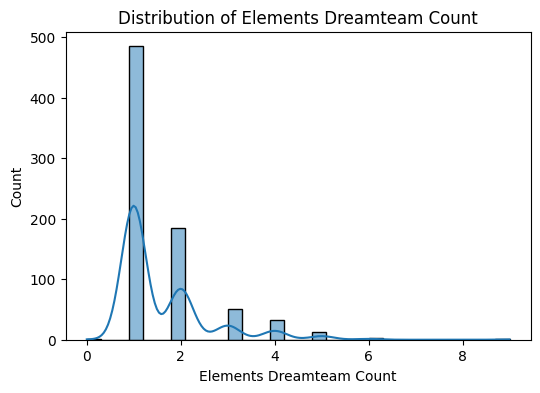

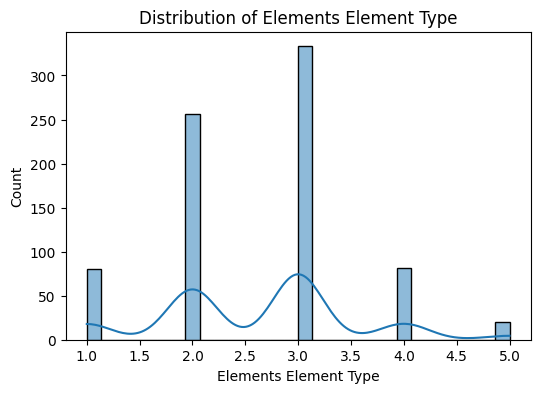

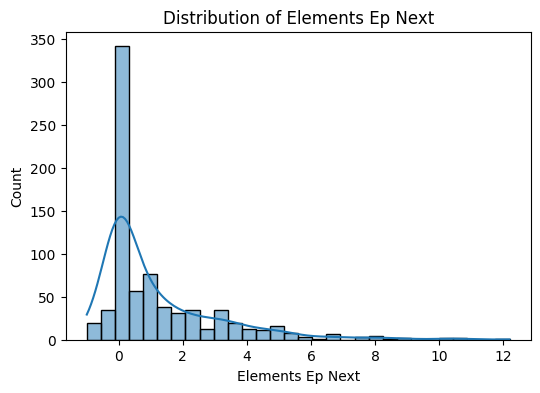

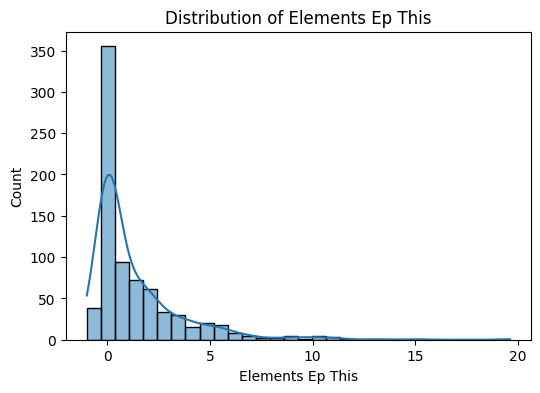

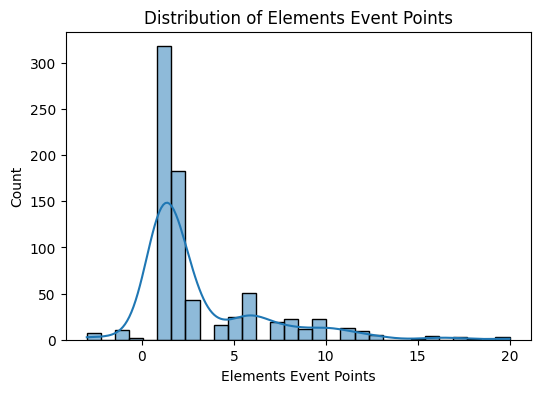

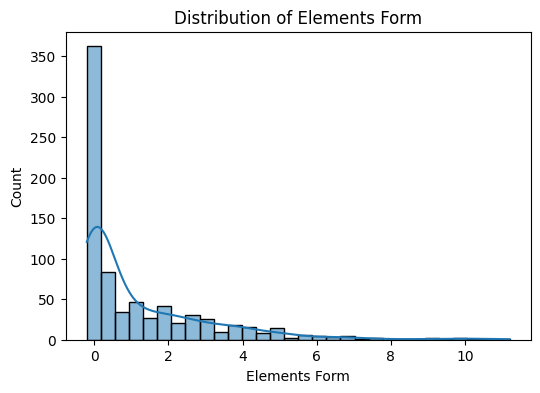

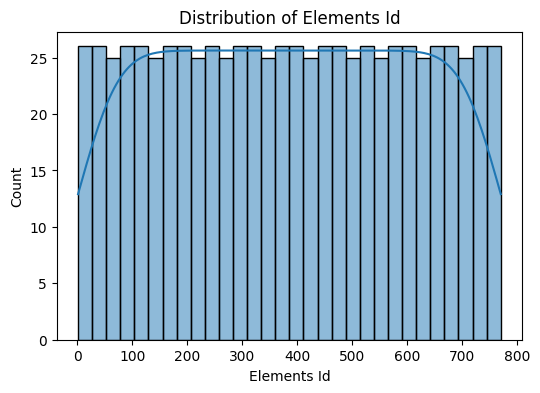

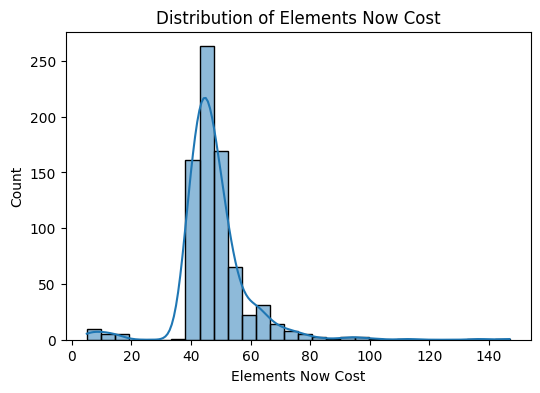

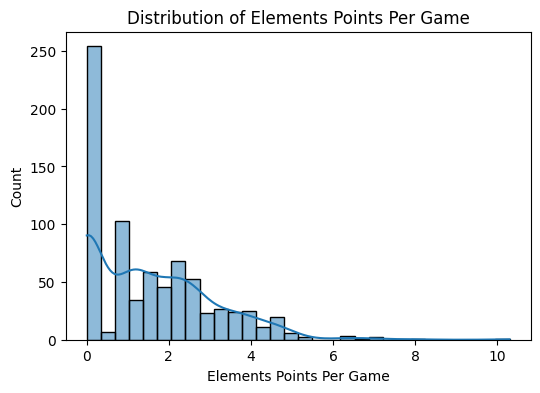

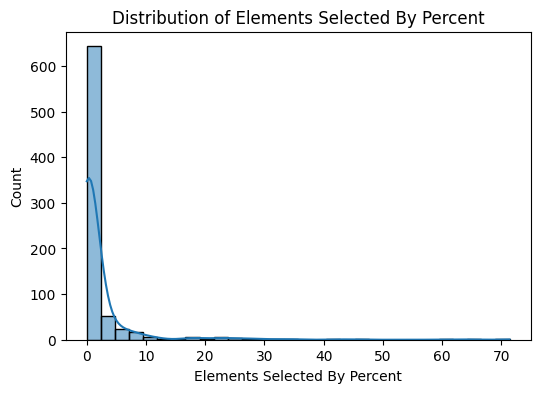

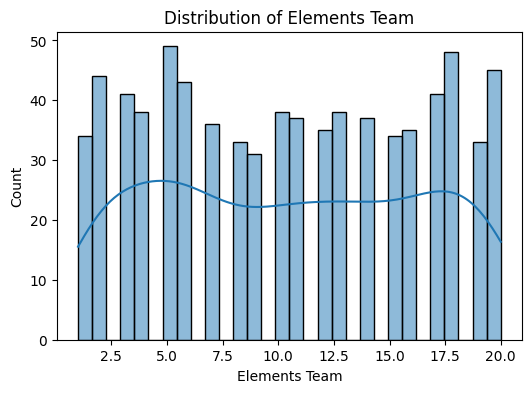

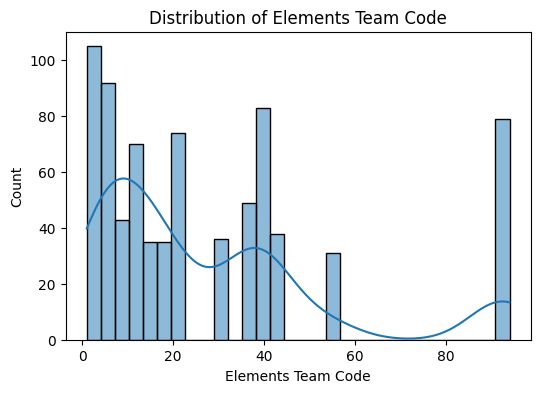

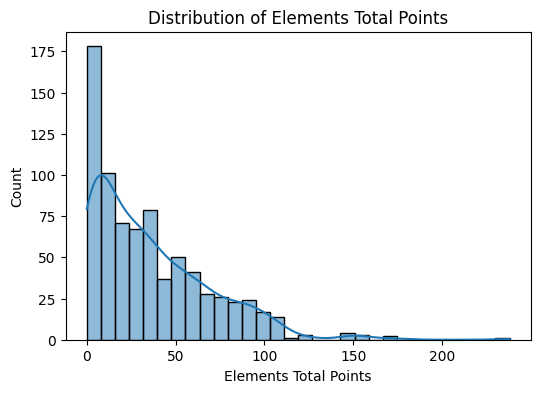

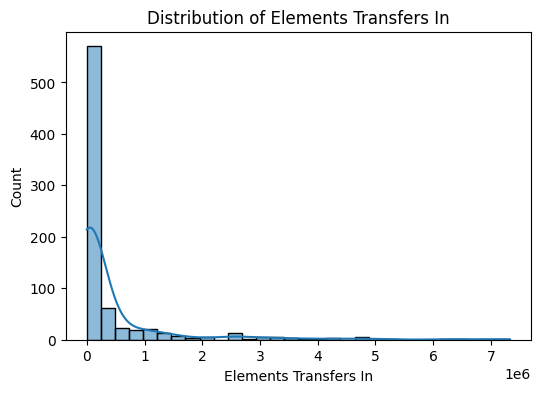

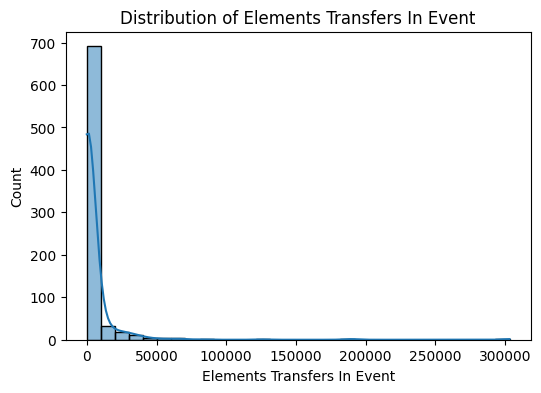

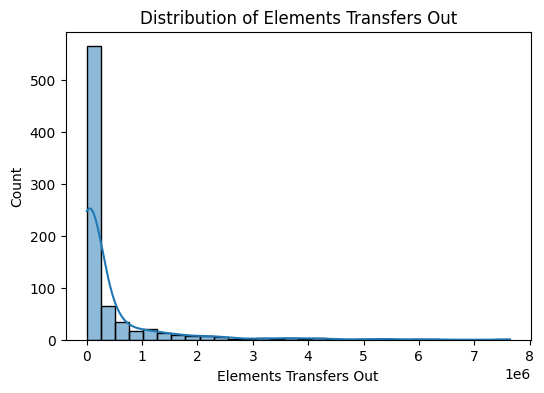

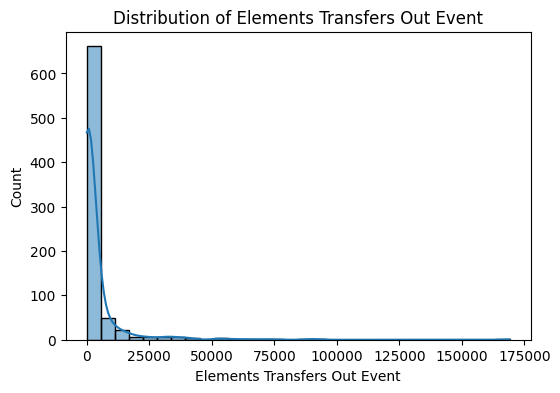

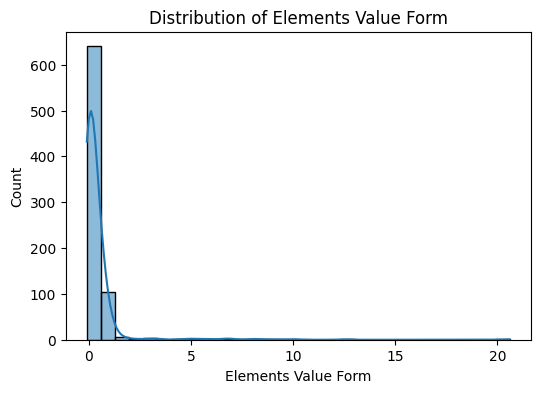

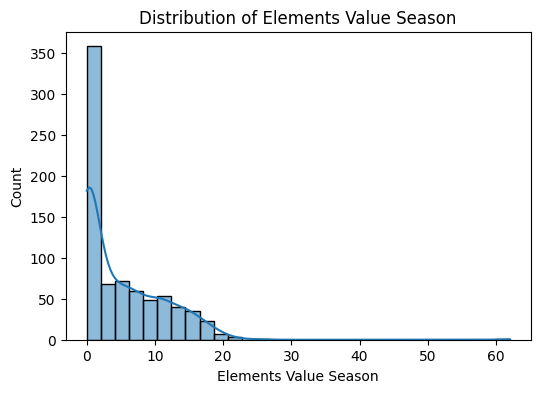

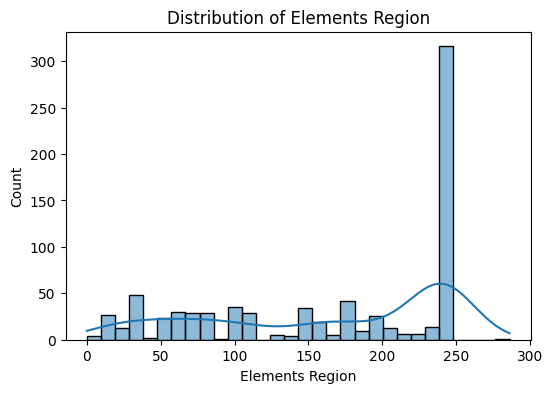

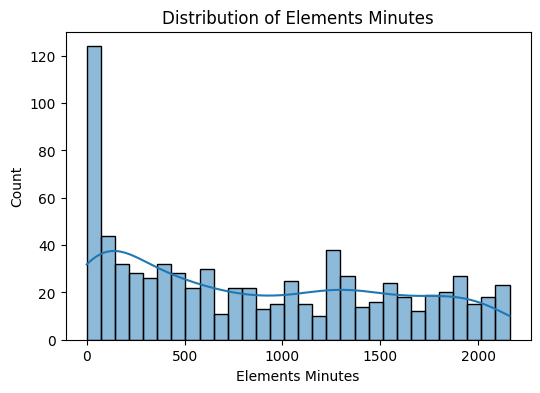

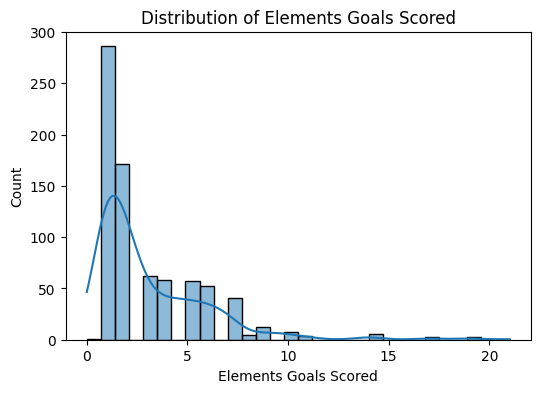

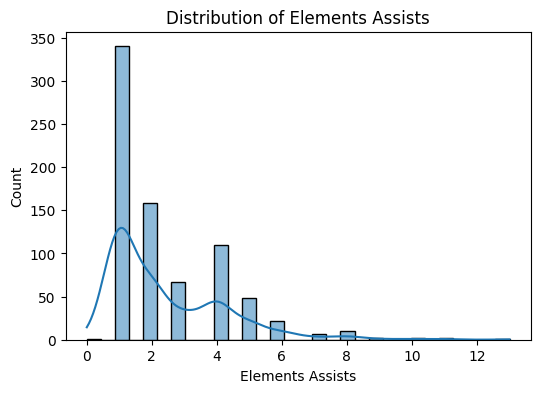

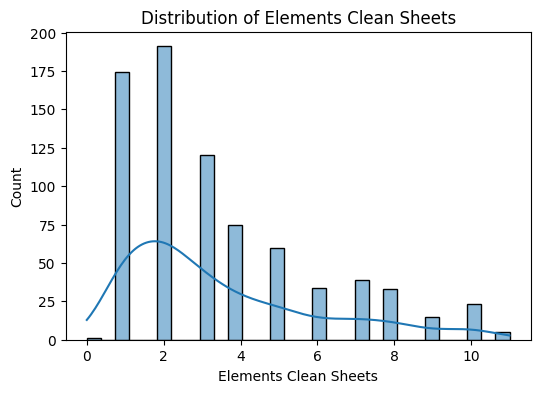

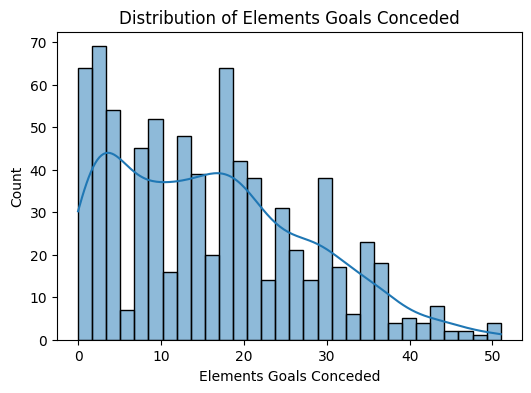

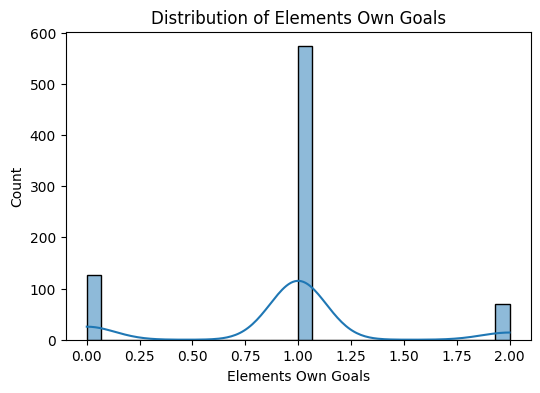

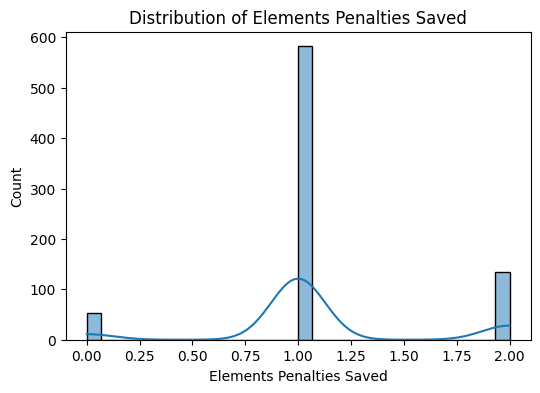

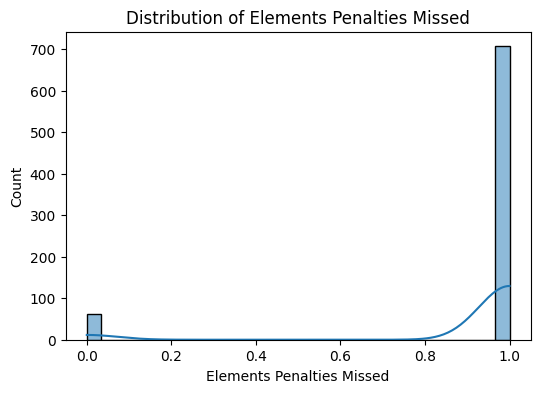

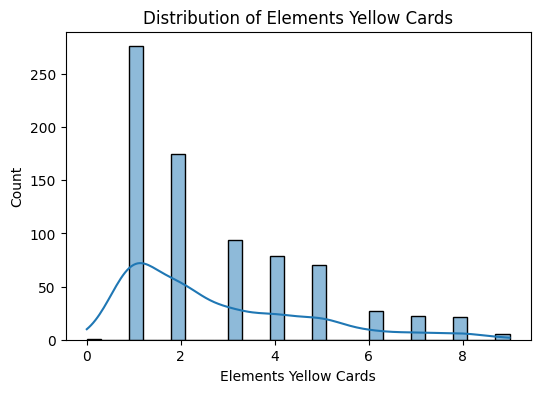

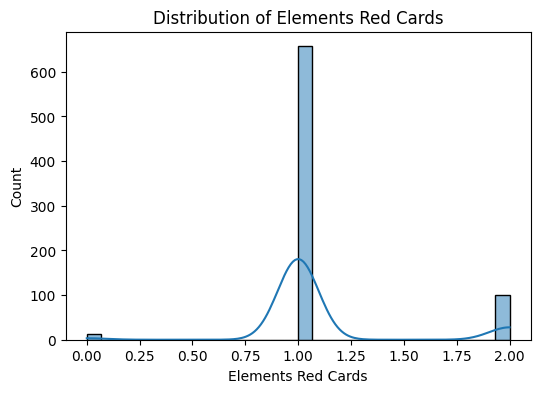

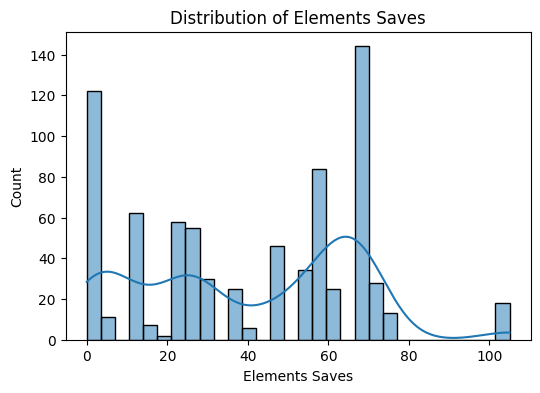

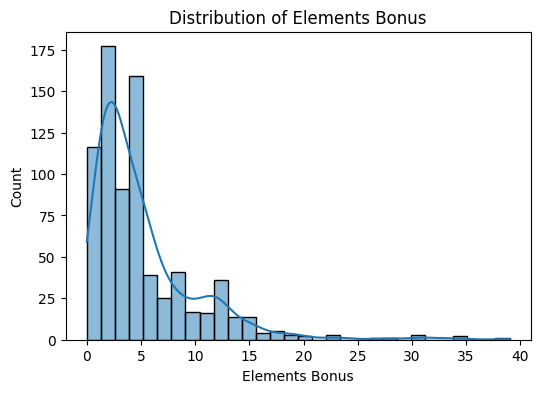

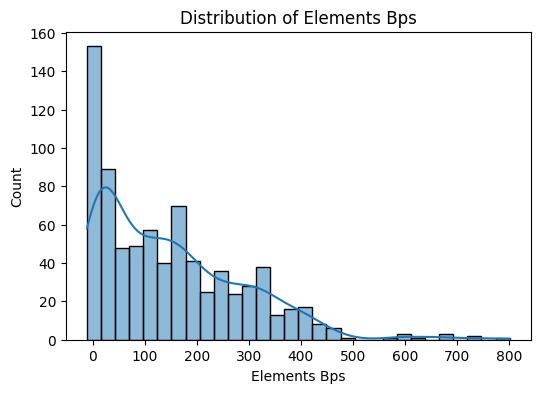

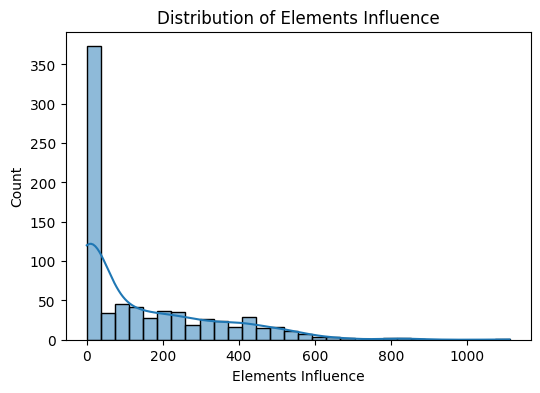

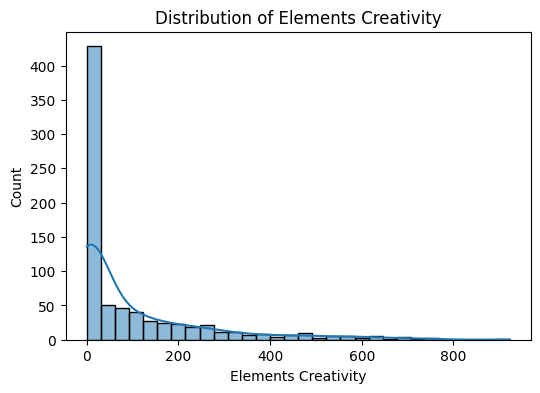

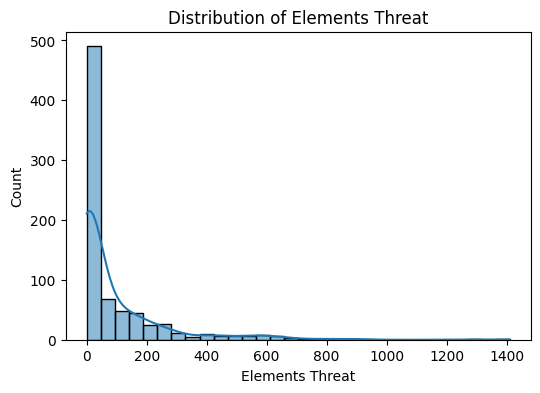

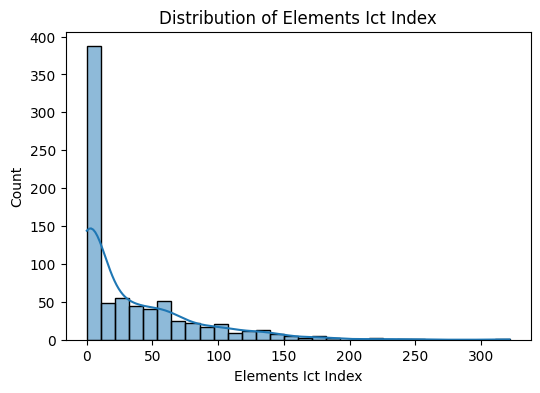

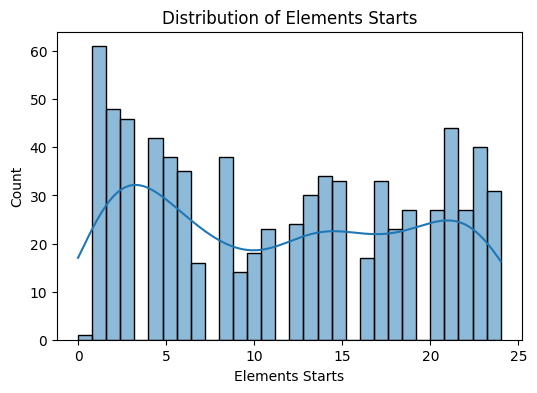

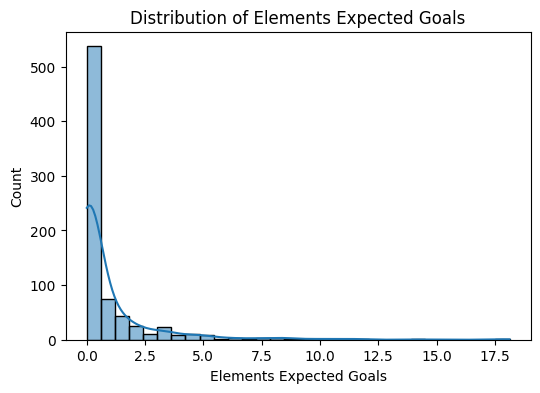

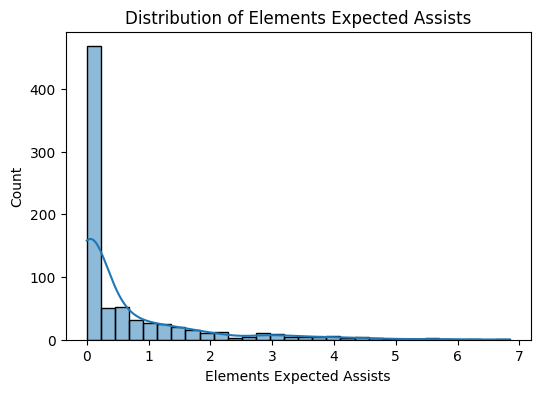

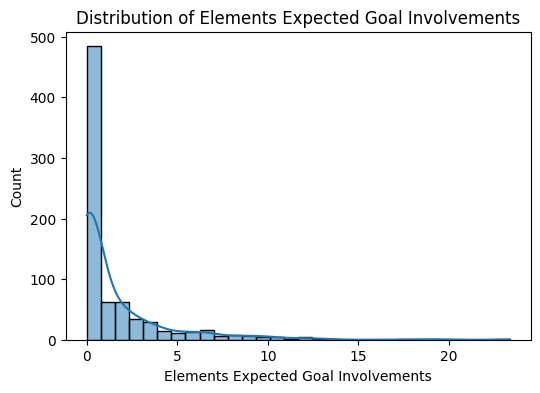

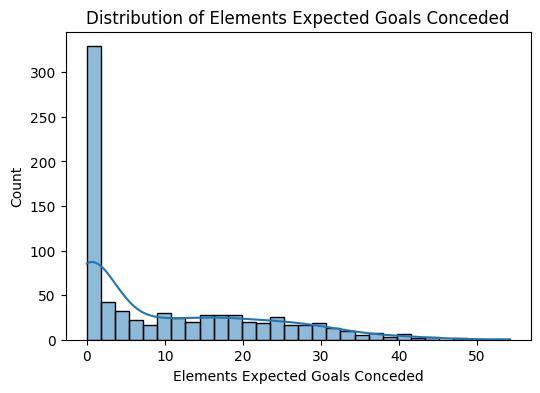

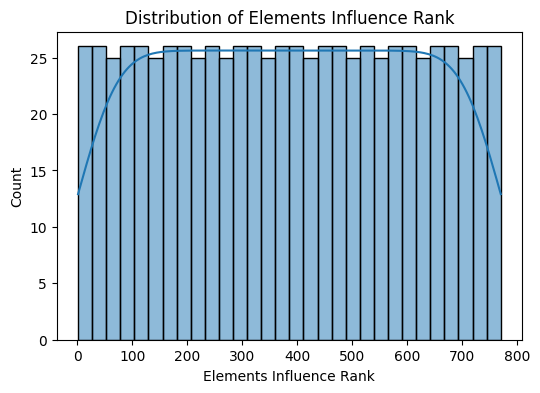

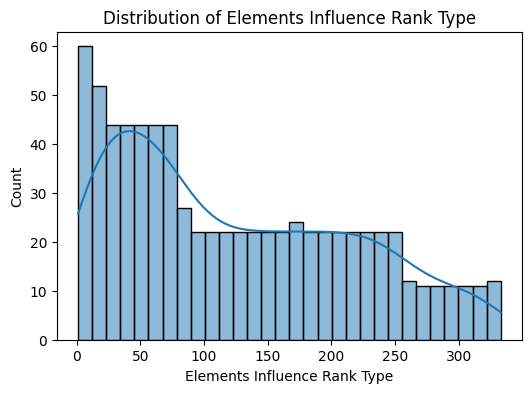

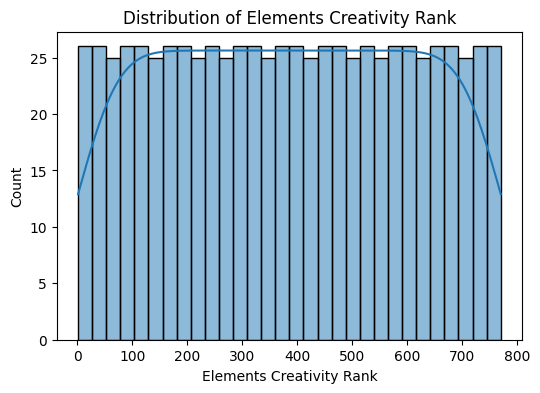

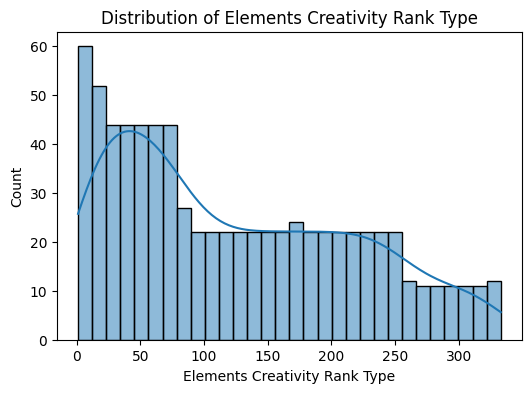

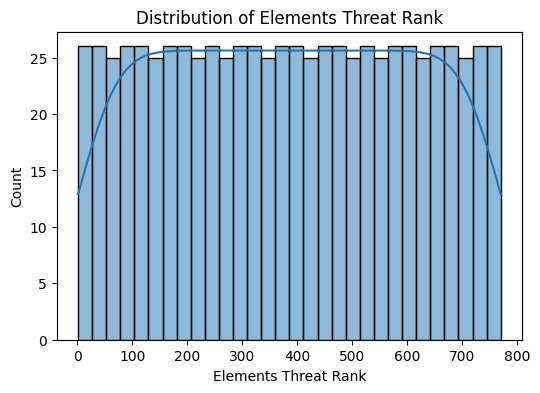

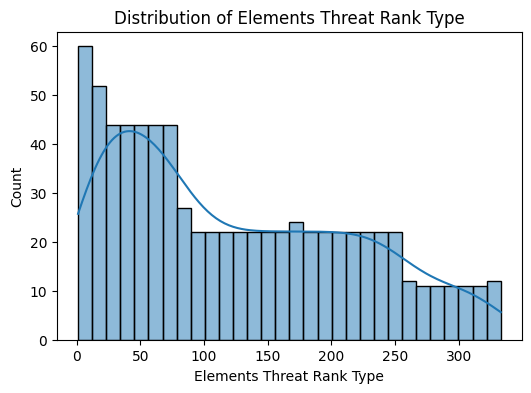

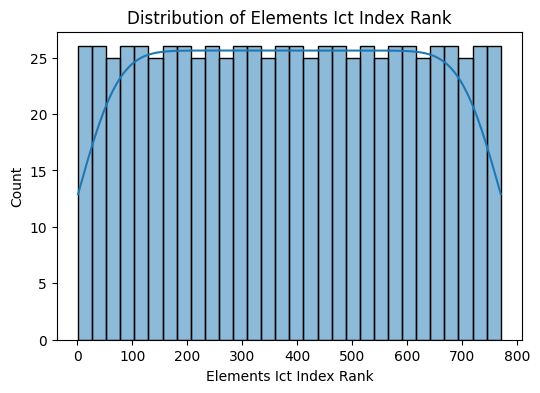

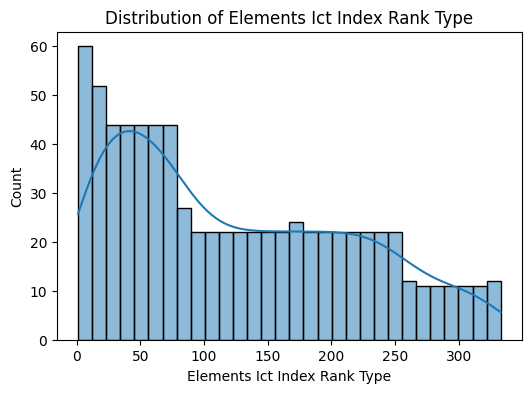

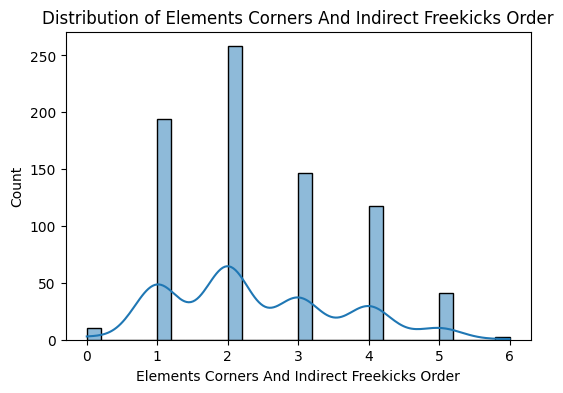

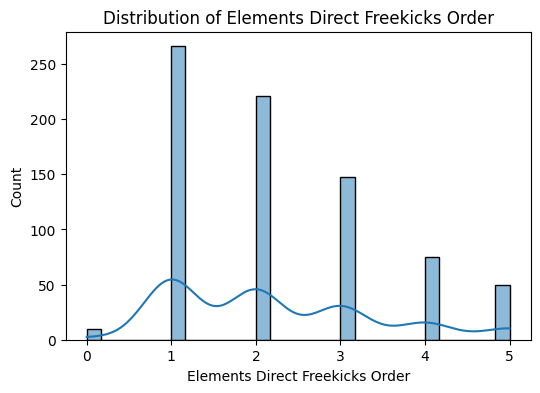

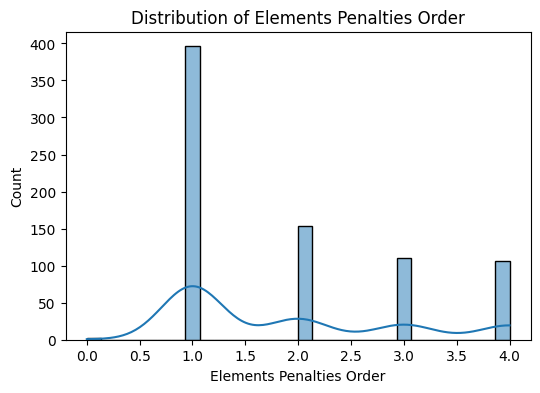

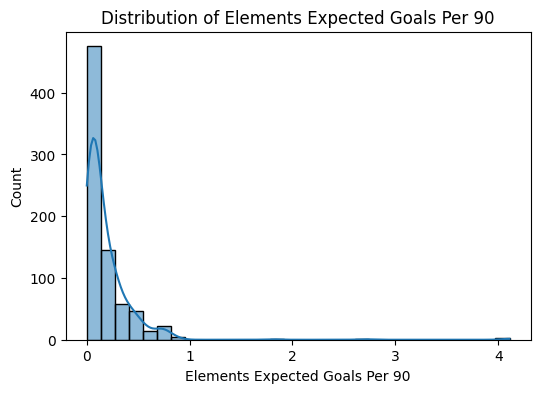

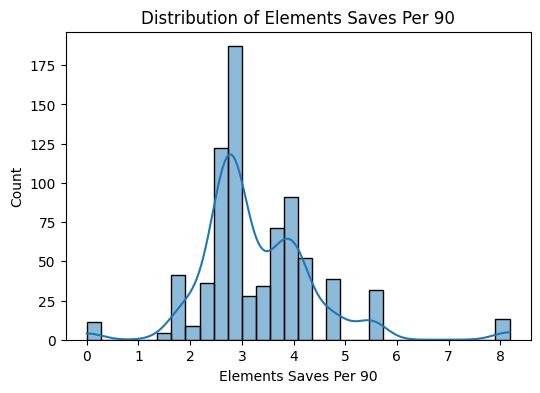

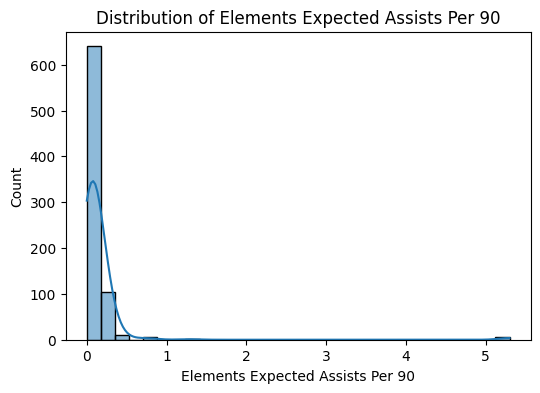

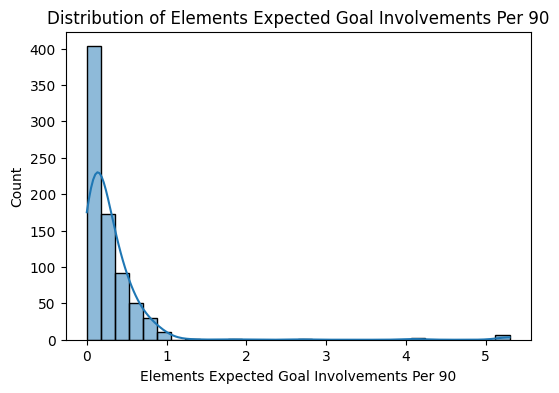

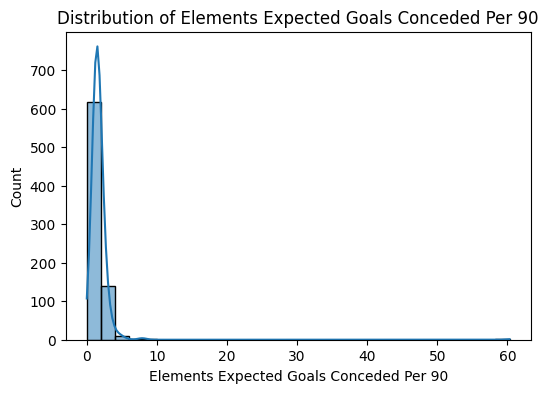

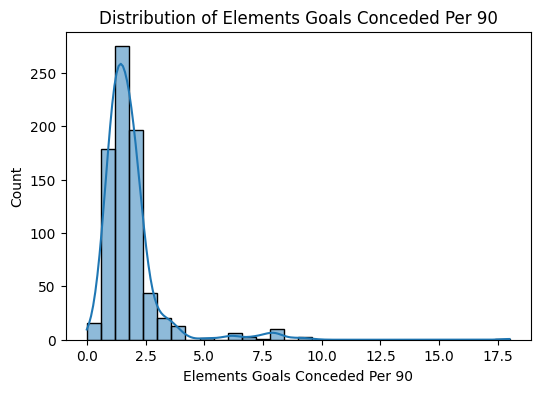

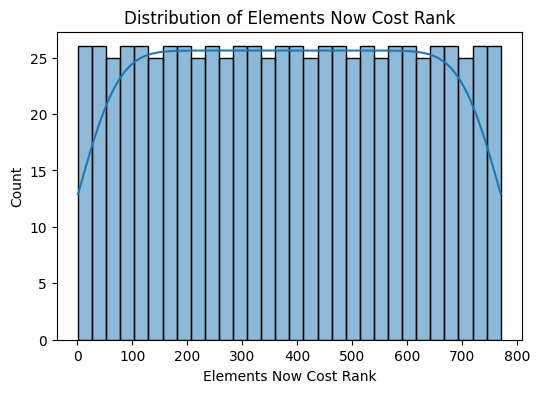

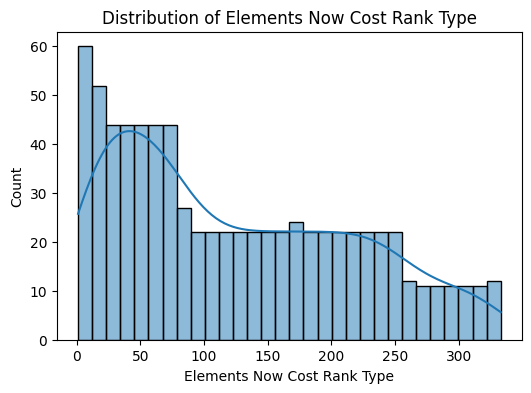

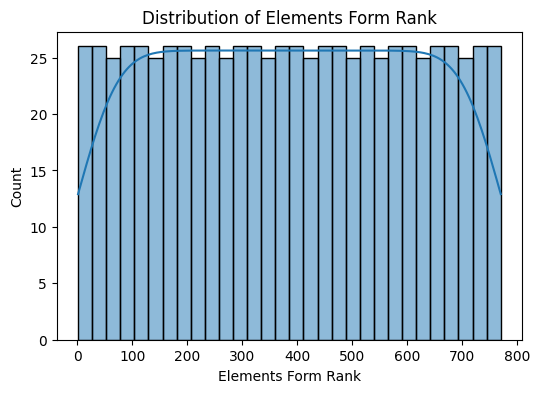

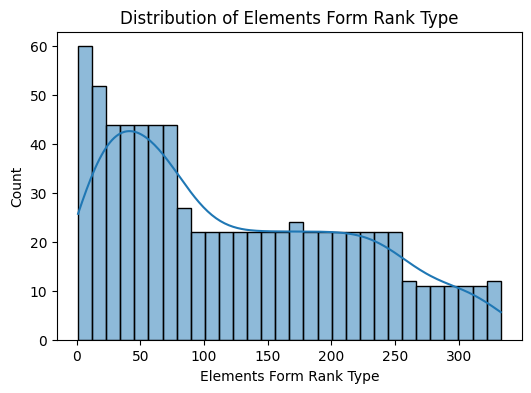

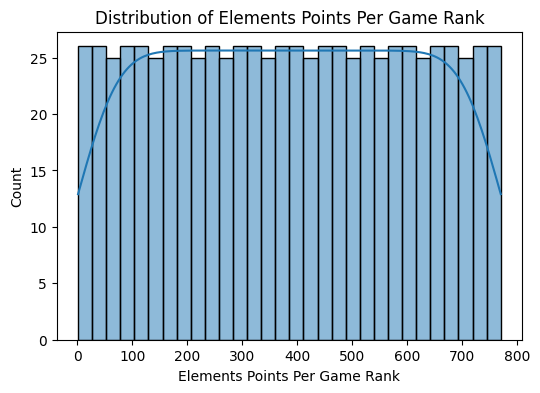

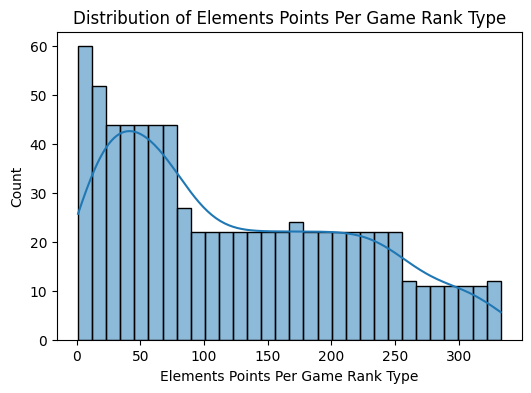

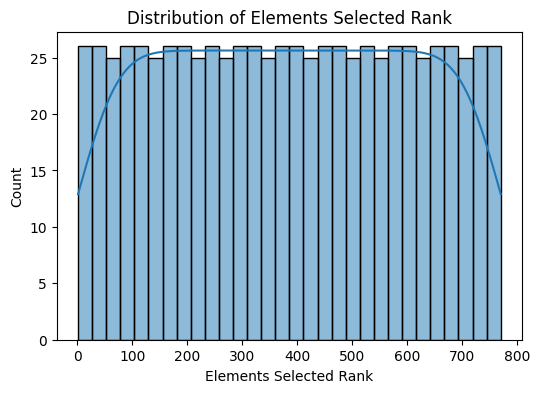

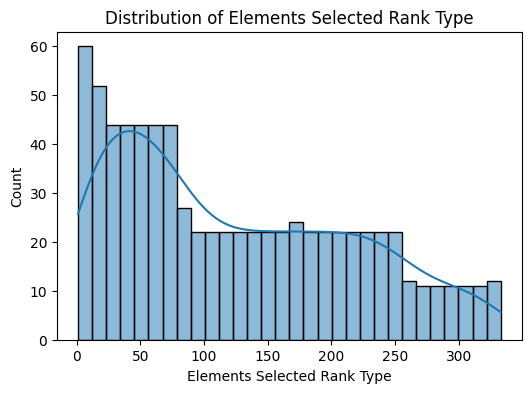

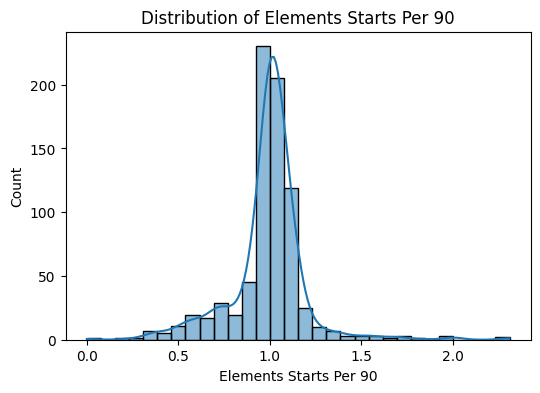

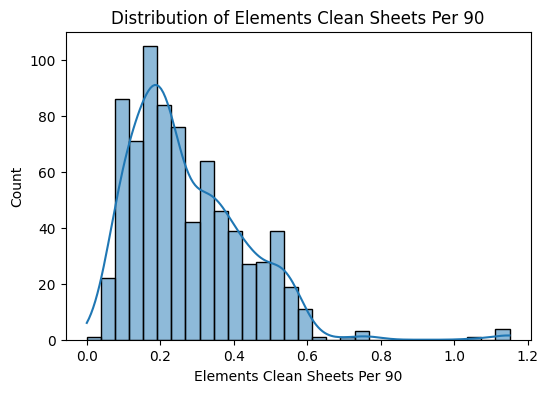

In [79]:
for col in fpl_df.select_dtypes(include= ['number']).columns: # for loop with only numeric features
    plt.figure(figsize=(6,4))
    sns.histplot(fpl_df[col],bins= 30, kde = True)
    plt.title(f'Distribution of {col}')
    plt.show()

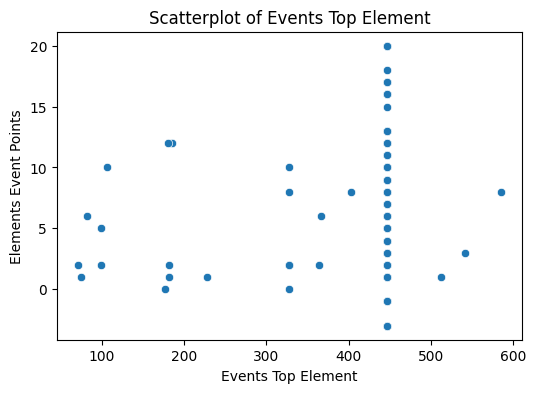

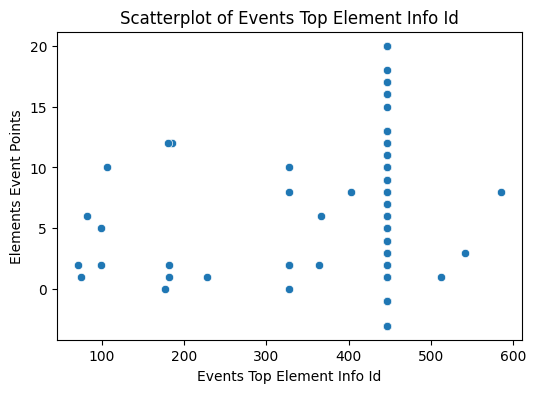

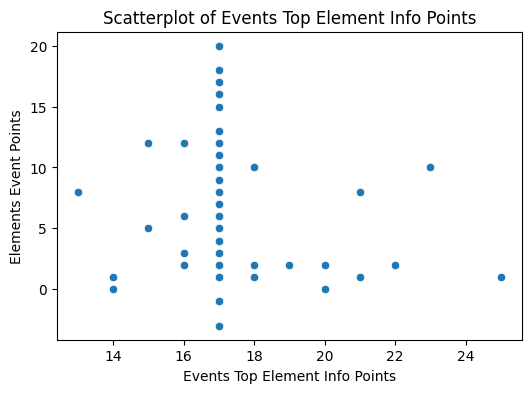

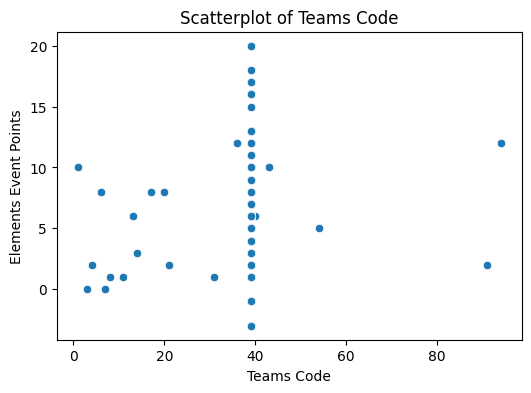

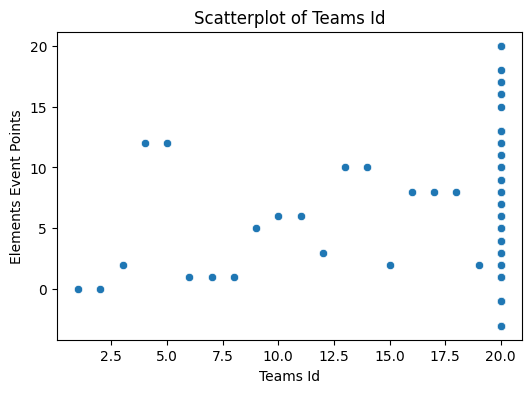

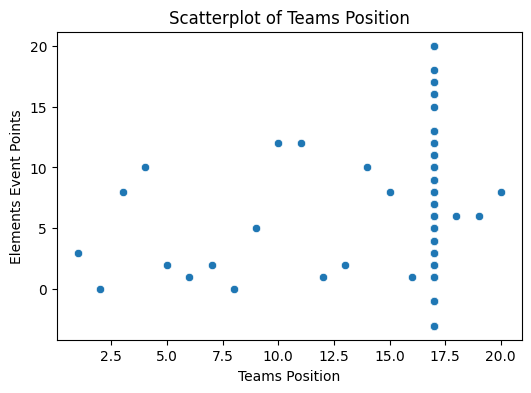

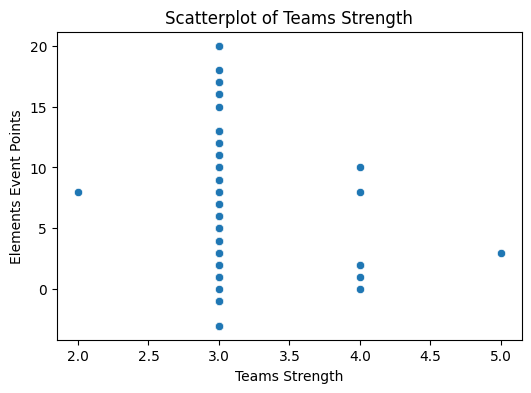

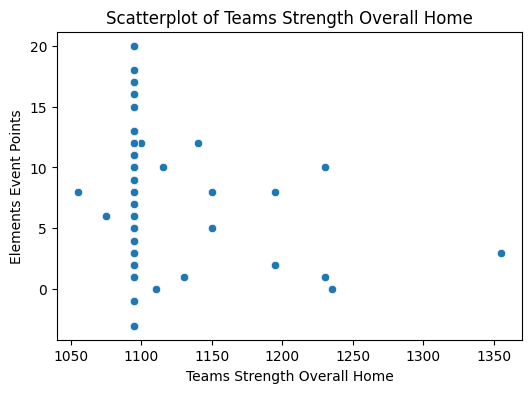

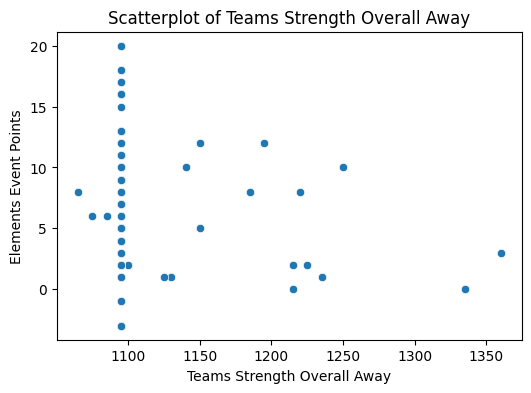

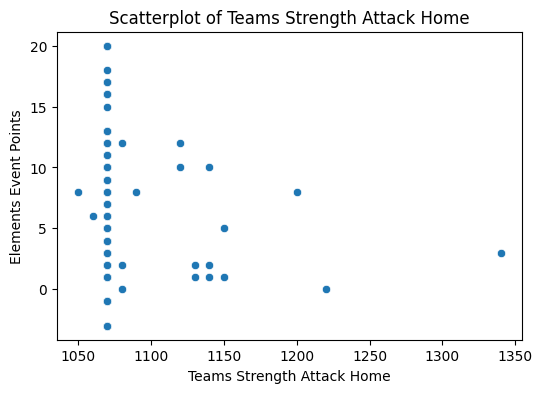

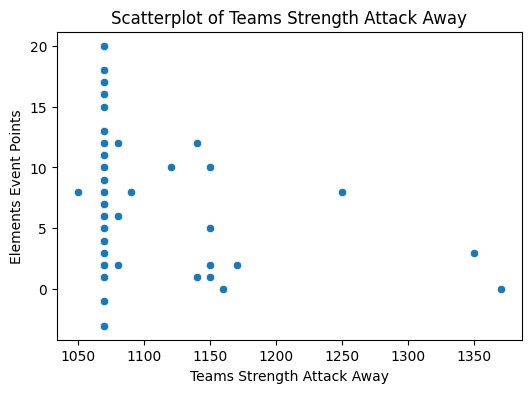

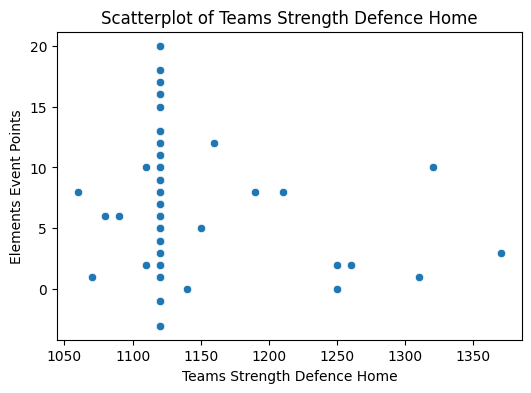

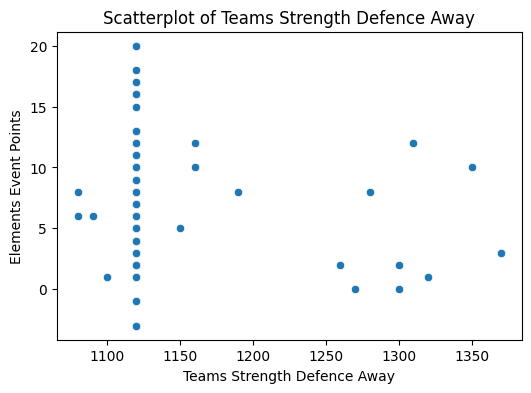

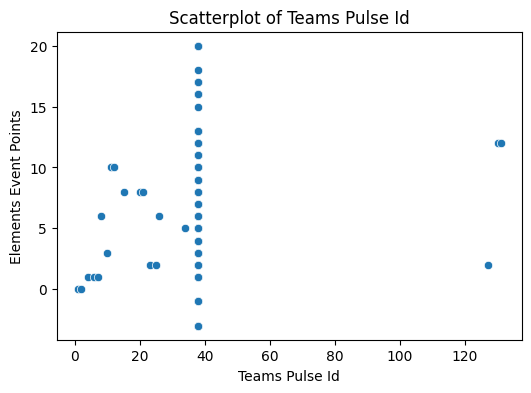

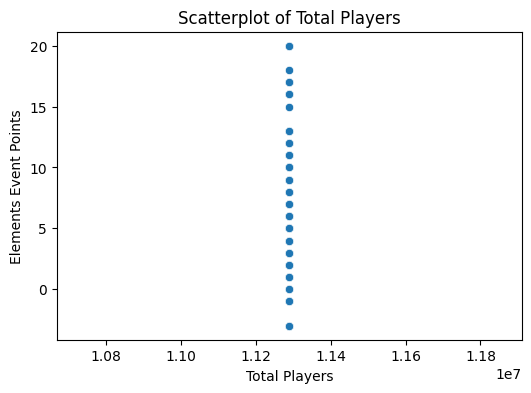

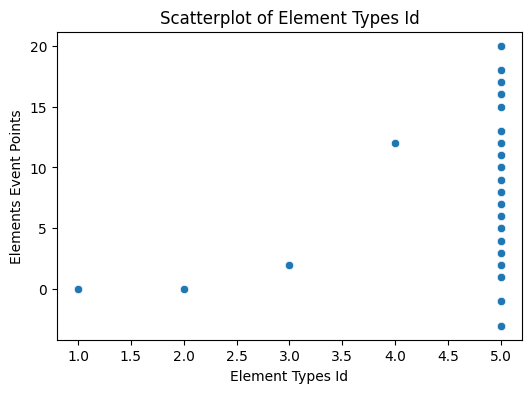

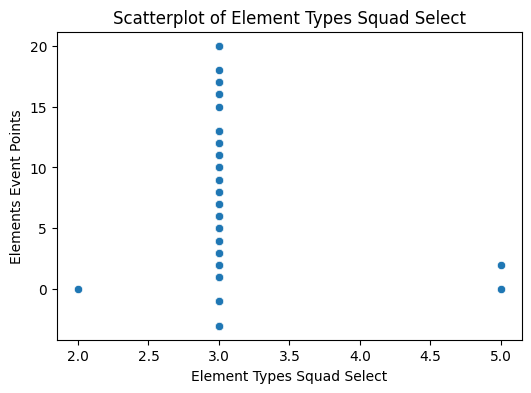

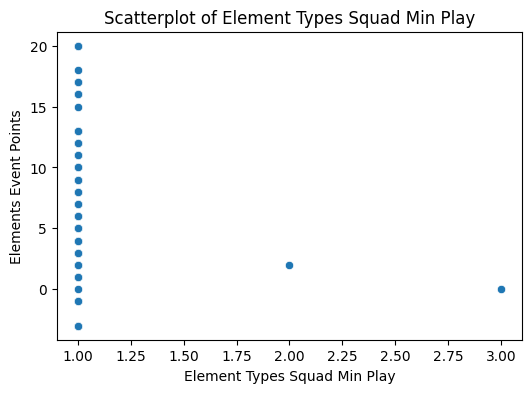

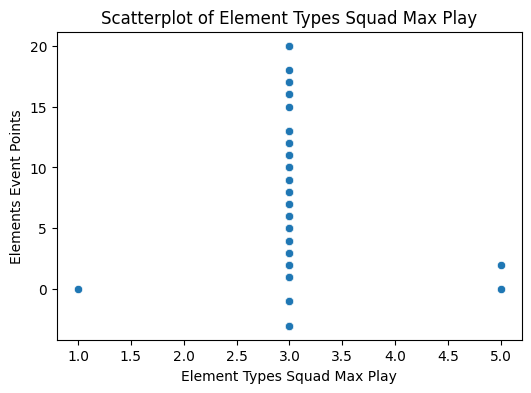

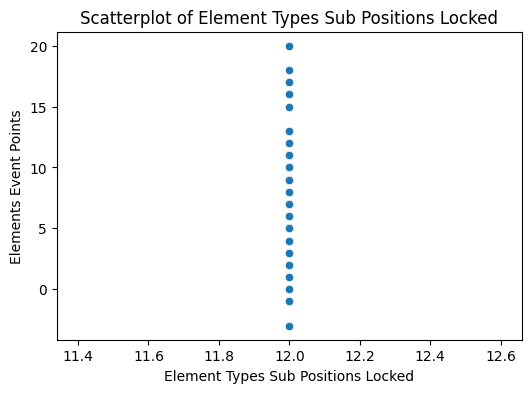

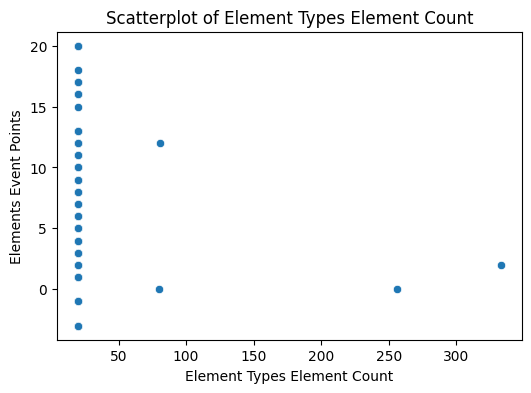

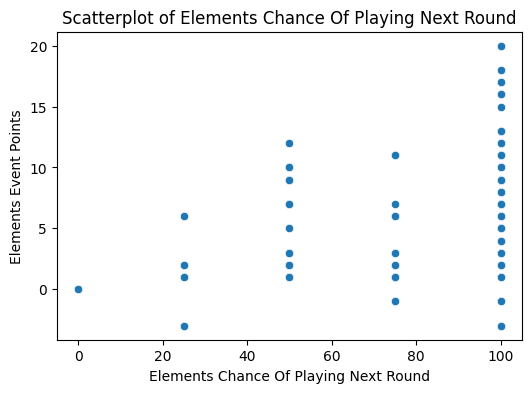

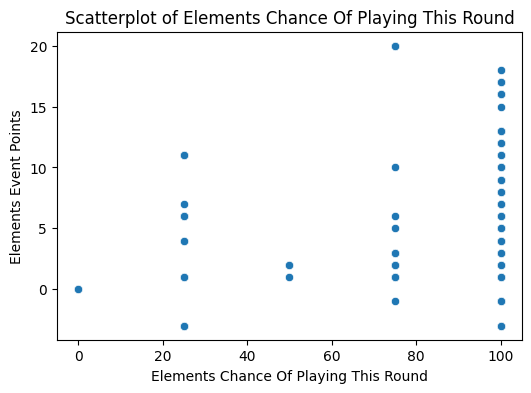

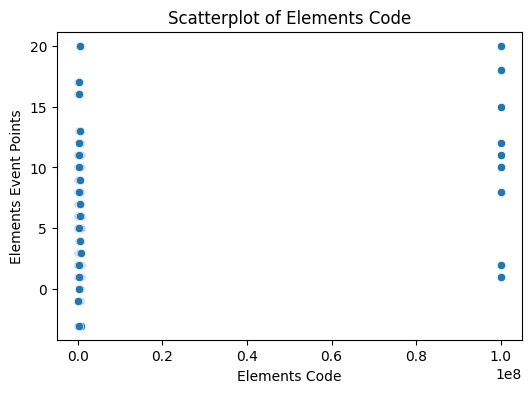

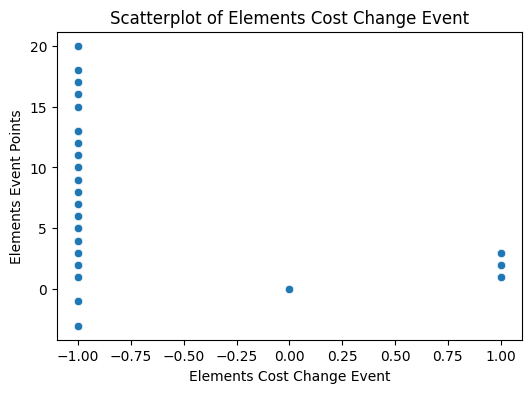

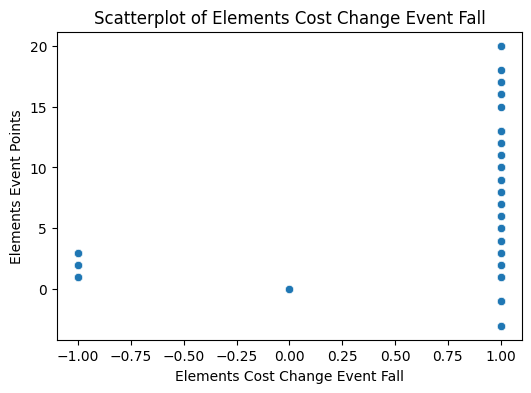

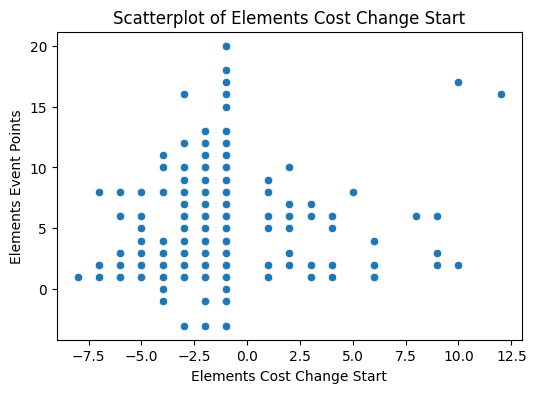

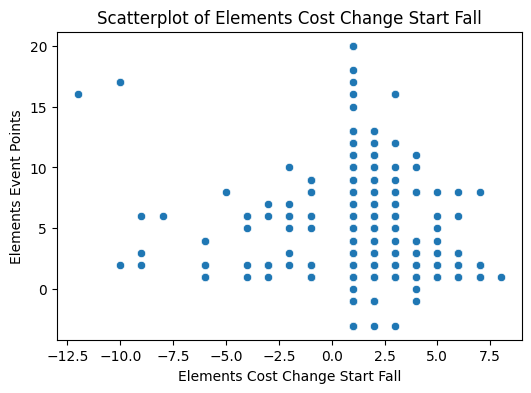

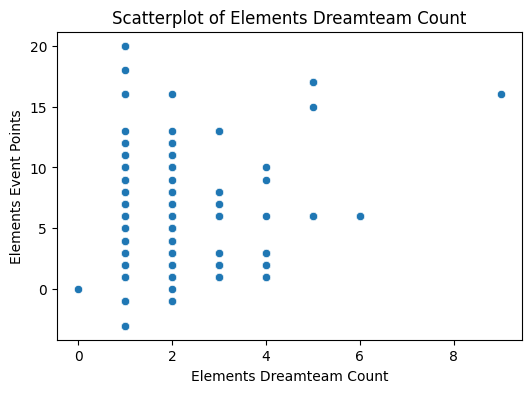

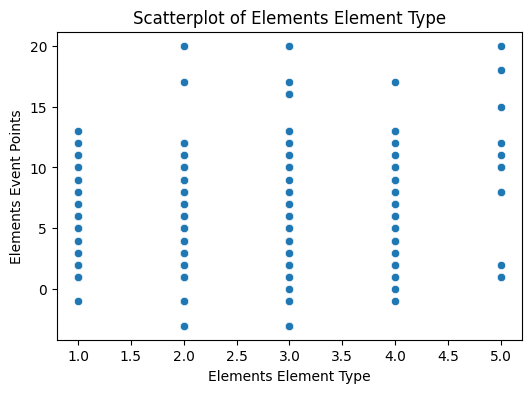

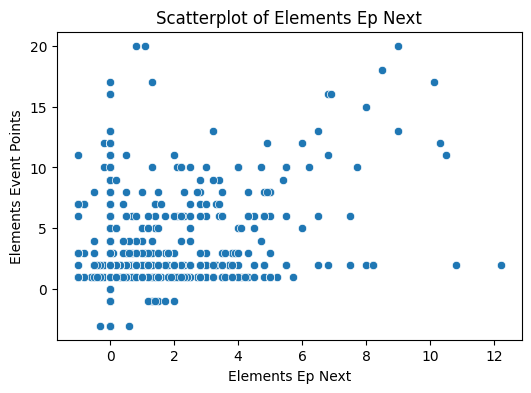

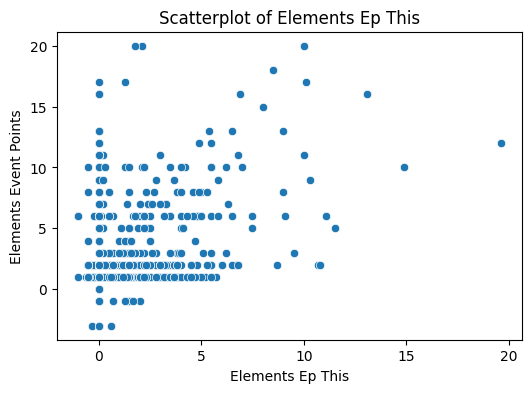

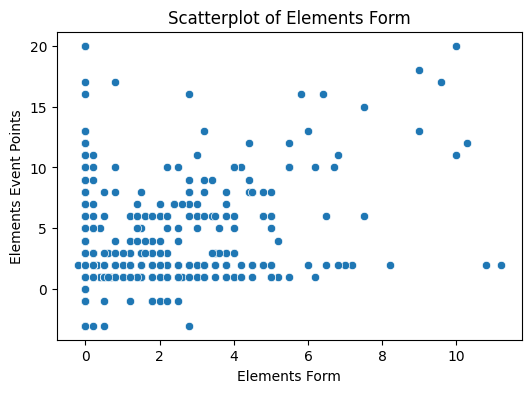

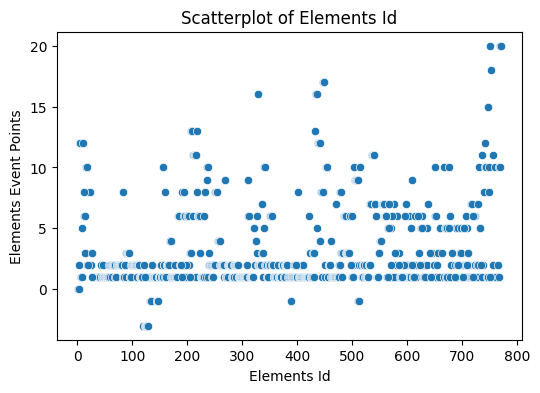

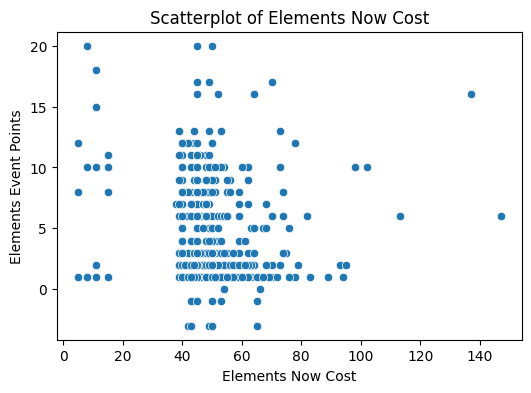

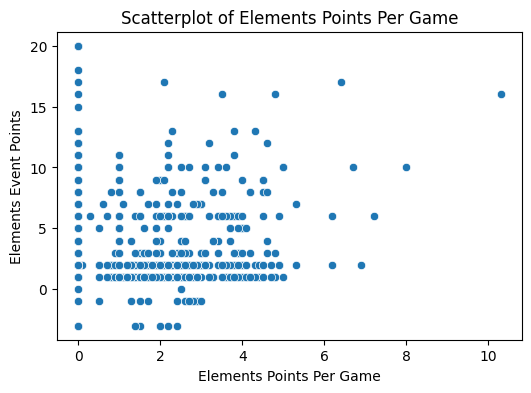

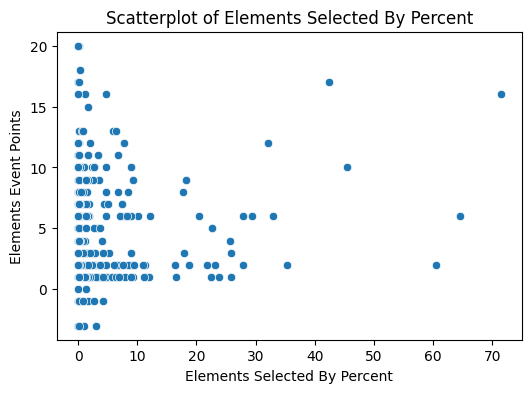

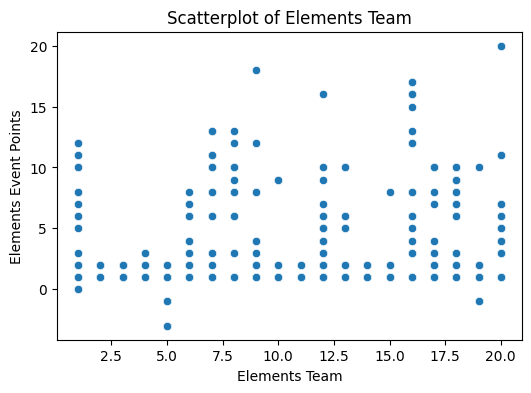

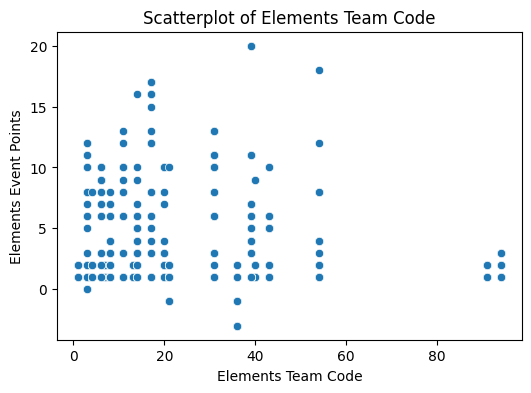

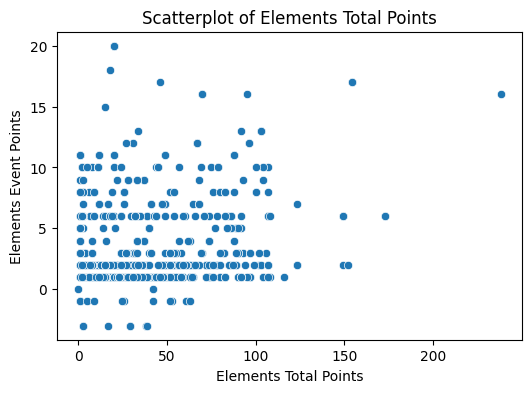

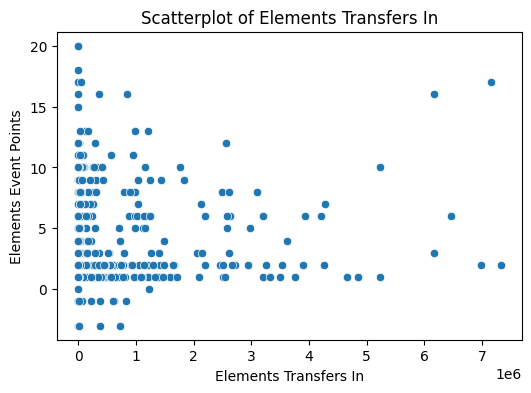

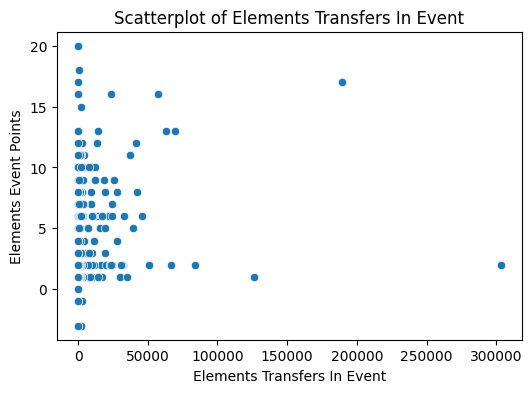

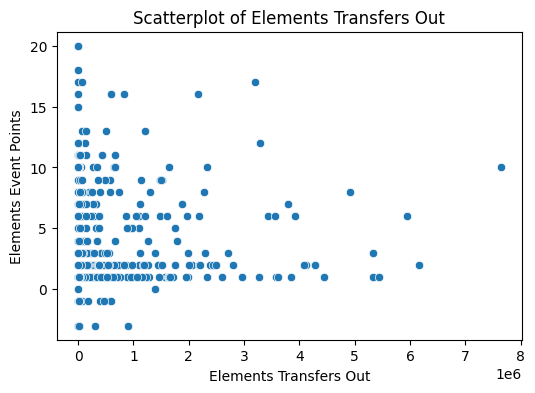

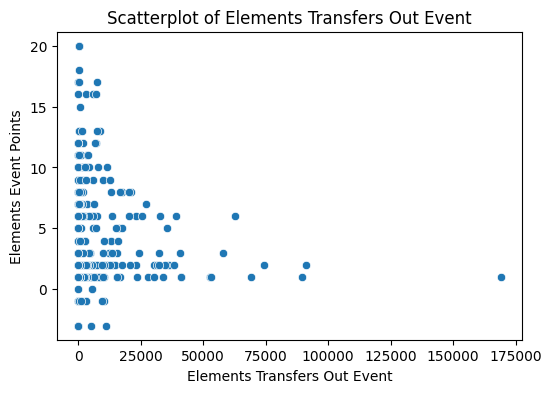

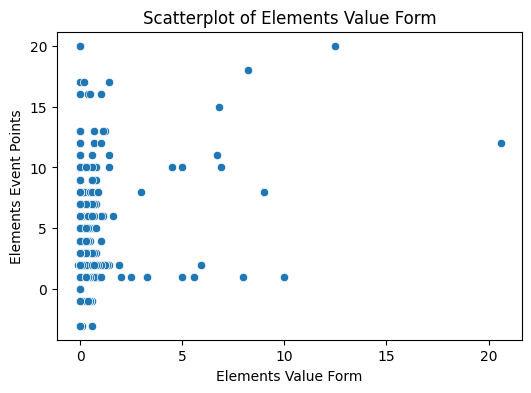

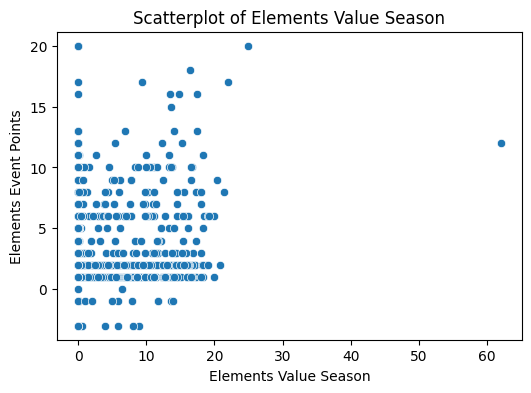

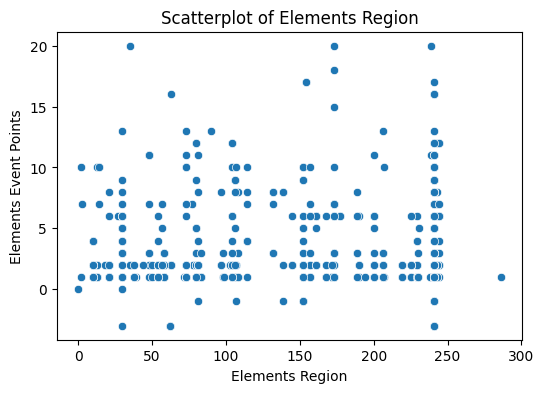

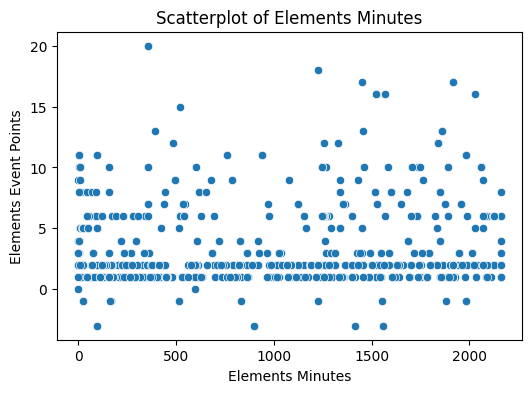

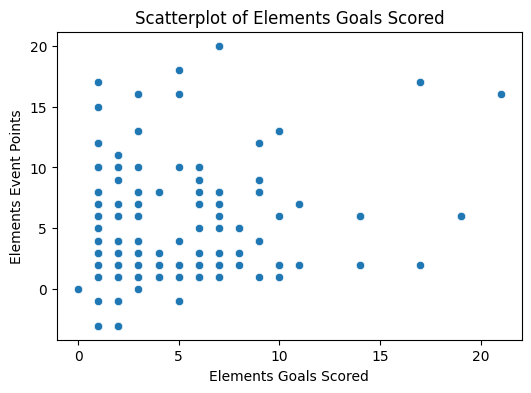

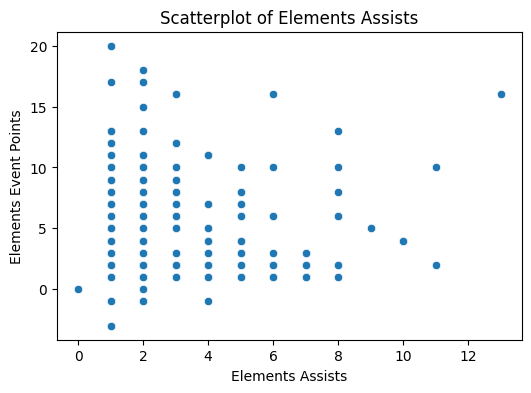

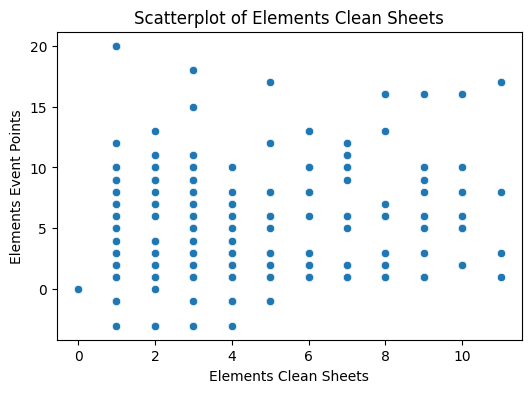

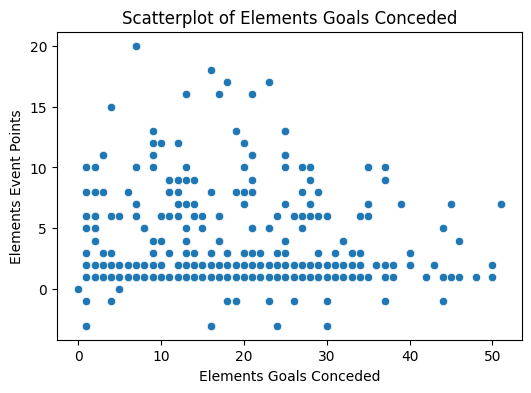

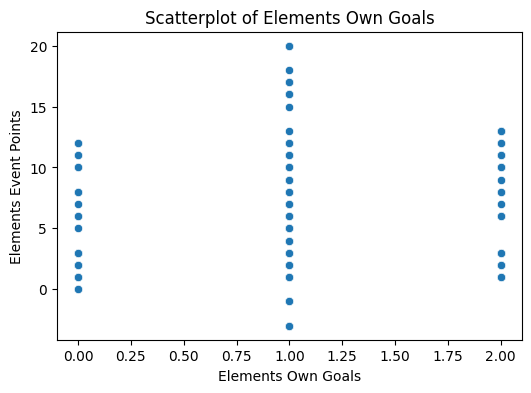

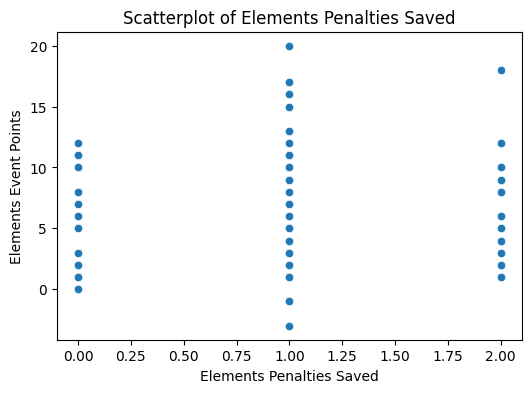

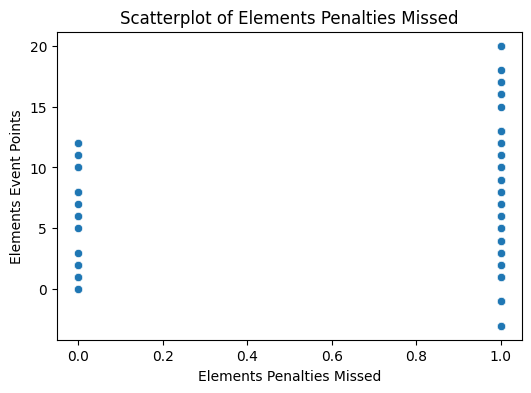

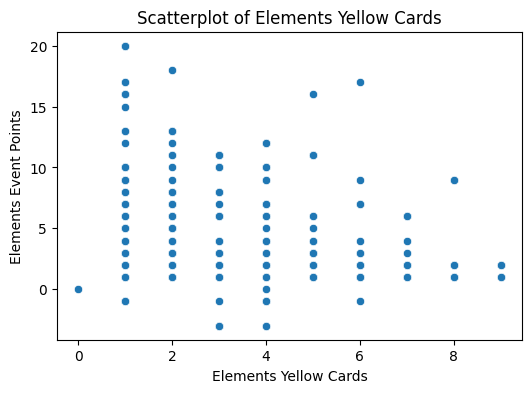

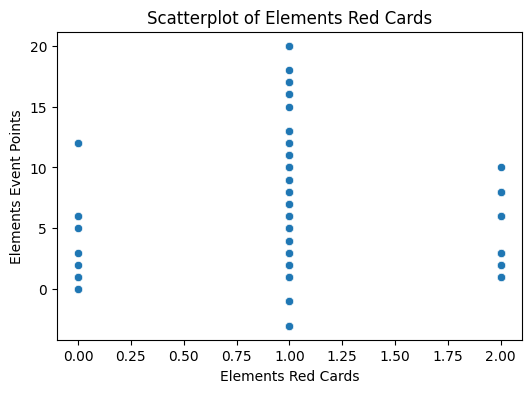

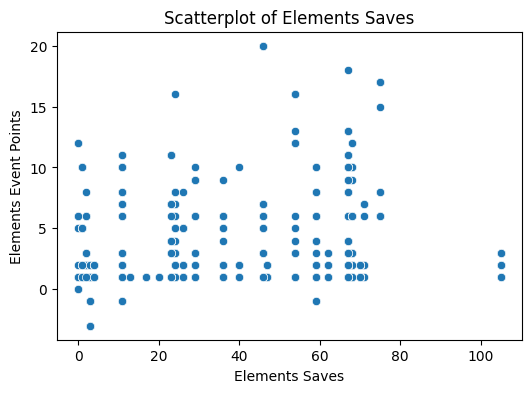

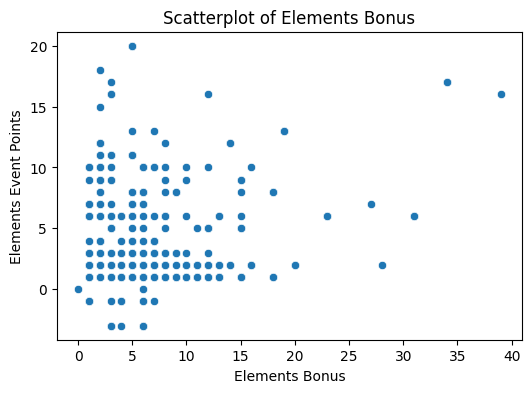

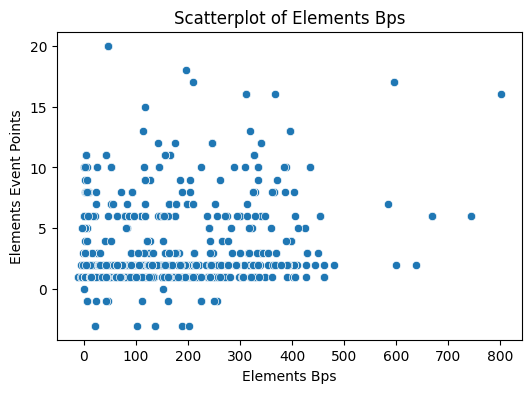

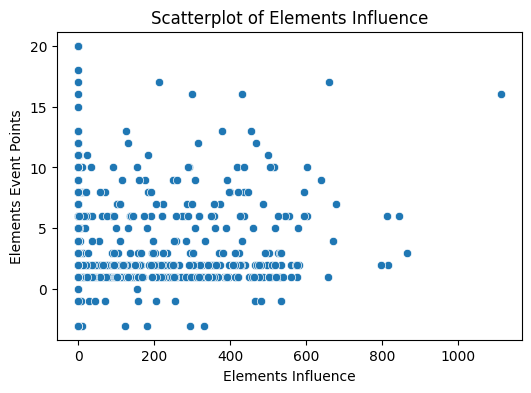

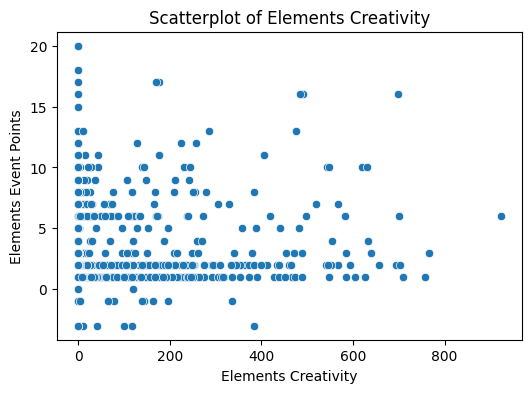

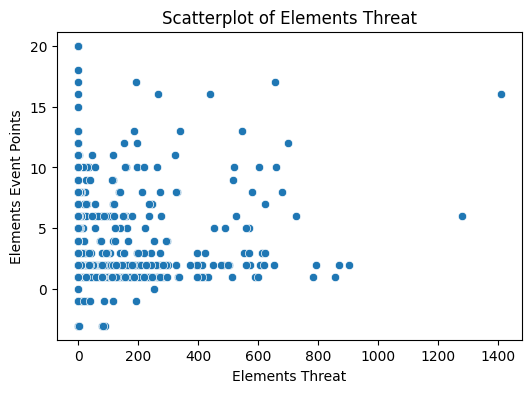

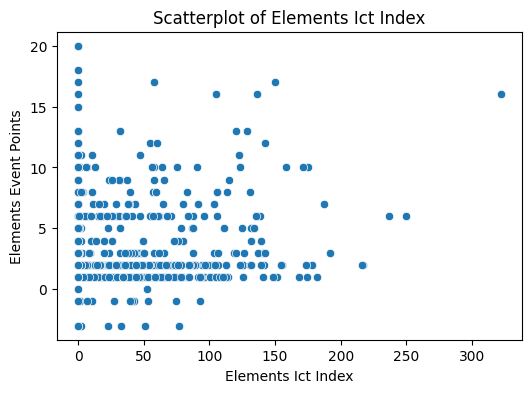

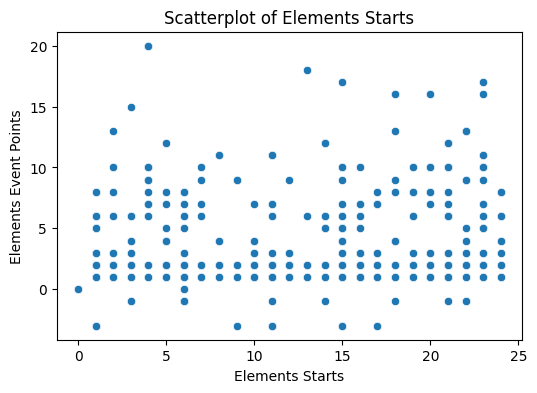

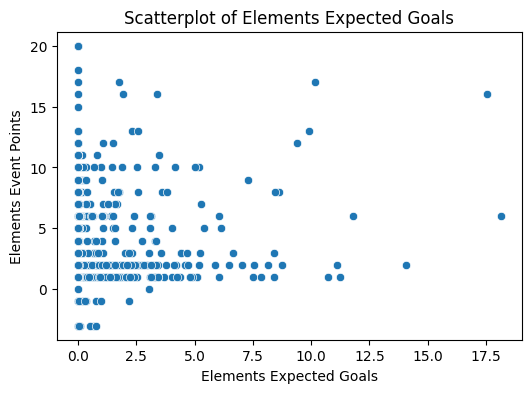

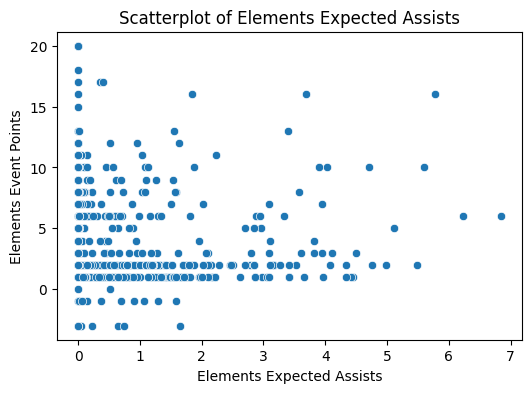

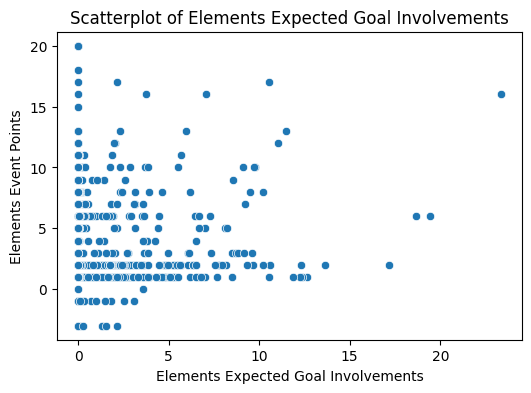

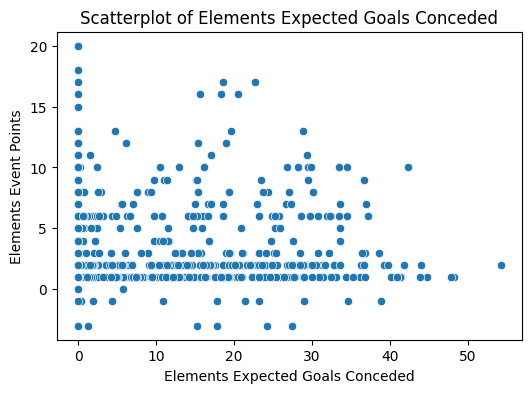

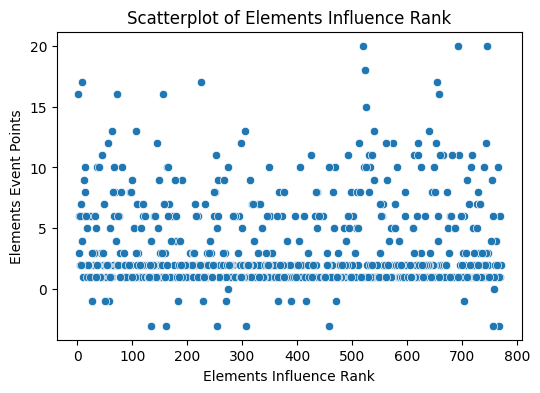

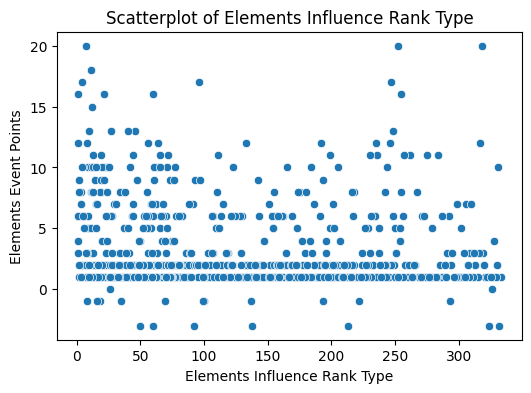

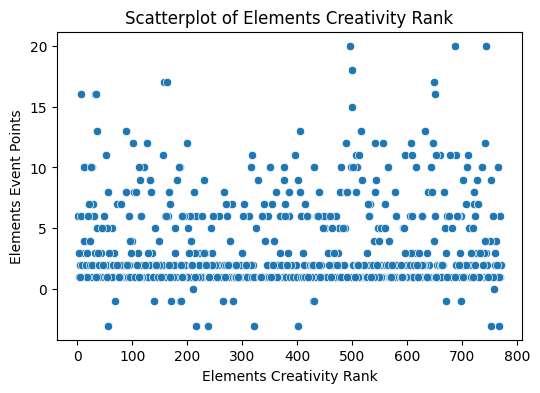

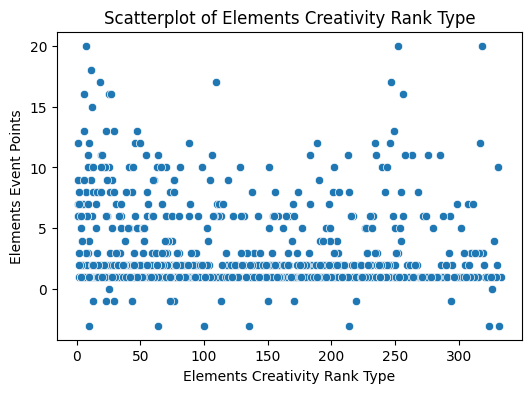

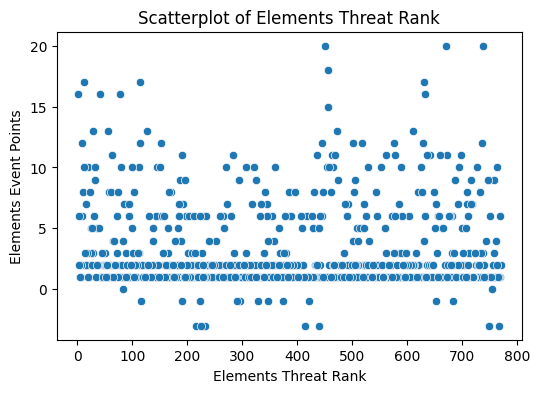

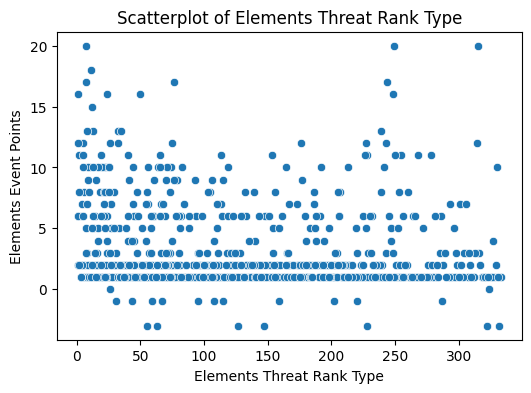

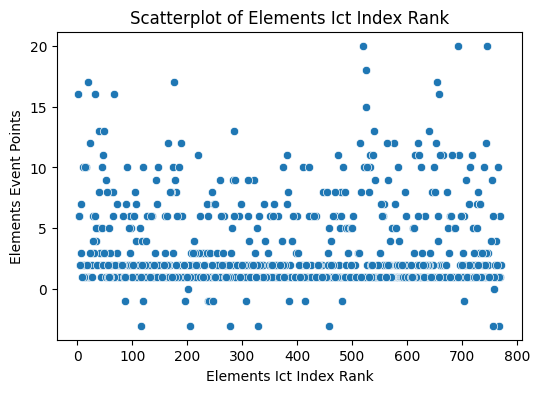

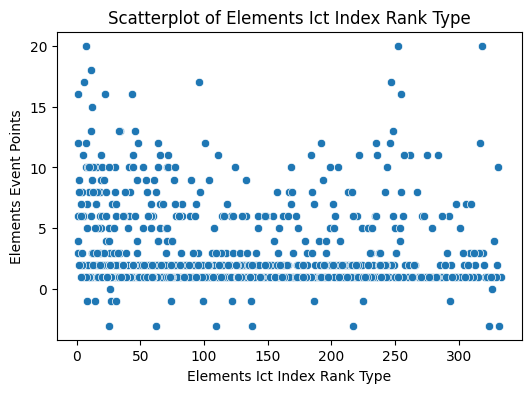

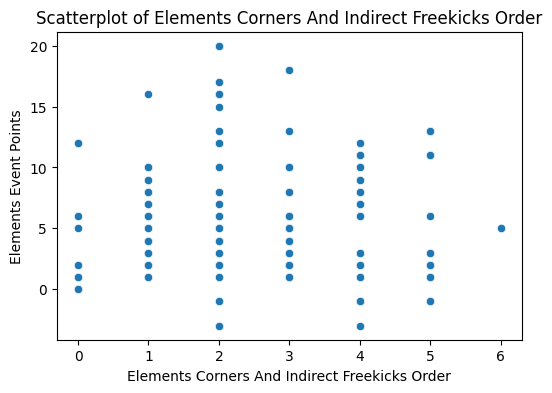

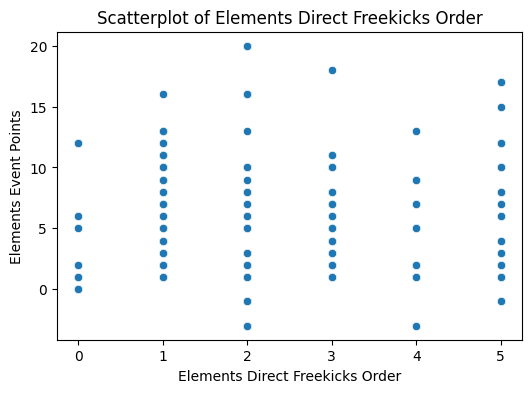

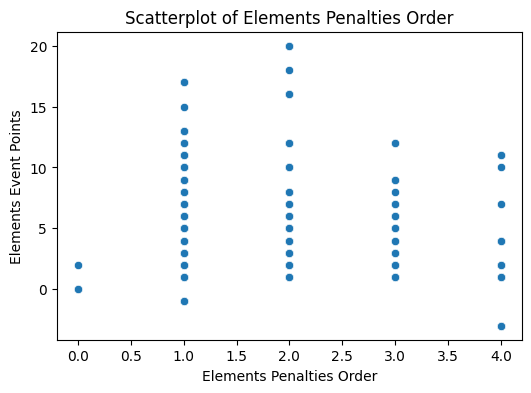

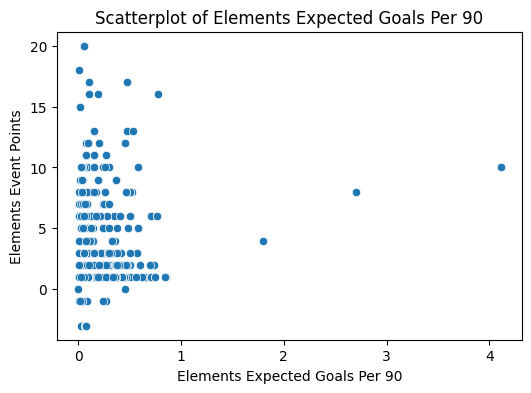

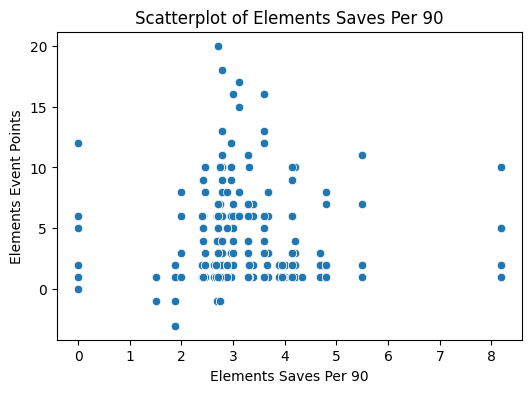

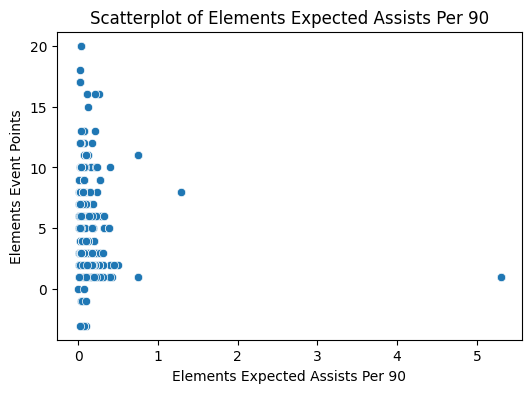

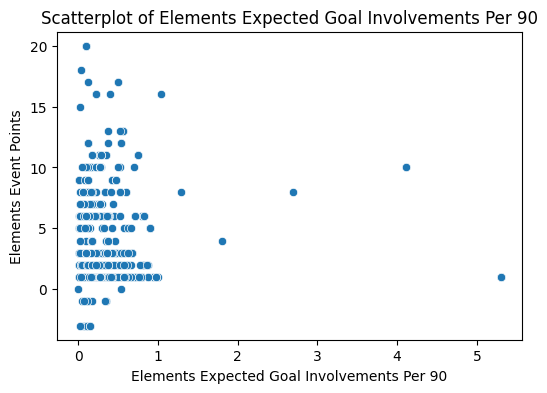

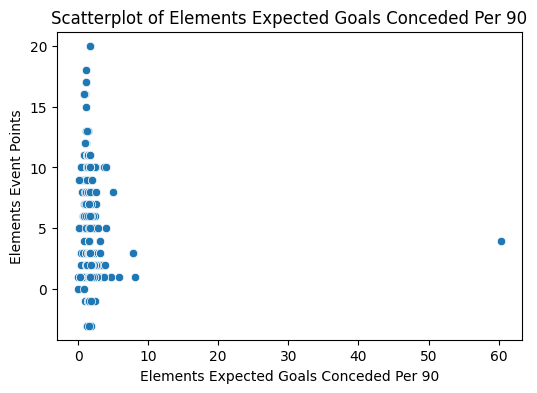

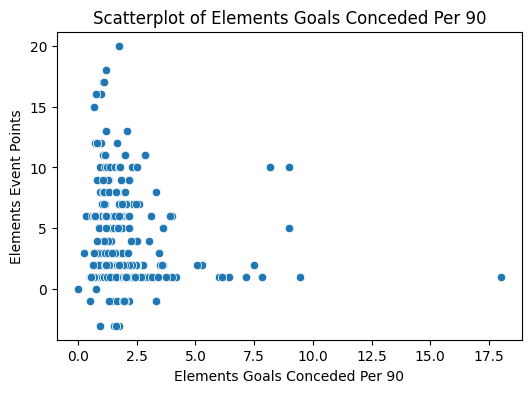

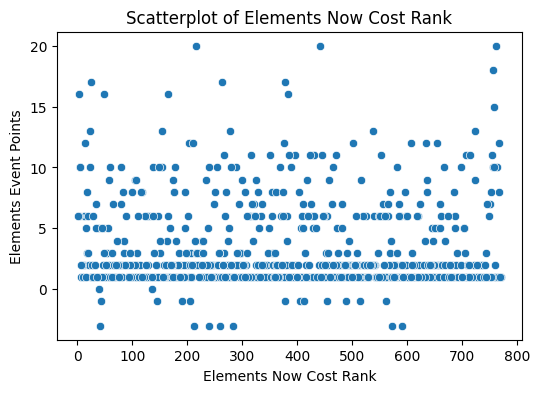

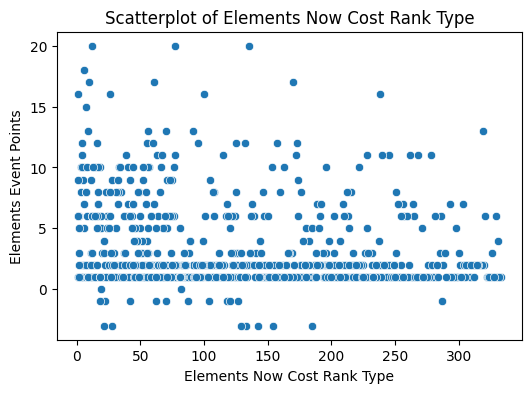

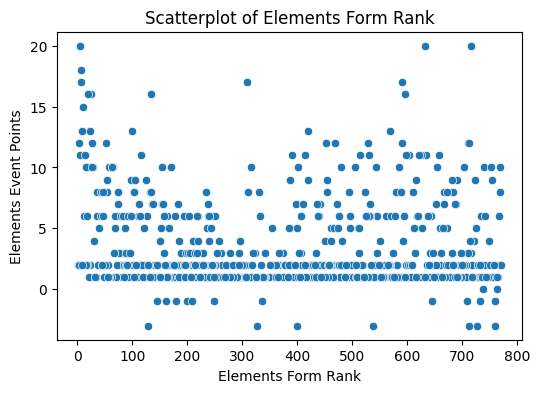

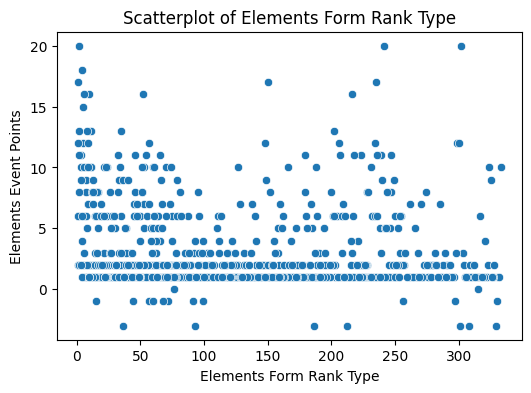

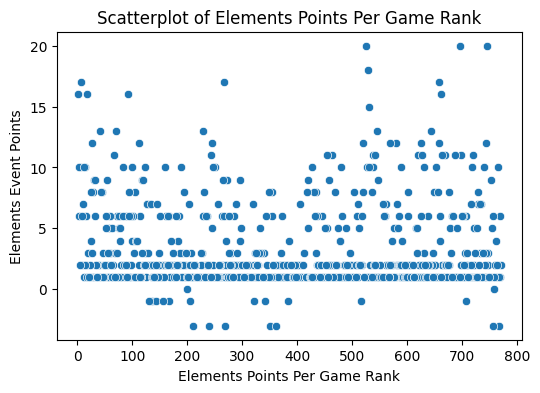

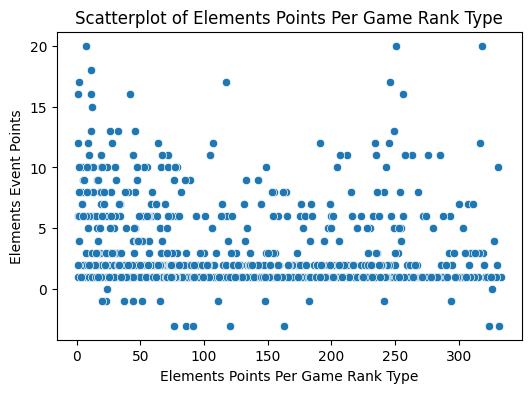

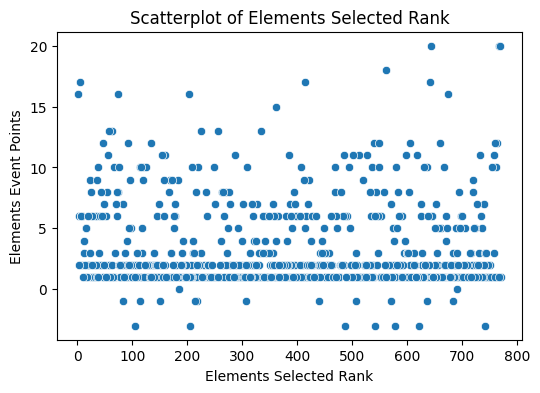

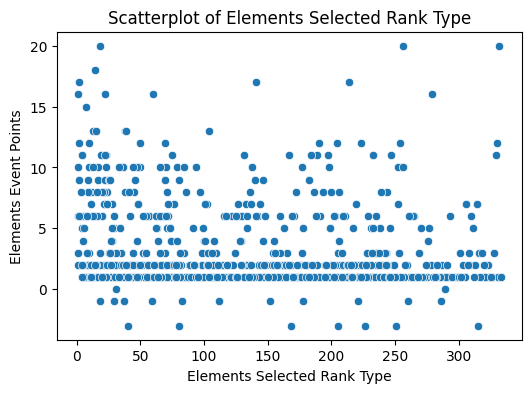

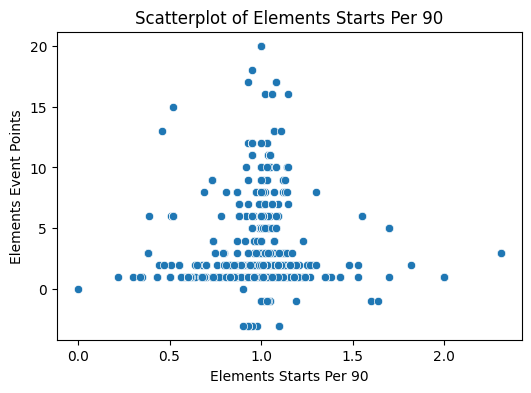

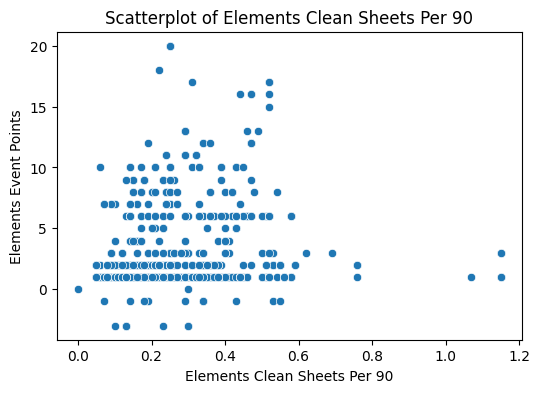

In [80]:
for col in fpl_df.select_dtypes(include= ['number']).columns: # for loop with only numeric features
    if col == 'Elements Event Points':
        continue
    plt.figure(figsize=(6,4))
    sns.scatterplot(data = fpl_df, x = fpl_df[col], y = fpl_df['Elements Event Points'])
    plt.title(f'Scatterplot of {col}')
    plt.show()
    


In [81]:
#remove low variance features
columns = ['Events Top Element','Events Top Element Info Id','Events Top Element Info Points',
           'Teams Code','Teams Id','Teams Position','Teams Strength', 'Teams Strength Overall Home',
           'Teams Strength Overall Away','Teams Strength Attack Home','Teams Strength Attack Away',
           'Teams Strength Defence Home', 'Teams Strength Defence Away', 'Teams Pulse Id',
           'Total Players','Element Types Id','Element Types Squad Select',
           'Element Types Squad Min Play','Element Types Squad Max Play','Element Types Sub Positions Locked',
           'Element Types Element Count','Elements Chance Of Playing Next Round','Elements Chance Of Playing This Round',
           'Elements Code','Elements Cost Change Event','Elements Cost Change Event Fall','Elements Own Goals', 
           'Elements Penalties Saved', 'Elements Penalties Missed','Elements Red Cards']
remove_cols(fpl_df, columns)

print(fpl_df.shape[1])

67


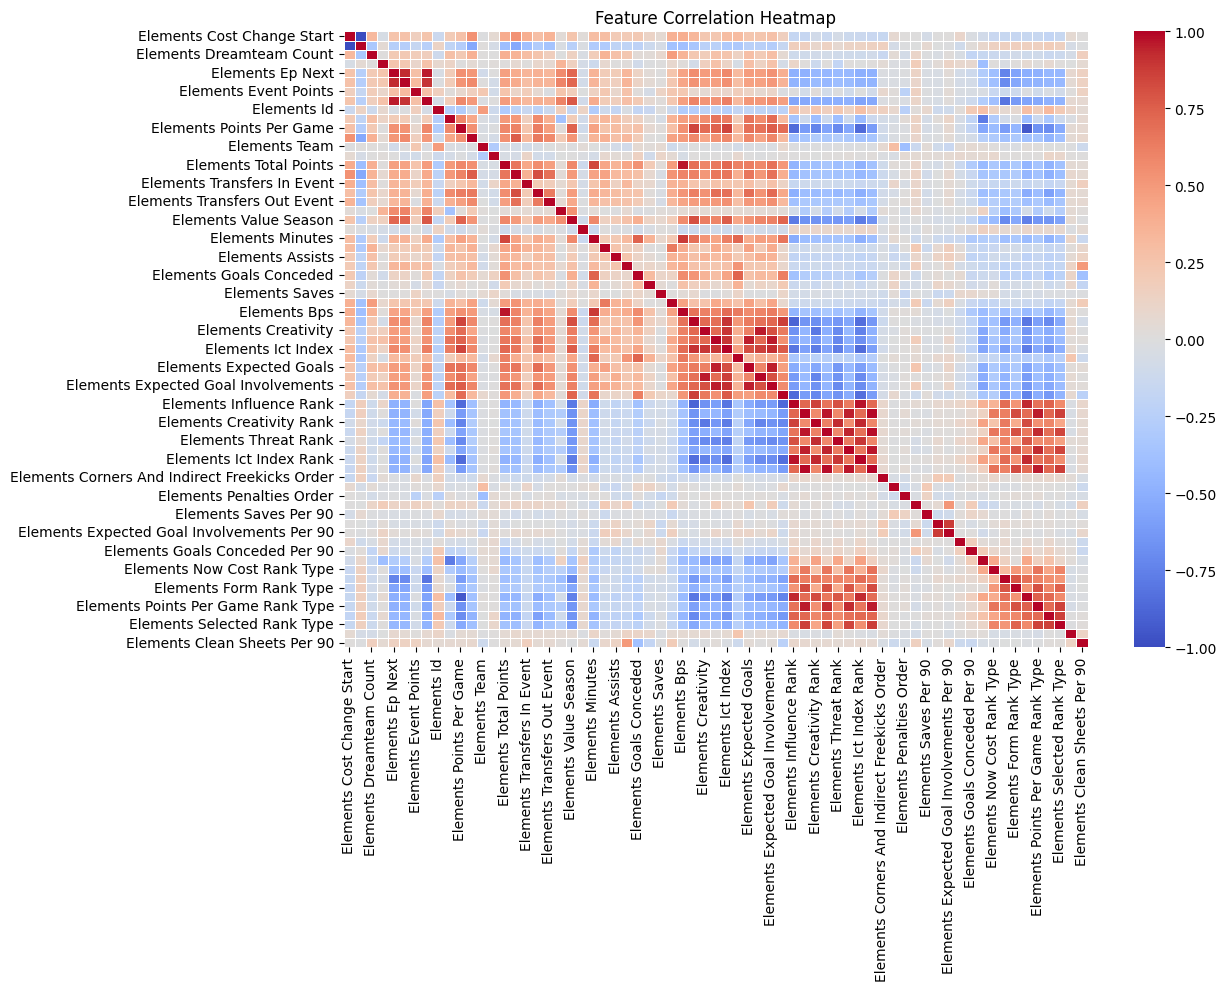

In [82]:
plt.figure(figsize=(12, 8))
sns.heatmap(fpl_df.corr(method = 'pearson'), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [83]:
fpl_corr = fpl_df.corr(method = 'pearson')# assign correlation to a variable 

#create a dataframe of features with high correlation between them
corr_pairs = (
    fpl_corr.where(np.triu(np.ones(fpl_corr.shape), k=1).astype(bool))  # Get upper triangle only
    .stack() #convert matrix to long format table
    .reset_index()) #reset index to convert to Dataframe

corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

high_corr_pairs = corr_pairs[abs(corr_pairs['Correlation']) > 0.2]

low_corr_pairs = corr_pairs[abs(corr_pairs['Correlation']) < 0.2]
# Display the highly correlated feature pairs
print(high_corr_pairs['Feature 2'].unique())

print('\n',low_corr_pairs['Feature 2'].unique())

['Elements Cost Change Start Fall' 'Elements Dreamteam Count'
 'Elements Ep Next' 'Elements Ep This' 'Elements Form'
 'Elements Points Per Game' 'Elements Selected By Percent'
 'Elements Total Points' 'Elements Transfers In'
 'Elements Transfers In Event' 'Elements Transfers Out'
 'Elements Transfers Out Event' 'Elements Value Season' 'Elements Minutes'
 'Elements Goals Scored' 'Elements Assists' 'Elements Goals Conceded'
 'Elements Bonus' 'Elements Bps' 'Elements Influence'
 'Elements Creativity' 'Elements Threat' 'Elements Ict Index'
 'Elements Starts' 'Elements Expected Goals' 'Elements Expected Assists'
 'Elements Expected Goal Involvements' 'Elements Now Cost'
 'Elements Clean Sheets' 'Elements Value Form' 'Elements Now Cost Rank'
 'Elements Event Points' 'Elements Expected Goals Conceded'
 'Elements Influence Rank' 'Elements Influence Rank Type'
 'Elements Creativity Rank' 'Elements Creativity Rank Type'
 'Elements Threat Rank' 'Elements Threat Rank Type'
 'Elements Ict Index Ran

In [84]:
len(high_corr_pairs['Feature 2'].unique())


59

In [85]:
#!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
def calculate_vif(df):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature.
    
    Args:
        df (DataFrame): The input dataframe with numerical features.
    
    Returns:
        DataFrame: A dataframe with features and their corresponding VIF values.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [87]:
X_fpl = fpl_df.drop(columns=['Elements Event Points'])  # Drop target variable

vif_fpl = calculate_vif(X_fpl)
print(vif_fpl.sort_values(by="VIF", ascending=False))

c:\Users\On3B3\anaconda3\envs\myenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                          Feature           VIF
0                      Elements Cost Change Start           inf
1                 Elements Cost Change Start Fall           inf
37            Elements Expected Goal Involvements  1.273206e+07
35                        Elements Expected Goals  6.206027e+06
36                      Elements Expected Assists  1.899534e+06
33                             Elements Ict Index  1.175727e+05
30                             Elements Influence  2.047208e+04
32                                Elements Threat  1.332764e+04
31                            Elements Creativity  1.281560e+04
46                   Elements Ict Index Rank Type  2.052402e+03
45                        Elements Ict Index Rank  1.655020e+03
39                        Elements Influence Rank  9.340078e+02
40                   Elements Influence Rank Type  6.861727e+02
60                  Elements Points Per Game Rank  4.271792e+02
44                      Elements Threat 

In [88]:
X_vif = vif_fpl[vif_fpl['VIF'] <=5.0]

In [89]:
X_vif

Feature       VIF
12                       Elements Team Code  3.084059
15              Elements Transfers In Event  1.985759
17             Elements Transfers Out Event  2.614634
23                         Elements Assists  4.595929
26                    Elements Yellow Cards  4.398769
27                           Elements Saves  3.944974
54  Elements Expected Goals Conceded Per 90  2.048683
55           Elements Goals Conceded Per 90  4.346030

So the final approach to select the feature space will be a combination of three techniques:
1.  The features from RFE process, will check the colinearity between the features based on correlation matrix
2. Will keep all features with a VIF less than 5 and remove any features in the RFE that has high correlation . 

This should ensure features with high prediction power are selected while managing multicolinearity between features.



checking rfe features for multicolinearity based on the results the following will be dropped
1. Elements Ep this
2. Elements Transfers Out Event
3. 'Elements Total Points'





rfe_fea: ['Elements Id', 'Elements Team', 'Elements Transfers In Event',  'Elements Saves', 'Elements Saves Per 90', 'Elements Expected Assists Per 90', 'Elements Expected Goals Conceded Per 90', 'Elements Form Rank', 'Elements Clean Sheets Per 90']

In [90]:
vif_feat = X_vif['Feature'].unique().tolist()
rfe_feat = ['Elements Ep This', 'Elements Id', 'Elements Team', 'Elements Total Points', 'Elements Transfers In Event', 'Elements Transfers Out Event', 'Elements Saves', 'Elements Saves Per 90', 'Elements Expected Assists Per 90', 'Elements Expected Goals Conceded Per 90', 'Elements Form Rank', 'Elements Clean Sheets Per 90']

In [91]:
for col in rfe_feat:
    print(high_corr_pairs[(high_corr_pairs['Feature 1'] =='Elements Ep This') & (high_corr_pairs['Feature 2'] == col)])

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
            Feature 1              Feature 2  Correlation
328  Elements Ep This  Elements Total Points     0.449188
            Feature 1                    Feature 2  Correlation
330  Elements Ep This  Elements Transfers In Event     0.290158
            Feature 1                     Feature 2  Correlation
332  Elements Ep This  Elements Transfers Out Event     0.345683
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
            Feature 1           Feature 2  Correlation
373  Elements Ep This  Elements Form Rank    -0.703115
Empty DataFrame
Col

In [92]:
for col in rfe_feat:
    print(high_corr_pairs[(high_corr_pairs['Feature 1'] =='Elements Total Points') & (high_corr_pairs['Feature 2'] == col)])

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
                 Feature 1                    Feature 2  Correlation
834  Elements Total Points  Elements Transfers In Event     0.426009
                 Feature 1                     Feature 2  Correlation
836  Elements Total Points  Elements Transfers Out Event     0.469452
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
                 Feature 1           Feature 2  Correlation
877  Elements Total Points  Elements Form Rank    -0.384352
Empty DataFrame
Columns: [Feature 

In [93]:
for col in rfe_feat:
    print(high_corr_pairs[(high_corr_pairs['Feature 1'] =='Elements Transfers In Event') & (high_corr_pairs['Feature 2'] == col)])

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [94]:
for col in rfe_feat:
    print(high_corr_pairs[(high_corr_pairs['Feature 1'] =='Elements Transfers Out Event') & (high_corr_pairs['Feature 2'] == col)])

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
                         Feature 1           Feature 2  Correlation
1075  Elements Transfers Out Event  Elements Form Rank    -0.317685
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [95]:
for col in rfe_feat:
    print(high_corr_pairs[(high_corr_pairs['Feature 1'] =='Elements Form Rank') & (high_corr_pairs['Feature 2'] == col)])

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [97]:
#rfe_feat =

In [98]:
for col in vif_feat:
    if col in rfe_feat:
        print(col)

Elements Transfers In Event
Elements Transfers Out Event
Elements Saves
Elements Expected Goals Conceded Per 90


In [99]:
rfe_feat = ['Elements Id', 'Elements Team', 'Elements Transfers In Event',  'Elements Saves', 'Elements Saves Per 90', 'Elements Expected Assists Per 90', 'Elements Expected Goals Conceded Per 90', 'Elements Form Rank', 'Elements Clean Sheets Per 90']

#combine vif_feat and rfe feat

fin_feat = set(rfe_feat + vif_feat)
fin_feat

{'Elements Assists',
 'Elements Clean Sheets Per 90',
 'Elements Expected Assists Per 90',
 'Elements Expected Goals Conceded Per 90',
 'Elements Form Rank',
 'Elements Goals Conceded Per 90',
 'Elements Id',
 'Elements Saves',
 'Elements Saves Per 90',
 'Elements Team',
 'Elements Team Code',
 'Elements Transfers In Event',
 'Elements Transfers Out Event',
 'Elements Yellow Cards'}

In [100]:
fpl_df_final = fpl_df[list(fin_feat)] #isin(fin_feat)

In [101]:
fpl_df_final.head()

Elements Team Code  Elements Clean Sheets Per 90  Elements Team  \
0                   3                          0.00              1   
1                   3                          0.30              1   
2                   3                          0.33              1   
3                   3                          0.34              1   
4                   3                          0.34              1   

   Elements Saves Per 90  Elements Transfers In Event  \
0                    0.0                          0.0   
1                    0.0                         67.0   
2                    0.0                      51148.0   
3                    0.0                      41438.0   
4                    0.0                      41438.0   

   Elements Expected Assists Per 90  Elements Expected Goals Conceded Per 90  \
0                              0.00                                     0.00   
1                              0.08                                     0.87   
2                              0.05                                     0.93   
3                              0.08                                     0.93   
4                              0.08                                     0.93   

   Elements Saves  Elements Goals Conceded Per 90  Elements Form Rank  \
0             0.0                            0.00                 738   
1             0.0                            0.75                 763   
2             0.0                            0.95                 136   
3             0.0                            0.98                  27   
4             0.0                            0.98                 469   

   Elements Assists  Elements Transfers Out Event  Elements Id  \
0               0.0                             1            1   
1               2.0                          5730            2   
2               2.0                         14317            3   
3               3.0                          7006            4   
4               3.0                            14            5   

   Elements Yellow Cards  
0                    0.0  
1                    4.0  
2                    3.0  
3                    4.0  
4                    4.0

The feature space has been reduced to 14.

Finally, features like (id no. and similar type of discriminats, unique identifiers can be removed from the dataset. )

to be removed 
1. Elements Id
2. Elements Team Code
3. Elements Team



In [102]:
fpl_df_final = fpl_df[['Elements Clean Sheets Per 90','Elements Saves','Elements Transfers In Event', 'Elements Form Rank','Elements Transfers Out Event',
                      'Elements Assists', 'Elements Expected Goals Conceded Per 90',
                      'Elements Saves Per 90', 'Elements Goals Conceded Per 90',
                      'Elements Expected Assists Per 90', 'Elements Yellow Cards','Elements Event Points']]


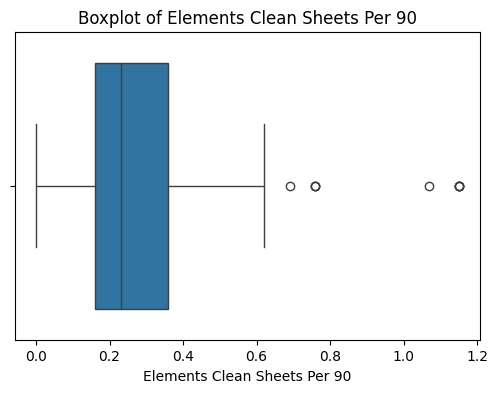

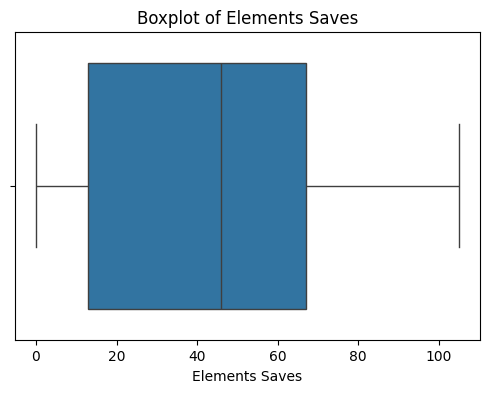

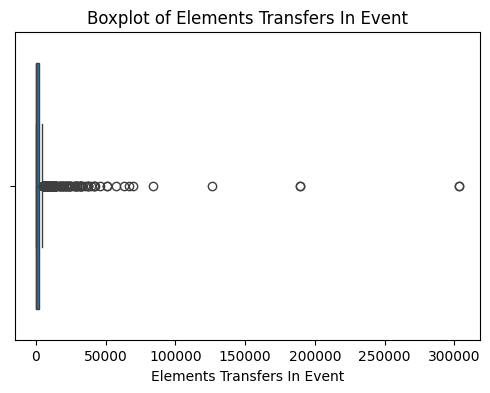

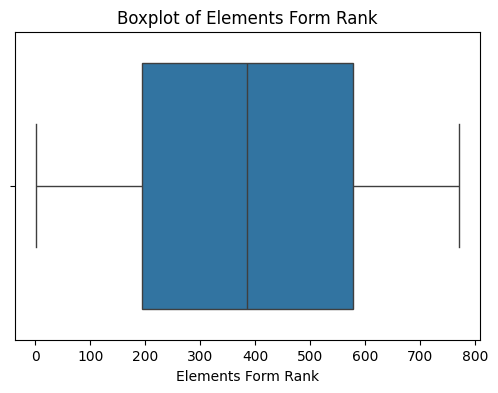

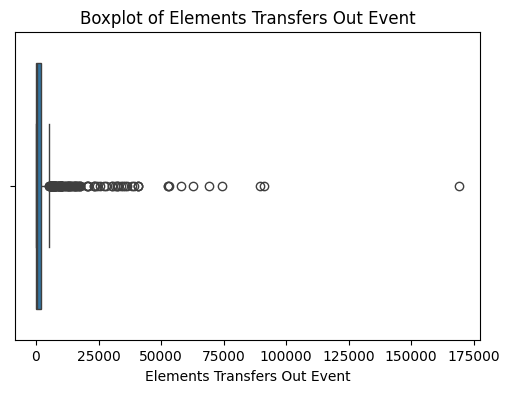

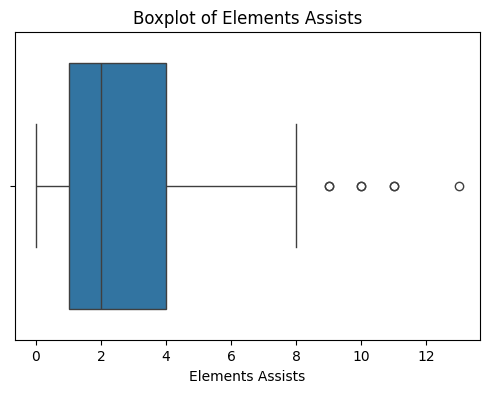

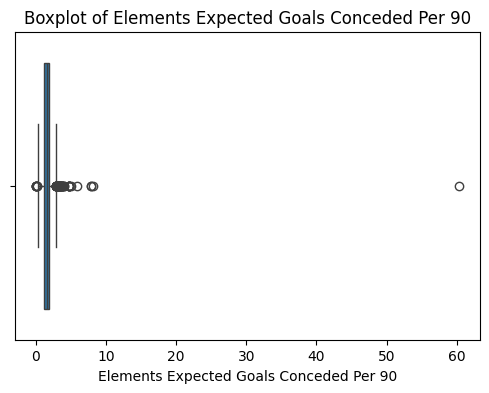

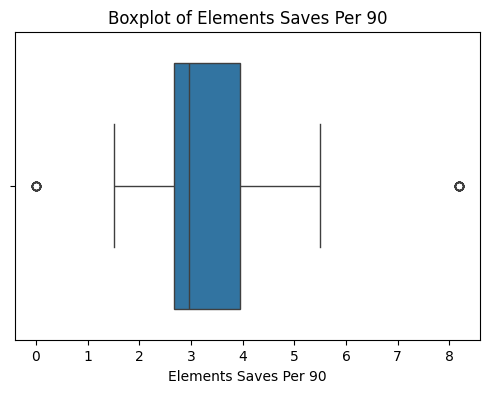

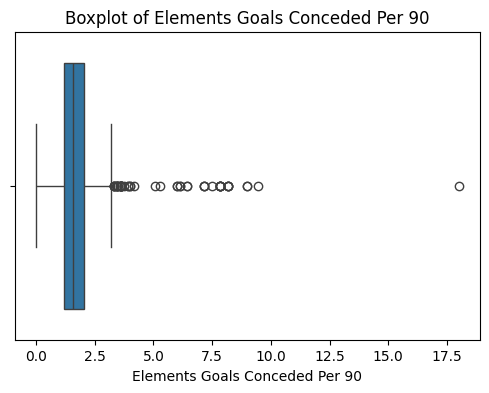

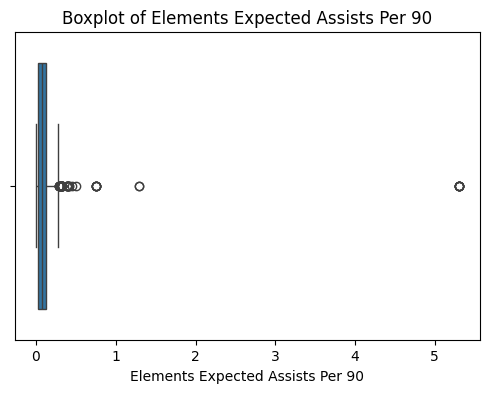

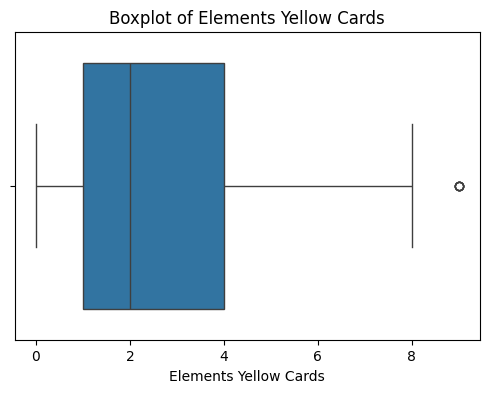

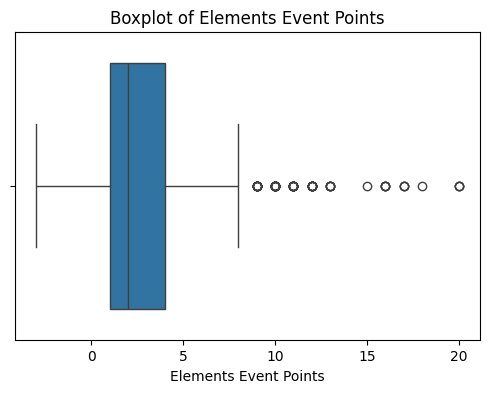

In [103]:
for col in fpl_df_final.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x = fpl_df_final[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

I have decided not to applying any outlier techniques but use models that have similar robustness like random forest regression.
I will reassess after the results of those models


notes:
Target variable Elements Event Point is Rightly skewed; thus the median is less than the mean, the upper quartile is larger than the lower quartile(based on the median) and median towards base othe data

In [112]:
fpl_df_final.columns

Index(['Elements Clean Sheets Per 90', 'Elements Saves',
       'Elements Transfers In Event', 'Elements Form Rank',
       'Elements Transfers Out Event', 'Elements Assists',
       'Elements Expected Goals Conceded Per 90', 'Elements Saves Per 90',
       'Elements Goals Conceded Per 90', 'Elements Expected Assists Per 90',
       'Elements Yellow Cards', 'Elements Event Points'],
      dtype='object')

In [123]:
#Outlier will be handled using capping; 95% percentile

for col in fpl_df_final.columns:
    lower_bound, upper_bound = fpl_df_final[col].quantile([0.05, 0.95])  
    fpl_df_final.loc[:, col] = np.clip(fpl_df_final.loc[:, col], lower_bound, upper_bound)




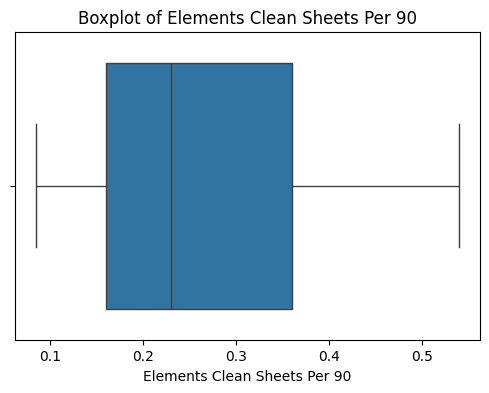

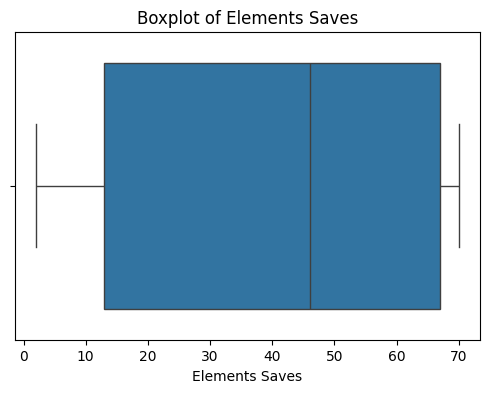

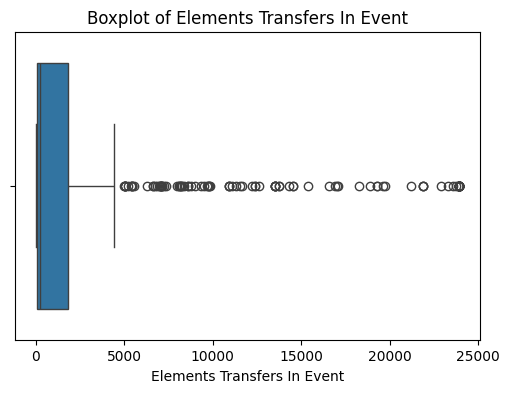

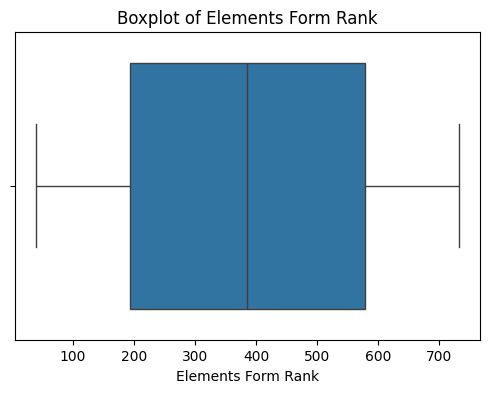

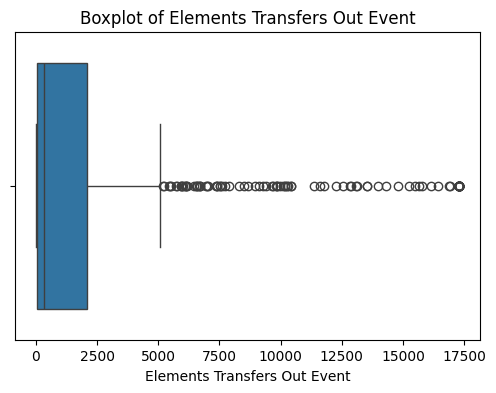

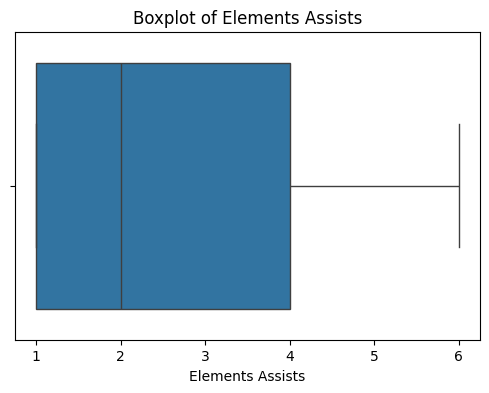

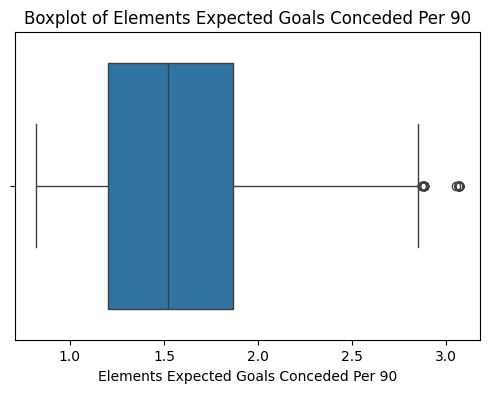

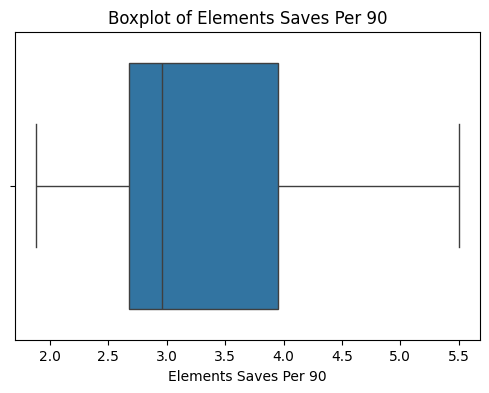

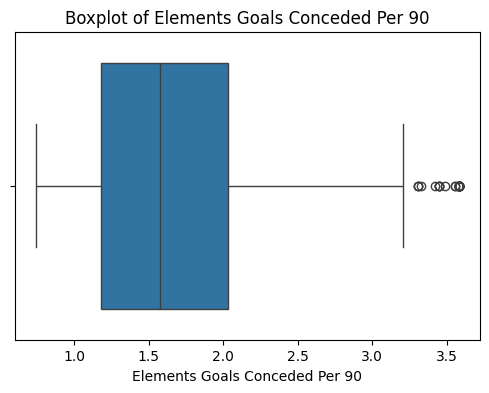

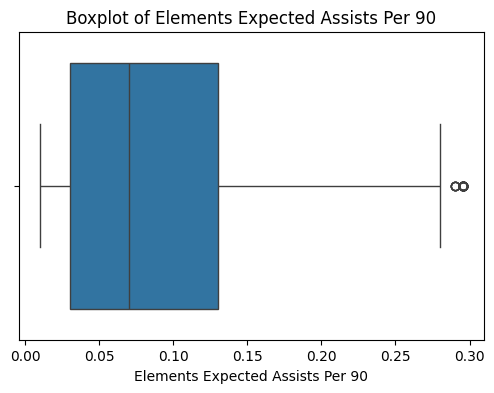

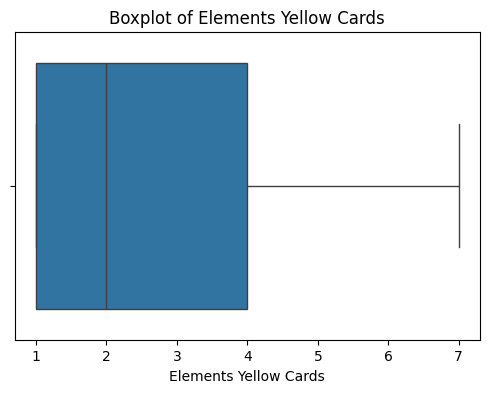

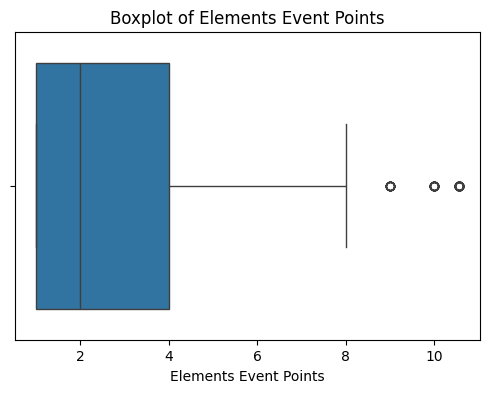

In [ ]:
#Visualize the impact on outliers
for col in fpl_df_final.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x = fpl_df_final[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [125]:
fpl_df_final.to_csv('fpl_final.csv', index= False)